# Introduction

## Epidermolysis Bullosa Introduction

Epidermolisis bulosa adalah kelompok penyakit langka yang menyebabkan kulit rapuh dan mudah melepuh. Munculnya lepuhan di kulit dapat dipicu oleh cedera ringan, paparan sinar matahari, gesekan dengan pakaian, atau garukan Epidermolisis bulosa dapat menyebabkan lepuhan yang terasa sakit di kulit bagian tangan, siku, lutut, dan kaki. Namun, lepuhan tersebut juga dapat muncul di kulit bagian dalam tubuh, seperti mulut, kerongkongan, atau mata.[1]

[1] https://www.alodokter.com/epidermolisis-bulosa#:~:text=Epidermolisis%20bulosa%20adalah%20kelompok%20penyakit,kulit%20rapuh%20dan%20mudah%20melepuh.



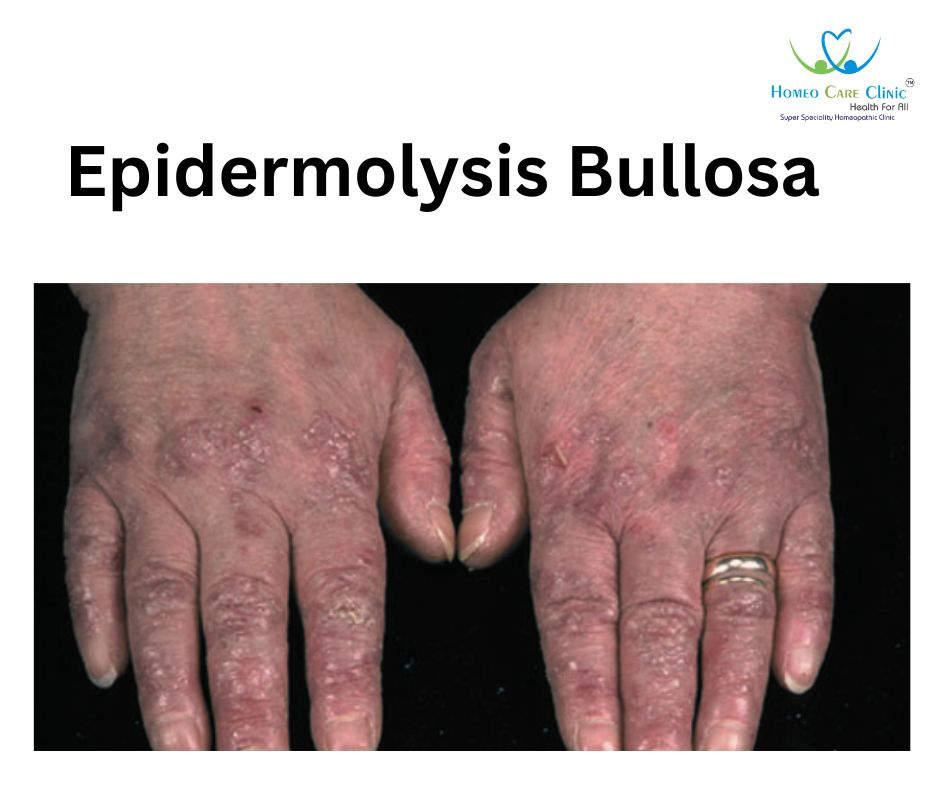

## EDA Introduction

Exploratory Data Analysis(EDA) adalah suatu proses uji investigasi awal yang bertujuan untuk mengidentifikasi pola, menemukan anomali, menguji hipotesis dan memeriksa asumsi. Dengan melakukan EDA, pengguna akan sangat terbantu dalam mendeteksi kesalahan dari awal, dapat mengidentifikasi outlier, mengetahui hubungan antar data serta dapat menggali faktor-faktor penting dari data. Proses EDA ini sangat bermanfaat dalam proses analisis statistik[1].

Ketika seseorang melakukan proses analisis data, salah satu proses yang sebaiknya tidak terlewatkan adalah exploratory data analysis (EDA). EDA merupakan salah satu proses penting dalam analisis data dikarenakan dengan melakukan EDA pengguna akan dapat lebih menghemat waktu dalam proses analisis data, dapat mengetahui beberapa kesalahan dalam data seperti adanya missing value, outliers, duplikasi, encodings, data noisy, data tidak lengkap, dll. Salah satu hal yang dikhawatirkan jika tidak melalui proses EDA adalah terjadinya error yang berulang-ulang dalam proses analisis, atau hasil analisis menjadi kurang valid dan kurang relevan dengan tujuan bisnis dikarenakan data yang digunakan masih benar-benar belum siap. Selain itu dengan melakukan EDA, pengguna akan terbantu dalam melihat data sebelum membuat asumsi apapun sehingga dapat mengidentifikasi kesalahan-kesalahan dalam data[1].

Setelah dilakukan EBA, baru proses analisis data pasien Epidermolisis Bullosa akan dilakukan dengan metode statistik yang sudah ditentukan Sebelumnya

Reference :

[1] https://dqlab.id/data-analisis-machine-learning-untuk-proses-pengolahan-data

## Objective



*   Melakukan EDA berbagai atribut dari data statistik
*   Analisis karakteristik penyakit EB dari data statistik
*   Analisis obat atau terapi penyakit EB dari data statistik
*   Melakukan Analisis Deskriptif dengan CHI-SQUARE



# Starting

In [1]:
# # @title Setup
# from google.colab import auth
# from google.cloud import bigquery
# from google.colab import data_table

# project = 'radiant-pilot-300414' # Project ID inserted based on the query results selected to explore
# location = 'US' # Location inserted based on the query results selected to explore
# client = bigquery.Client(project=project, location=location)
# data_table.enable_dataframe_formatter()
# auth.authenticate_user()

# # Running this code will display the query used to generate your previous job

# job = client.get_job('bquxjob_5d298813_18d548c34e4') # Job ID inserted based on the query results selected to explore
# # print(job.query)
# results = job.to_dataframe()
# df_drugbank = results

In [2]:
# len(df_drugbank)

In [3]:
# df_drugbank.head()

In [4]:
# df_drugbank["DrugName"] = df_drugbank["DrugName"].str.lower()

In [5]:
# [df_drugbank["DrugBankID"][i] for i in range(len(df)) if "DB00635" in df_drugbank["DrugBankID"][i]]

In [6]:
# import module
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# df_paper = pd.read_csv("https://docs.google.com/spreadsheets/d/1XFtZiRM1PoEIj6enN1XAZJBEWU8Be4dJa0pyFtJ5ZGU/gviz/tq?tqx=out:csv&sheet=List+Paper")
df_paper = pd.read_excel("Meta-analysis_EB.xlsx", sheet_name="List Paper")

In [8]:
df_tidak_bisa_diakses = df_paper[df_paper["Tujuan paper"].str.contains("0", na=False)]
df_tidak_sesuai_kriteria = df_paper[~df_paper["Tujuan paper"].str.contains("0", na=False) & df_paper["Tujuan paper"].str.contains(r"\[").astype(bool) | df_paper["Tujuan paper"].str.contains(r"\]").astype(bool)]
# df_diakses = df_paper[~df_paper["Tujuan paper"].str.contains("0", na=False).astype(bool) & ~df_paper["Tujuan paper"].str.contains(r"\[") & ~df_paper["Tujuan paper"].str.contains(r"\]")]

In [9]:
len(df_paper) - len(df_tidak_bisa_diakses)

894

In [10]:
print(len(df_tidak_bisa_diakses))
print(len(df_tidak_sesuai_kriteria))
print(len(df_paper)-(len(df_tidak_bisa_diakses)+len(df_tidak_sesuai_kriteria)))

85
466
428


In [11]:
(len(df_tidak_bisa_diakses)+len(df_tidak_sesuai_kriteria))

551

In [12]:
df_paper_aman = df_paper[~df_paper["Tujuan paper"].str.contains("0", na=False) & ~df_paper["Tujuan paper"].str.contains(r"\[").astype(bool) & ~df_paper["Tujuan paper"].str.contains(r"\]").astype(bool)]
df_paper_tidak_aman = df_paper[df_paper["Tujuan paper"].str.contains("0", na=False) | df_paper["Tujuan paper"].str.contains(r"\[").astype(bool) | df_paper["Tujuan paper"].str.contains(r"\]").astype(bool)]

In [13]:
print(len(df_paper))
print(len(df_paper_aman))
print(len(df_paper_tidak_aman))

979
430
549


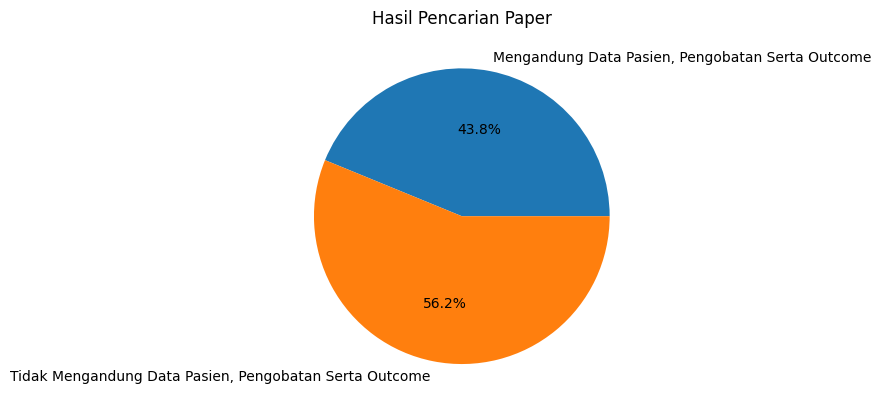

In [14]:
y = [len(df_paper)-(len(df_tidak_bisa_diakses)+len(df_tidak_sesuai_kriteria)), len(df_paper_tidak_aman)]
labels = ["Mengandung Data Pasien, Pengobatan Serta Outcome", "Tidak Mengandung Data Pasien, Pengobatan Serta Outcome"]

plt.title("Hasil Pencarian Paper")
plt.pie(y, labels = labels, autopct='%1.1f%%')
plt.show()

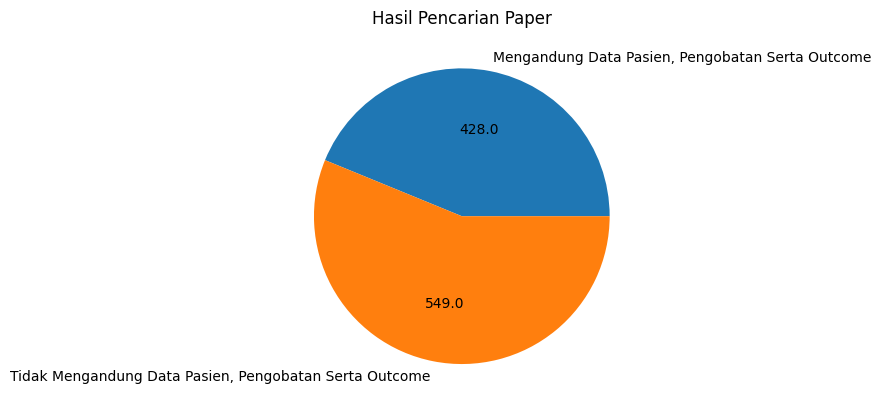

In [15]:
y = np.array([len(df_paper)-(len(df_tidak_bisa_diakses)+len(df_tidak_sesuai_kriteria)), len(df_paper_tidak_aman)])
labels = ["Mengandung Data Pasien, Pengobatan Serta Outcome", "Tidak Mengandung Data Pasien, Pengobatan Serta Outcome"]

def absolute_value(val):
    a  = np.round(val/100.*y.sum(), 0)
    return a

plt.title("Hasil Pencarian Paper")
plt.pie(y, labels = labels, autopct=absolute_value)
plt.show()

In [16]:
# load data
# df = pd.read_csv("https://docs.google.com/spreadsheets/d/1XFtZiRM1PoEIj6enN1XAZJBEWU8Be4dJa0pyFtJ5ZGU/gviz/tq?tqx=out:csv&sheet=Patient")
df = pd.read_excel("Meta-analysis_EB.xlsx", sheet_name="Patient")
df['marker'] = [str(df['marker'][i]) for i in range(len(df))]
df = df[df["marker"] != "1"][df["marker"] != "0"]
df = df.reset_index(drop=True)
df = df[(df['marker'] != '1') | (df['marker'] != '0')]
df = df.reset_index(drop=True)
df.shape[0]

C:\Users\herutriana44\AppData\Local\Temp\ipykernel_15436\4168181949.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df["marker"] != "1"][df["marker"] != "0"]


908

In [17]:
df[df["marker"] != "1"][df["marker"] != "0"]

,PMID,EB Type,EB Subtype,Gender (M/F),Age,Blister area,Severity,Ukuran luka,Keterlibatan Mucosa,Penyakit lain,...,Drug,Skin,Cell,Outcome,worsened/no respond/partial remission/complete remission,Notes,marker,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,35347281.0,DEB,RDEB,M,36 y,Anterior upper right thigh,Chronic,Wound 1: 3.81 cm^2\nWound 2: 2 cm^2\nWound 3: ...,NaN,NaN,...,NaN,NaN,NaN,Significant improvements in wound healing and ...,Partial remission,NaN,nan,NaN,NaN,NaN
1,35347281.0,DEB,RDEB,M,28 y,Posterior right forearm & Anterior left forearm,Chronic,Wound 1: 6.61 cm^2\nWound 2: 2.68 cm^2\n,NaN,NaN,...,NaN,NaN,NaN,NaN,Partial remission,NaN,nan,NaN,NaN,NaN
2,35347281.0,DEB,RDEB,M,21 y,"Lateral left forearm, Medial left upper arm, &...",Chronic,Wound 1: 10.1 cm^2 \nWound 2: 3.1 cm^2 \nWound...,NaN,NaN,...,NaN,NaN,NaN,NaN,Partial remission,NaN,nan,NaN,NaN,NaN
3,35347281.0,DEB,RDEB,M,18 y,"Posterior right elbow, Posterior left elbow, &...",Chronic,Wound 1: 12.5 cm^2\nWound 2: 5 cm^2\nWound 3: ...,NaN,NaN,...,NaN,NaN,NaN,NaN,Partial remission,NaN,nan,NaN,NaN,NaN
4,35347281.0,DEB,RDEB,F,13 y,"Anterior right knee, Medial lower right leg, &...",Chronic,Wound 1: 3.6 cm^2 \nWound 2: 15.6 cm^2 \nWound...,NaN,NaN,...,NaN,NaN,NaN,NaN,Partial remission,NaN,nan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,2751329.0,RDEB,NaN,F,9y,disfagia,NaN,NaN,NaN,NaN,...,corticosteroids,NaN,NaN,Pemeriksaan radiologi esofagus menunjukkan ada...,partial remission,NaN,nan,NaN,NaN,NaN
904,2751329.0,DEB,NaN,F,4y,disfagia,NaN,NaN,NaN,NaN,...,corticosteroids,NaN,NaN,Pasca operasi awalnya dia mengalami pemulihan ...,worsened,NaN,nan,NaN,NaN,NaN
905,2751329.0,DEB,NaN,M,5y,disfagia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Penyempitan yang ketat dan panjang pada esofag...,worsened,NaN,nan,NaN,NaN,NaN
906,2751329.0,DEB,NaN,F,14y,disfagia,NaN,NaN,NaN,pneumonia,...,NaN,NaN,NaN,Karena komplikasi ini dia dirawat di rumah sak...,partial remission,NaN,nan,NaN,NaN,NaN


In [18]:
# null remove
df = df.fillna("0")
df.shape[0]

908

In [19]:
# display all atribute of data
df.columns

Index(['PMID', 'EB Type', 'EB Subtype', 'Gender (M/F)', 'Age', 'Blister area',
       'Severity', 'Ukuran luka', 'Keterlibatan Mucosa', 'Penyakit lain',
       'Clinical characteristic lainnya', 'Therapy/Treatment Goals',
       'Therapy Location', 'Therapy Strategy (gene/drug/skin/...)',
       'Treatment', 'Gene', 'Target gene', 'Drug', 'Skin', 'Cell', 'Outcome',
       'worsened/no respond/partial remission/complete remission', 'Notes',
       'marker', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26'],
      dtype='object')

In [20]:
# change all text to lowercase
for i in df.columns:
    # df[i] = [str(df[i][j]).lower() for j in range(len(df))]
    df[i] = df[i].str.lower()

In [21]:
df['Notes'].unique()

array(['0',
       'setelah terapi fenitoin dilakukan, ia menunjukkan penurunan bertahap dalam jumlah lepuh dan erosi kulit segar. ketika terapi fenitoin dihentikan untuk sementara waktu, jumlah lepuh dan erosi baru meningkat secara signifikan. ketika terapi fenitoin dimulai kembali, jumlah lepuh kembali menurun. kondisi sebelum terapi dibandingkan dengan kondisinya pada minggu ke 29 setelah terapi kedua menunjukkan bahwa ia telah mengalami penyembuhan lesi kronis saat menerima terapi fenitoin.',
       'dia juga mengalami perbaikan substansial dalam kondisinya dengan terapi fenitoin, yaitu, eksaserbasi kulit melepuh ketika obat dihentikan dan penurunan berikutnya pada kulit melepuh ketika terapi fenitoin dimulai kembali. lesi erosif kronis yang diamati sebelum terapi menunjukkan penyembuhan hampir sempurna setelah sekitar 20 minggu setelah terapi fenitoin kedua.',
       'responsnya saat menerima terapi fenitoin serupa dengan yang terlihat pada pasien dua pasien sebelumnya. meskipun i

In [22]:
df.head()

,PMID,EB Type,EB Subtype,Gender (M/F),Age,Blister area,Severity,Ukuran luka,Keterlibatan Mucosa,Penyakit lain,...,Drug,Skin,Cell,Outcome,worsened/no respond/partial remission/complete remission,Notes,marker,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,NaN,deb,rdeb,m,36 y,anterior upper right thigh,chronic,wound 1: 3.81 cm^2\nwound 2: 2 cm^2\nwound 3: ...,0,0,...,0,0,0,significant improvements in wound healing and ...,partial remission,0,nan,0,0,0
1,NaN,deb,rdeb,m,28 y,posterior right forearm & anterior left forearm,chronic,wound 1: 6.61 cm^2\nwound 2: 2.68 cm^2\n,0,0,...,0,0,0,0,partial remission,0,nan,0,0,0
2,NaN,deb,rdeb,m,21 y,"lateral left forearm, medial left upper arm, &...",chronic,wound 1: 10.1 cm^2 \nwound 2: 3.1 cm^2 \nwound...,0,0,...,0,0,0,0,partial remission,0,nan,0,0,0
3,NaN,deb,rdeb,m,18 y,"posterior right elbow, posterior left elbow, &...",chronic,wound 1: 12.5 cm^2\nwound 2: 5 cm^2\nwound 3: ...,0,0,...,0,0,0,0,partial remission,0,nan,0,0,0
4,NaN,deb,rdeb,f,13 y,"anterior right knee, medial lower right leg, &...",chronic,wound 1: 3.6 cm^2 \nwound 2: 15.6 cm^2 \nwound...,0,0,...,0,0,0,0,partial remission,0,nan,0,0,0


### Additional Function

In [23]:
def join_list_of_strings(list_strings, delimiter=','):
  """
  Menggabungkan list string menjadi satu string dengan delimiter tertentu.

  Args:
    list_strings: List string yang akan digabungkan.
    delimiter: Delimiter yang akan digunakan untuk menggabungkan string.

  Returns:
    String yang digabungkan dari list string yang diberikan.
  """

  # Menggabungkan string dengan delimiter.
  combined_string = delimiter.join(list_strings)

  # Mengembalikan string yang digabungkan.
  return combined_string


# Contoh penggunaan.
list_strings = ['Ini', 'adalah', 'contoh', 'string.']

# Menggabungkan list string dengan delimiter ,.
combined_string = join_list_of_strings(list_strings)

# Menampilkan string yang digabungkan.
print(combined_string)

Ini,adalah,contoh,string.


In [24]:
def make_list_of_words(string):
  """
  Membuat list kata dari sebuah string.

  Args:
    string: String yang akan diubah menjadi list kata.

  Returns:
    List kata dari string yang diberikan.
  """

  # Memisahkan string menjadi kata-kata.
  words = string.split()

  # Mengembalikan list kata.
  return words

In [25]:
def write_list_to_txt(list_data, file_path):
  """
  Menulis list data ke file txt dengan newline atau garis baru diantara value lainnya.

  Args:
    list_data: List data yang akan ditulis ke file txt.
    file_path: Path file txt yang akan ditulis.

  Returns:
    None.
  """

  # Menulis data ke file txt.
  with open(file_path, 'w') as f:
    for data in list_data:
      f.write(data + '\n')

In [26]:
def flatten(lst):
    flattened_list = []
    for item in lst:
        if isinstance(item, list):
            # Jika item adalah list, panggil rekursif flatten
            flattened_list.extend(flatten(item))
        else:
            # Jika bukan list, tambahkan ke flattened_list
            flattened_list.append(item)
    return flattened_list

In [27]:
def outcome_preprocessing(txt):
  try:
    heal_keyword = ['heal', 'successful', 'sembuh', 'penyembuhan', 'sehat', 'berhasil', 'memuaskan', 'complete response', 'free lesion', 'stable', 'no new lesions'
                  'clean', 'membaik', 'complete control', 'disease control', 'tidak ada pembentukan blister', 'epitelisasi', 'bersih', 'complete remission'
                  'pulih', 'CR', 'resolve']
    remission_keyword = ['subside', 'remission', 'reduce', 'partial', 'lessening', 'berkurang', 'improvement', 'peningkatan', 'pengurangan', 'improve', 'PR']
    worsened = ['worsened', 'death']
    no_response = ['no respone']
    for i in heal_keyword:
      if i in txt:
        return 'heal'

    for i in remission_keyword:
      if i in txt:
        return 'remission'

    for i in worsened:
      if i in txt:
        return 'worsened'

    if 'no respone' in txt:
      return 'no respone'

    if txt == '0':
      txt = txt.replace('0', 'Unknown')
      return txt
    
  except:
    return "0"


In [28]:
def generalizing_function(list_input, val_begin, val_end):
  for i in range(len(list_input)):
    if(val_begin in list_input[i]):
      list_input[i] = val_end

  list_input = list(set(list_input))
  return list_input

In [29]:
def reverse_dict(d):
    reversed_dict = {v: k for k, v in d.items()}
    return reversed_dict

In [30]:
def eb_type_process(txt):
    txt_replace = [ '(Epidermolysis bullosa pruriginosa): clinical variant of dystrophic epidermolysis bullosa (DEB)',
                    '(',')',':', 'Epidermolysis \nbullosa dystrophic polydysplastica',
                   'Congenital epidermolysis bullosa', 'Epidermolysis bullosa pruriginosa',
                   ' ', '\n']
    for i in txt_replace:
        txt = txt.replace(str(i).lower(), '')

    return txt

In [31]:
import math

def hitung_luas_lingkaran(diameter):
    # Menghitung jari-jari
    jari_jari = diameter / 2.0

    # Menghitung luas lingkaran
    luas = (math.pi / 4) * diameter**2

    return luas

def mm_to_cm(mm):
    # 1 milimeter = 0.1 sentimeter
    cm = mm * 0.1
    return cm

def ukuran_luka_process(txt):
  replace_text = ['wound 1: ', 'wound 2: ', 'wound 3: ', '\n', '^', 'cluster of ~5 size, typically ',
                  '1) ', '2) ', 'cluster of ~5, size, typically ']
  for i in replace_text:
    txt = txt.replace(i, '')

  txt = txt.replace('²', '2')
  return txt

def diameter_to_wide(txt):
  if 'mm' in txt:
    txt = txt.replace(' in diameter', '')
    txt = txt.replace('mm','')
    txt = txt.replace(' ','')
    num = mm_to_cm(int(txt))
    luas = hitung_luas_lingkaran(num)
    return luas

  if 'cm' in txt:
    txt = txt.replace(' in diameter', '').replace('large as ', '')
    txt = txt.replace('cm','')
    txt = txt.replace(' ','')
    num = int(txt)
    luas = hitung_luas_lingkaran(num)
    return luas

def mm_to_wide(txt):
  txt = txt.replace('mm', '')
  txt = txt.replace(' ','')
  num = txt.split('x')
  luas = 1
  for i in num:
    luas *= mm_to_cm(int(i))

  return luas

In [32]:
def delete_duplicates(df, column):
  """
  Menghapus data duplikat pada dataframe suatu kolom.

  Args:
    df: Dataframe yang akan dihapus data duplikatnya.
    column: Kolom yang akan dihapus data duplikatnya.

  Returns:
    Dataframe yang telah dihapus data duplikatnya.
  """

  # Menghapus data duplikat berdasarkan kolom yang ditentukan.
  df = df.loc[df.groupby(column)['ID'].transform('size') == 1]

  return df

In [33]:
import re
import string
from collections import Counter
import numpy as np

class KoreksiOtomatis(object):

  def __init__(self, corpus_file_path):
    with open(corpus_file_path, "r") as file:
      lines = file.readlines()
      words = []
      for line in lines:
        words += re.findall(r'\w+', line.lower())

    self.vocabs = set(words)
    self.word_counts = Counter(words)
    total_words = float(sum(self.word_counts.values()))
    self.word_probas = {word: self.word_counts[word] / total_words for word in self.vocabs}

  def _level_one_edits(self, word):
    letters = string.ascii_lowercase
    splits = [(word[:i], word[i:]) for i in range(len(word) + 1)]
    deletes = [l + r[1:] for l,r in splits if r]
    swaps = [l + r[1] + r[0] + r[2:] for l, r in splits if len(r)>1]
    replaces = [l + c + r[1:] for l, r in splits if r for c in letters]
    inserts = [l + c + r for l, r in splits for c in letters]

    return set(deletes + swaps + replaces + inserts)

  def _level_two_edits(self, word):
    return set(e2 for e1 in self._level_one_edits(word) for e2 in self._level_one_edits(e1))

  def check(self, word):
    candidates = self._level_one_edits(word) or self._level_two_edits(word) or [word]
    valid_candidates = [w for w in candidates if w in self.vocabs]
    return sorted([(c, self.word_probas[c]) for c in valid_candidates], key=lambda tup: tup[1], reverse=True)

## Additional Data

In [34]:
body_parts_english = [
    'Head', 'Eyes', 'Ears', 'Nose', 'Mouth', 'Face', 'Neck', 'Shoulders',
    'Arms', 'Elbows', 'Hands', 'Fingers', 'Chest', 'Back', 'Abdomen', 'Hips',
    'Legs', 'Thighs', 'Knees', 'Calves', 'Feet', 'Toes', 'Skin', 'Skeleton',
    'Muscles', 'Extremities'
]
body_parts_english = [str(i).lower() for i in body_parts_english]

In [35]:
body_parts_indonesian = [
    'Kepala', 'Mata', 'Telinga', 'Hidung', 'Mulut', 'Wajah', 'Leher', 'Bahu',
    'Lengan', 'Siku', 'Tangan', 'Jari', 'Dada', 'Punggung', 'Perut', 'Pinggul',
    'Kaki', 'Paha', 'Lutut', 'Betis', 'Kaki', 'Jari Kaki', 'Kulit', 'Tulang',
    'Otot', 'Ekstremitas'
]
body_parts_indonesian = [str(i).lower() for i in body_parts_indonesian]

In [36]:
# best_cound_data = 150
best_cound_data = 10

In [37]:
df_list_drug_fix = pd.read_csv("https://docs.google.com/spreadsheets/d/1XFtZiRM1PoEIj6enN1XAZJBEWU8Be4dJa0pyFtJ5ZGU/gviz/tq?tqx=out:csv&sheet=List%20Obat")
# change all text to lowercase
df_list_drug_fix["Nama Obat"] = df_list_drug_fix["Nama Obat"].str.strip()
for i in df_list_drug_fix.columns:
    df_list_drug_fix[i] = [str(df_list_drug_fix[i][j]).lower() for j in range(len(df_list_drug_fix))]

In [38]:
df_list_drug_fix.head()

,Nama Obat,Singkatan,Frekuensi,Note
0,insulin or other oral hypoglycemic medications,nan,nan,nan
1,liquid laundry bleach,nan,nan,nan
2,5-fluorouracil,nan,nan,nan
3,acetaminophen,nan,nan,nan
4,corticosteroid,nan,nan,administration of corticosteroid systemically


In [39]:
len(df_list_drug_fix)

117

In [40]:
df_list_drug_fix = df_list_drug_fix.loc[df_list_drug_fix.groupby('Nama Obat').transform('size') == 1]
df_list_drug_fix = df_list_drug_fix.reset_index(drop=True)

In [41]:
drug_txt_path = 'nama_obat.txt'
write_list_to_txt(df_list_drug_fix['Nama Obat'].tolist(), drug_txt_path)

In [42]:
checker = KoreksiOtomatis(drug_txt_path)

In [43]:
cek = checker.check("steriod dan")

In [44]:
# for drug in range(len(df_list_drug_fix)):
#   for main in range(len(df)):
#     df['Drug'][main] = correct_typo(df['Drug'][main], df_list_drug_fix['Nama Obat'][drug])

# Exploratory Data Analysis(EDA)

## Gender

In [45]:
df['Gender (M/F)'] = [str(df['Gender (M/F)'][i]).replace(' ', '') for i in range(len(df))]
df['Gender (M/F)'] = [str(df['Gender (M/F)'][i]).replace('1', '') for i in range(len(df))]
df['Gender (M/F)'] = [str(df['Gender (M/F)'][i]).replace('7', '') for i in range(len(df))]
df['Gender (M/F)'] = [str(df['Gender (M/F)'][i]).replace('2', '') for i in range(len(df))]
df['Gender (M/F)'] = [str(df['Gender (M/F)'][i]).replace('6', '') for i in range(len(df))]
df['Gender (M/F)'] = [str(df['Gender (M/F)'][i]).replace('-', '0') for i in range(len(df))]
df['Gender (M/F)'] = [str(df['Gender (M/F)'][i]).replace('F,M', '0') for i in range(len(df))]

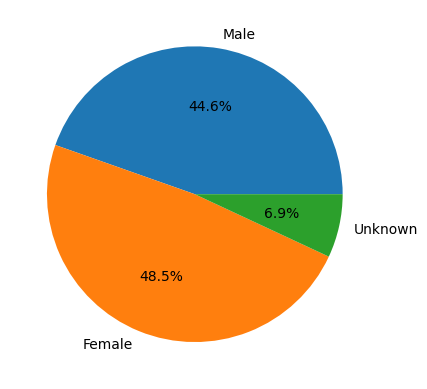

In [46]:
gender = df['Gender (M/F)'].value_counts()
y = [gender['m'], gender['f'], gender['0']]
labels = ['Male', 'Female', 'Unknown']

plt.pie(y, labels = labels, autopct='%1.1f%%')
plt.show()

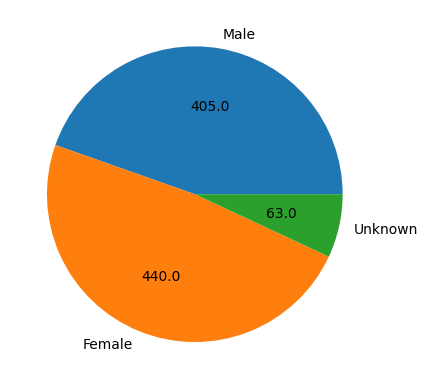

In [47]:
import numpy as np

gender = df['Gender (M/F)'].value_counts()
y = np.array([gender['m'], gender['f'], gender['0']])
labels = ['Male', 'Female', 'Unknown']
def absolute_value(val):
    a  = np.round(val/100.*y.sum(), 0)
    return a
plt.pie(y, labels = labels, autopct=absolute_value)
plt.show()

## EB Type

In [48]:
df['EB Type'] = df['EB Type'].str.strip()
df['EB Type'].unique()

array(['deb', 'eba', 'ebs', 'jeb', 'eb', 'ks', 'ebh', 'ebl', 'ebp', '0',
       'rieb', 'aeb', 'deb/ks', 'rdeb'], dtype=object)

In [49]:
df['EB Type'] = [eb_type_process(str(df['EB Type'][i])).upper() for i in range(len(df))]
df['EB Type'] = df['EB Type'].apply(lambda x: 'EB' if str(x) == '0' else x)
df['EB Type'] = df['EB Type'].apply(lambda x: 'JEB' if 'JEB' in str(x) else x)
df['EB Type'] = df['EB Type'].apply(lambda x: 'EBS' if 'EBS' in str(x) else x)

In [50]:
df['EB Type'].unique()

array(['DEB', 'EBA', 'EBS', 'JEB', 'EB', 'KS', 'EBH', 'EBL', 'EBP',
       'RIEB', 'AEB', 'DEB/KS', 'RDEB'], dtype=object)

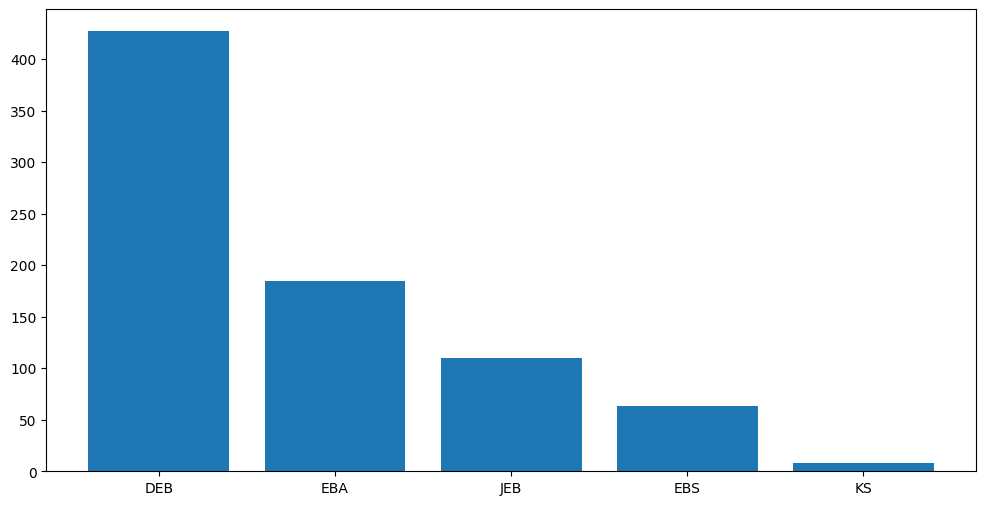

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumsikan 'df' adalah DataFrame yang sudah dimuat

# Filter DataFrame dan dapatkan nilai counts langsung
eb = df[df['EB Type'].isin(['DEB', 'EBA', "EBS", "JEB", "KS"])]['EB Type'].value_counts()

# Ekstrak label dan nilai counts
labels = eb.index.to_list()  # Dapatkan label dari index
y = eb.to_list()  # Dapatkan nilai counts

# Buat grafik batang
plt.figure(figsize=(12, 6))
plt.bar(labels, y)
plt.show()


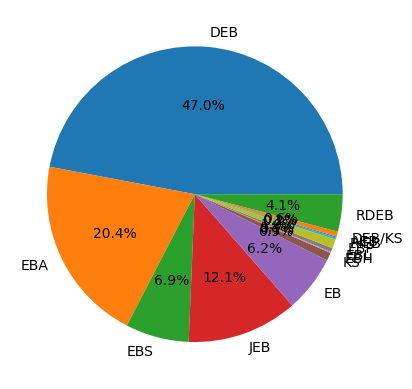

In [52]:
eb = df['EB Type'].value_counts()
val = df['EB Type'].unique()
y = []
labels = []

for i in val:
    y.append(eb[i])
    labels.append(i)

plt.pie(y, labels = labels, autopct='%1.1f%%')
plt.show()

In [53]:
df['EB Type 2'] = df['EB Type'].apply(lambda x: 'DEB' if 'DEB' in str(x) else x)

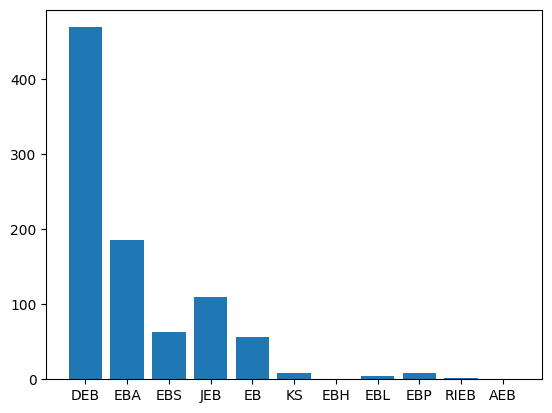

In [54]:
eb = df['EB Type 2'].value_counts()
val = df['EB Type 2'].unique()
y = []
labels = []

for i in val:
    y.append(eb[i])
    labels.append(i)

plt.bar(labels, y)
plt.show()

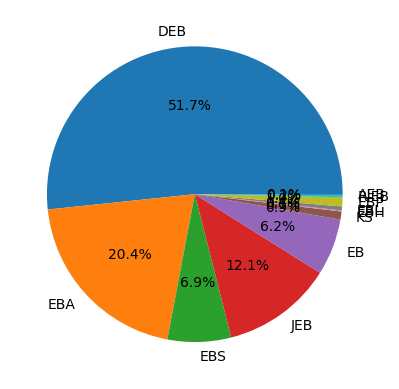

In [55]:
eb = df['EB Type 2'].value_counts()
val = df['EB Type 2'].unique()
y = []
labels = []

for i in val:
    y.append(eb[i])
    labels.append(i)

plt.pie(y, labels = labels, autopct='%1.1f%%')
plt.show()

### EBA Subtype

In [56]:
df['EB Subtype'] = [str(df['EB Subtype'][i]).replace('0', 'unknown') for i in range(len(df))]
df['EB Subtype'] = [str(df['EB Subtype'][i]).replace('mb', 'mechanobullous') for i in range(len(df))]
df['EB Subtype'] = [str(df['EB Subtype'][i]).replace('inflammatory', 'inflam').replace('inflam', 'inflammatory') for i in range(len(df))]

In [57]:
eba = df[df['EB Type'] == 'EBA']

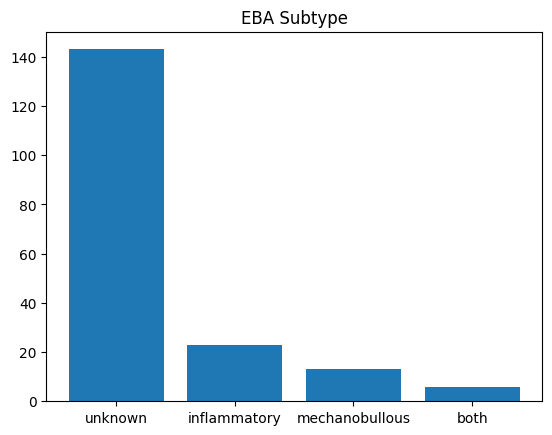

In [58]:
eb = eba['EB Subtype'].value_counts()
val = eba['EB Subtype'].unique()
y = []
labels = []

for i in val:
    y.append(eb[i])
    labels.append(i)

plt.title('EBA Subtype')
plt.bar(labels, y)
plt.show()

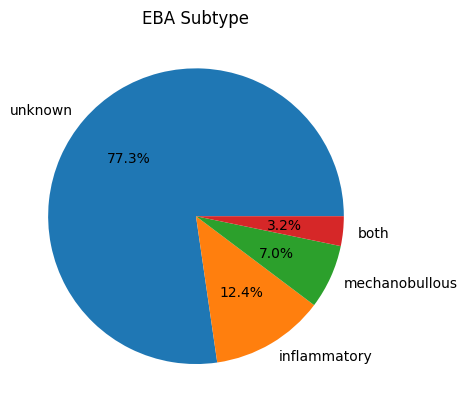

In [59]:
eb = eba['EB Subtype'].value_counts()
val = eba['EB Subtype'].unique()
y = []
labels = []

for i in val:
    y.append(eb[i])
    labels.append(i)

plt.title('EBA Subtype')
plt.pie(y, labels = labels, autopct='%1.1f%%')
plt.show()

### DEB Subtype

In [60]:
df[df['EB Type 2'] == 'DEB']['EB Subtype'].unique()

array(['rdeb', 'deb-pr', 'ddeb', 'unknown', 'severe rdeb',
       'rdeb vegetans', 'intermediate rdeb', 'dpeb', 'generalized',
       'inversa type', 'debpr', 'autosomal', 'severe progressive',
       'hallopeau siemens', 'ddeb ', 'debp'], dtype=object)

In [61]:
eba = df[df['EB Type 2'] == 'DEB']

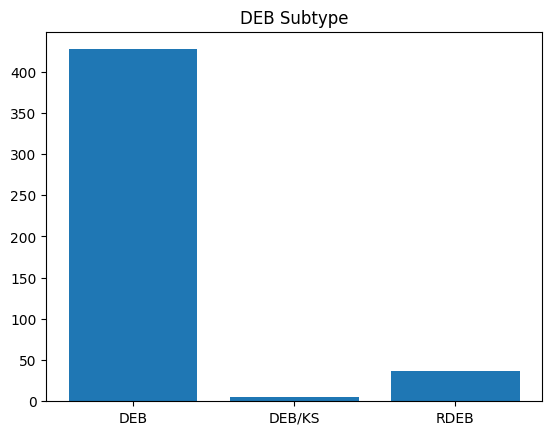

In [62]:
eb = eba['EB Type'].value_counts()
val = eba['EB Type'].unique()
y = []
labels = []

for i in val:
    y.append(eb[i])
    labels.append(i)

plt.title('DEB Subtype')
plt.bar(labels, y)
plt.show()

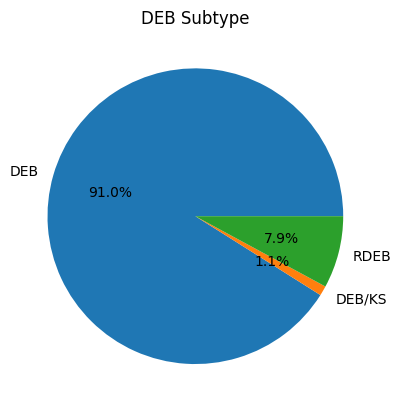

In [63]:
eb = eba['EB Type'].value_counts()
val = eba['EB Type'].unique()
y = []
labels = []

for i in val:
    y.append(eb[i])
    labels.append(i)

plt.title('DEB Subtype')
plt.pie(y, labels = labels, autopct='%1.1f%%')
plt.show()

C:\Users\herutriana44\AppData\Local\Temp\ipykernel_15436\2913343456.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90)


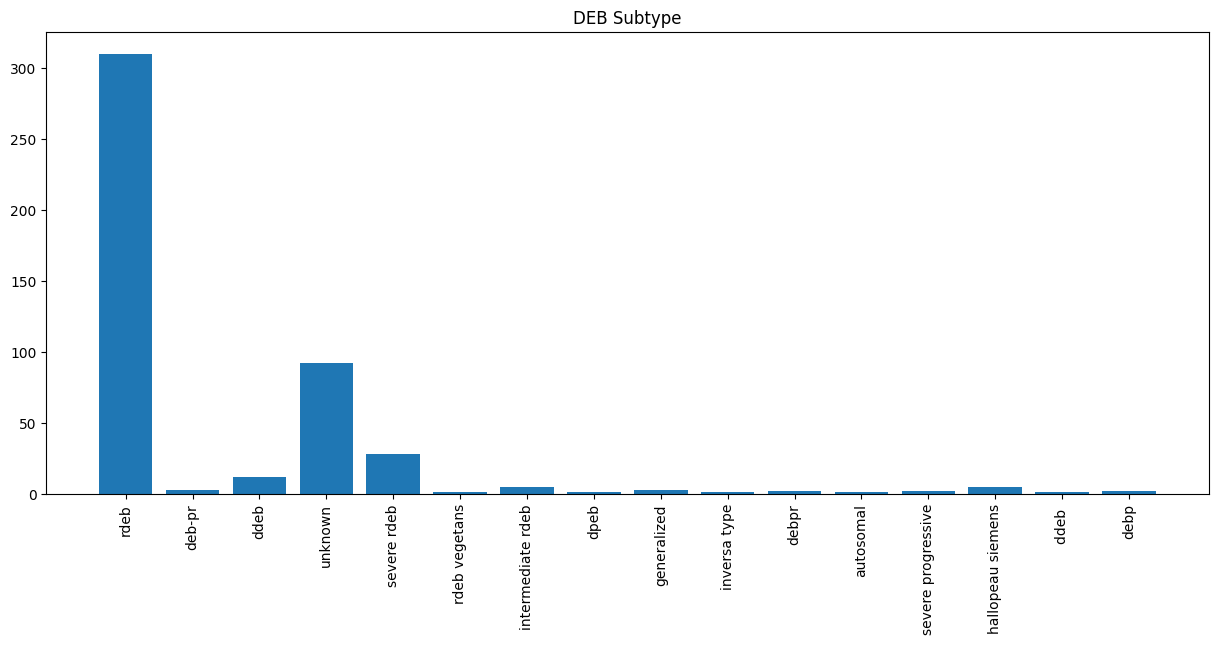

In [64]:
eba = df[df['EB Type 2'] == 'DEB']
eb = eba['EB Subtype'].value_counts()
val = eba['EB Subtype'].unique()
y = []
labels = []
fig, ax = plt.subplots(figsize=(15, 6))

for i in val:
    y.append(eb[i])
    labels.append(i)

ax.set_xticklabels(labels, rotation=90)
plt.title('DEB Subtype')
plt.bar(labels, y)
plt.show()

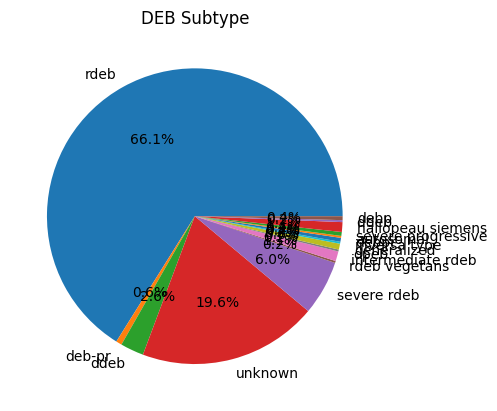

In [65]:
eb = eba['EB Subtype'].value_counts()
val = eba['EB Subtype'].unique()
y = []
labels = []

for i in val:
    y.append(eb[i])
    labels.append(i)

plt.title('DEB Subtype')
plt.pie(y, labels = labels, autopct='%1.1f%%')
plt.show()

### JEB Subtype

C:\Users\herutriana44\AppData\Local\Temp\ipykernel_15436\791472869.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90)


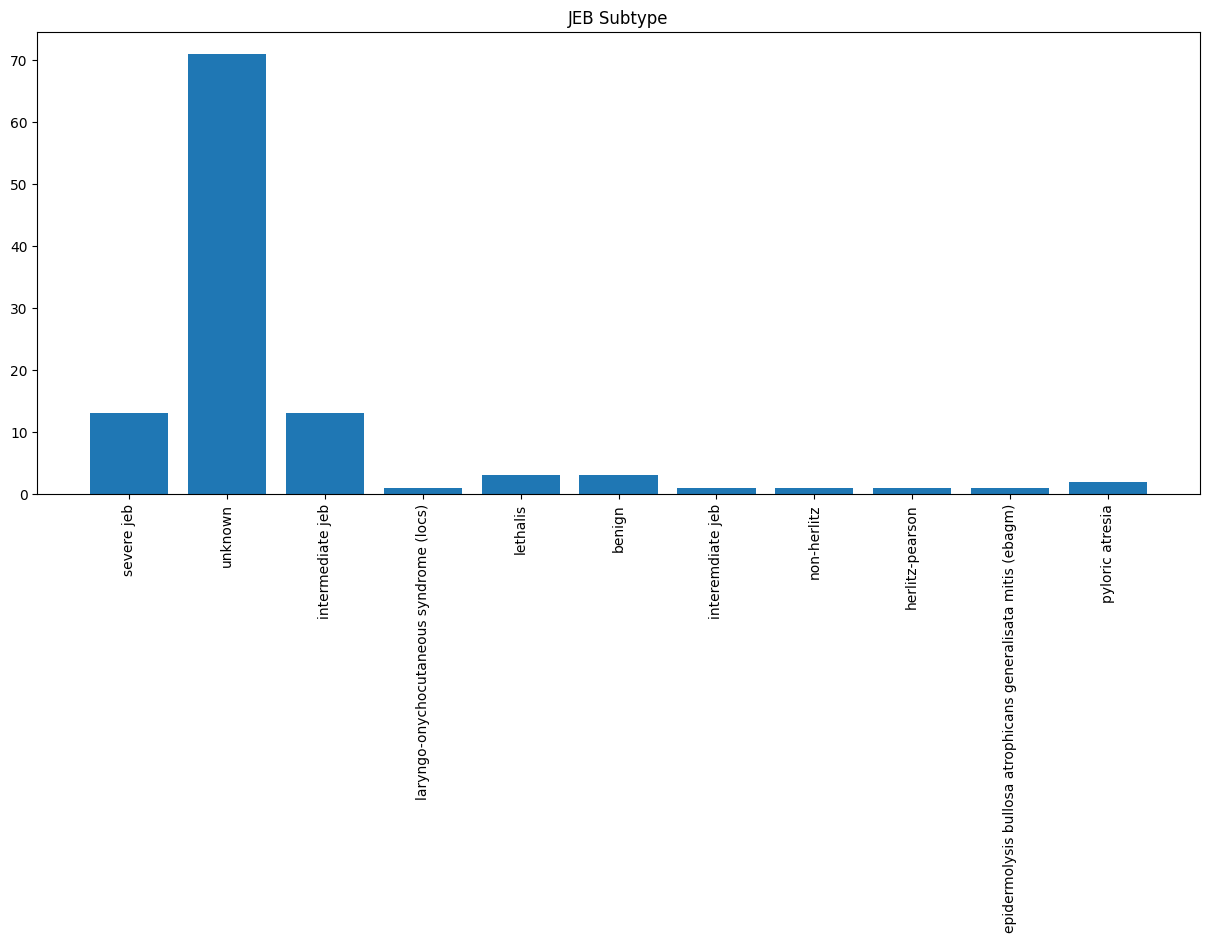

In [66]:
eb_type_main = "JEB"
eba = df[df['EB Type 2'] == eb_type_main]
eb = eba['EB Subtype'].value_counts()
val = eba['EB Subtype'].unique()
y = []
labels = []
fig, ax = plt.subplots(figsize=(15, 6))

for i in val:
    y.append(eb[i])
    labels.append(i)

ax.set_xticklabels(labels, rotation=90)
plt.title(f'{eb_type_main} Subtype')
plt.bar(labels, y)
plt.show()

### EBS Subtype

C:\Users\herutriana44\AppData\Local\Temp\ipykernel_15436\2343903882.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90)


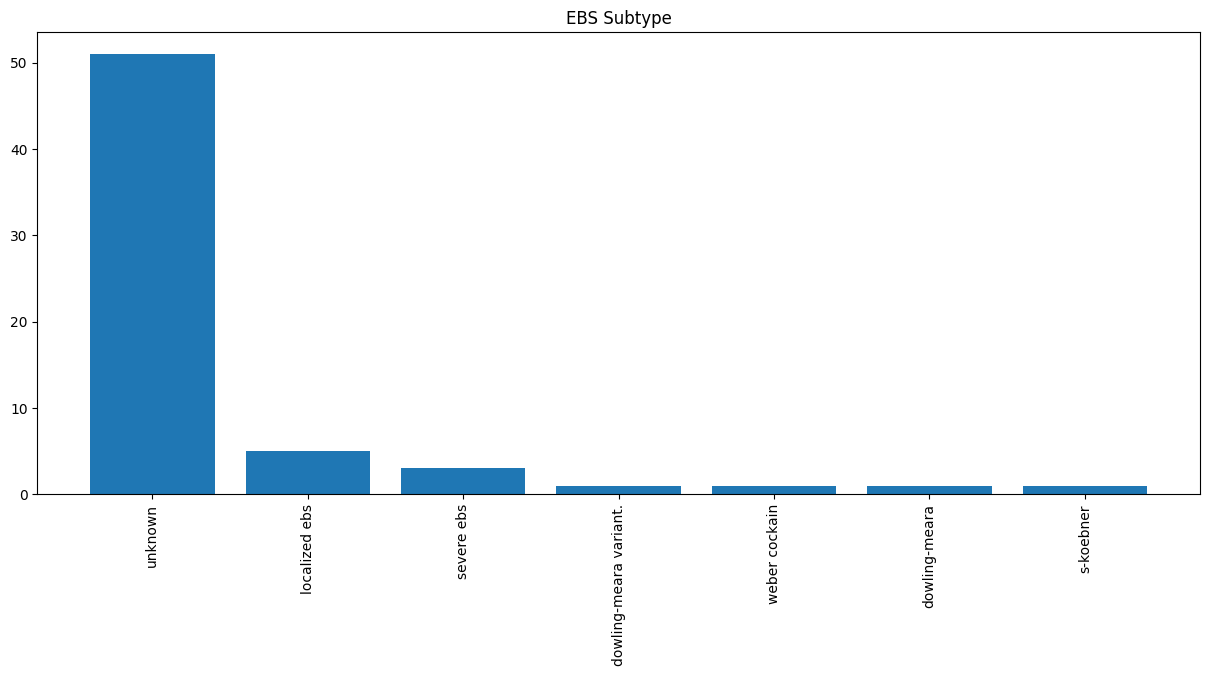

In [67]:
eb_type_main = "EBS"
eba = df[df['EB Type 2'] == eb_type_main]
eb = eba['EB Subtype'].value_counts()
val = eba['EB Subtype'].unique()
y = []
labels = []
fig, ax = plt.subplots(figsize=(15, 6))

for i in val:
    y.append(eb[i])
    labels.append(i)

ax.set_xticklabels(labels, rotation=90)
plt.title(f'{eb_type_main} Subtype')
plt.bar(labels, y)
plt.show()

### KS Subtype

C:\Users\herutriana44\AppData\Local\Temp\ipykernel_15436\1988704409.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90)


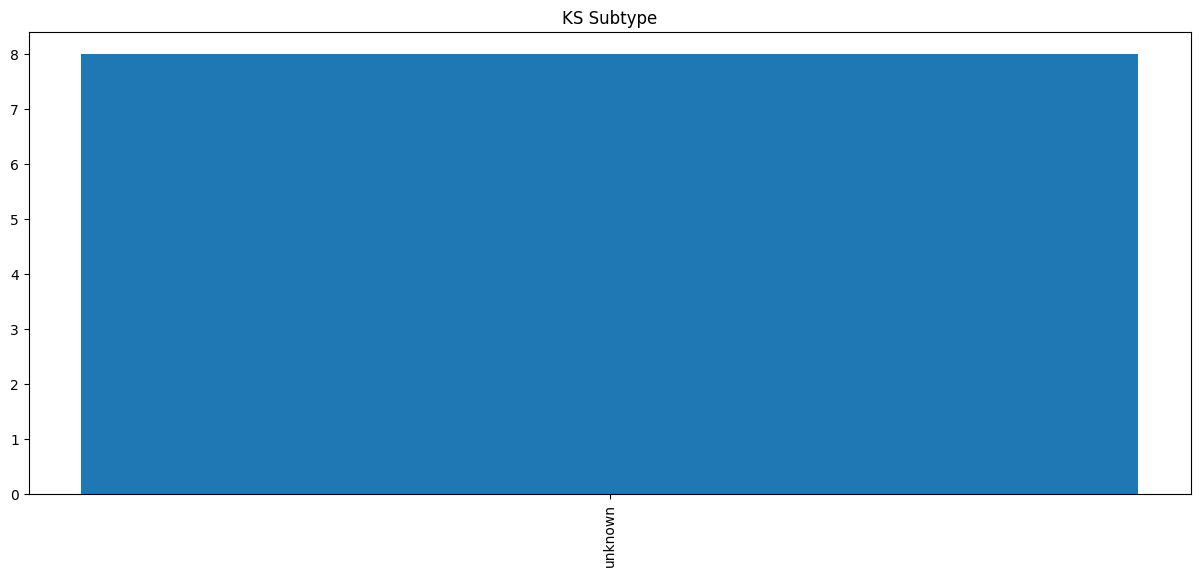

In [68]:
eb_type_main = "KS"
eba = df[df['EB Type 2'] == eb_type_main]
eb = eba['EB Subtype'].value_counts()
val = eba['EB Subtype'].unique()
y = []
labels = []
fig, ax = plt.subplots(figsize=(15, 6))

for i in val:
    y.append(eb[i])
    labels.append(i)

ax.set_xticklabels(labels, rotation=90)
plt.title(f'{eb_type_main} Subtype')
plt.bar(labels, y)
plt.show()

## Severity

In [69]:
def severity_processing(txt):
  txt = txt.replace('-', '0')

  berat = ['severe', 'chronic','chronis', 'intents', 'generalized severe', 'generalized chronic']
  sedang = ['intermediate', 'moderate', 'mild to moderate']
  ringan = ['mild', 'mild to severe']

  for i in ringan:
    txt = txt.replace(i, 'mild')

  for i in sedang:
    txt = txt.replace(i, 'moderate')

  for i in berat:
    txt = txt.replace(i, 'chronic')

  return txt

In [70]:
df['Severity'].unique()

array(['chronic', '0', 'severe', 'mild', 'intermediate',
       'mild to moderate', 'moderate', 'mild to severe', 'intents', '-',
       'chronis'], dtype=object)

In [71]:
df['Severity'] = [severity_processing(df['Severity'][i]) for i in range(len(df))]

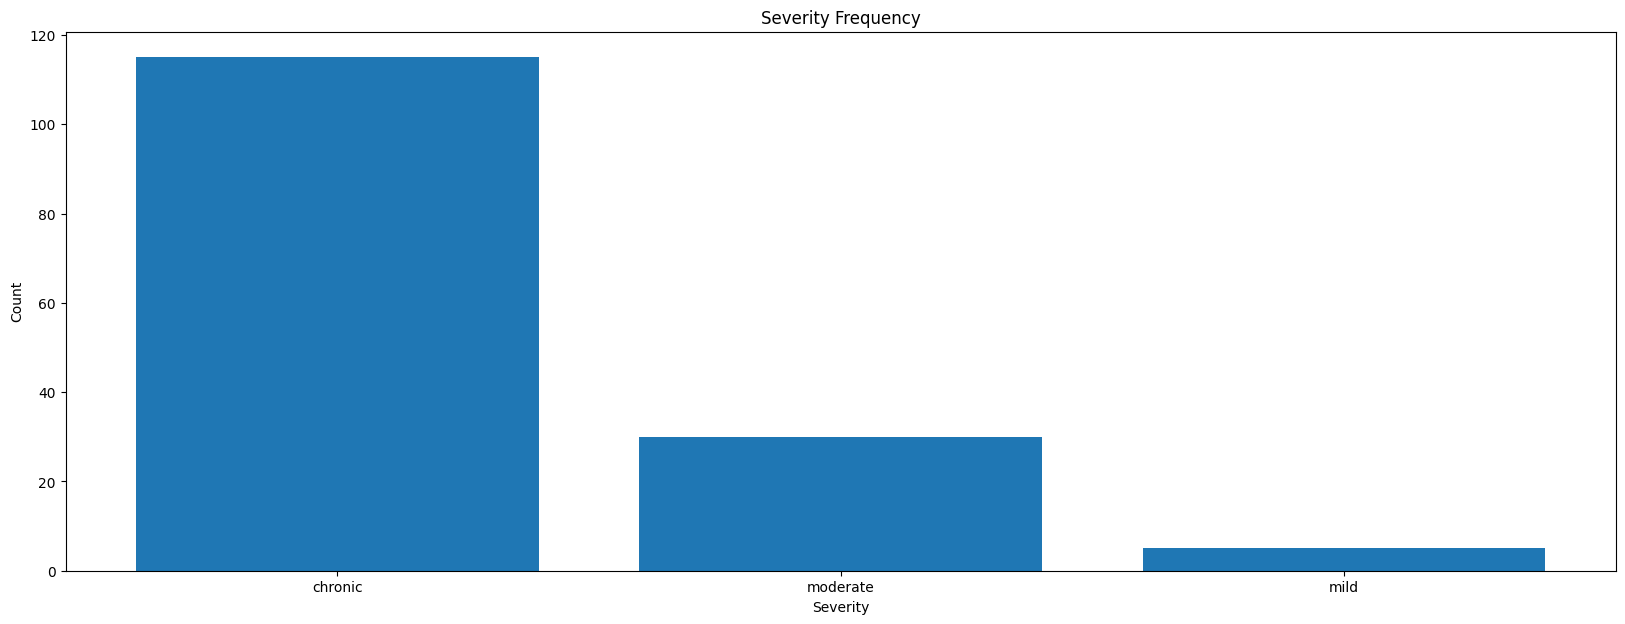

In [72]:
# Mendapatkan nilai counts untuk setiap kategori
outcome = df['Severity'].value_counts()

# Mengambil 5 kategori teratas
top_categories = outcome.nlargest(5)

# Mendapatkan nilai dan label dari 5 kategori teratas
labels = list(top_categories.index)[1:]
# labels[0] = 'Unknown'
y = list(top_categories.values)[1:]

# Plot
fig = plt.figure(figsize=(20, 7))
plt.xlabel('Severity')
plt.ylabel('Count')
plt.title('Severity Frequency')
plt.bar(labels, y)
plt.show()

In [73]:
top_categories

Severity
0           758
chronic     115
moderate     30
mild          5
Name: count, dtype: int64

## Blister Area

In [74]:
body_part = {body_parts_english[i] : body_parts_indonesian[i] for i in range(len(body_parts_english))}
rbody_part = {body_parts_indonesian[i]:body_parts_english[i] for i in range(len(body_parts_english))}

In [75]:
# Convert "Blister area" values to lowercase for matching
df['Blister area'] = df['Blister area'].str.lower()

body_part_counts = {part: 0 for part in body_parts_english + body_parts_indonesian}

# Iterate over each row and count the occurrences of body parts
for _, row in df.iterrows():
    for part in body_parts_english + body_parts_indonesian:
        if part in row['Blister area']:
            body_part_counts[part] += 1

# Print the counts
# for part, count in body_part_counts.items():
#     print(f'{part.capitalize()}: {count}')

In [76]:
body_part_counts_2 = {}
for x,y in rbody_part.items():
    body_part_counts_2[y] = body_part_counts[x] + body_part_counts[y]

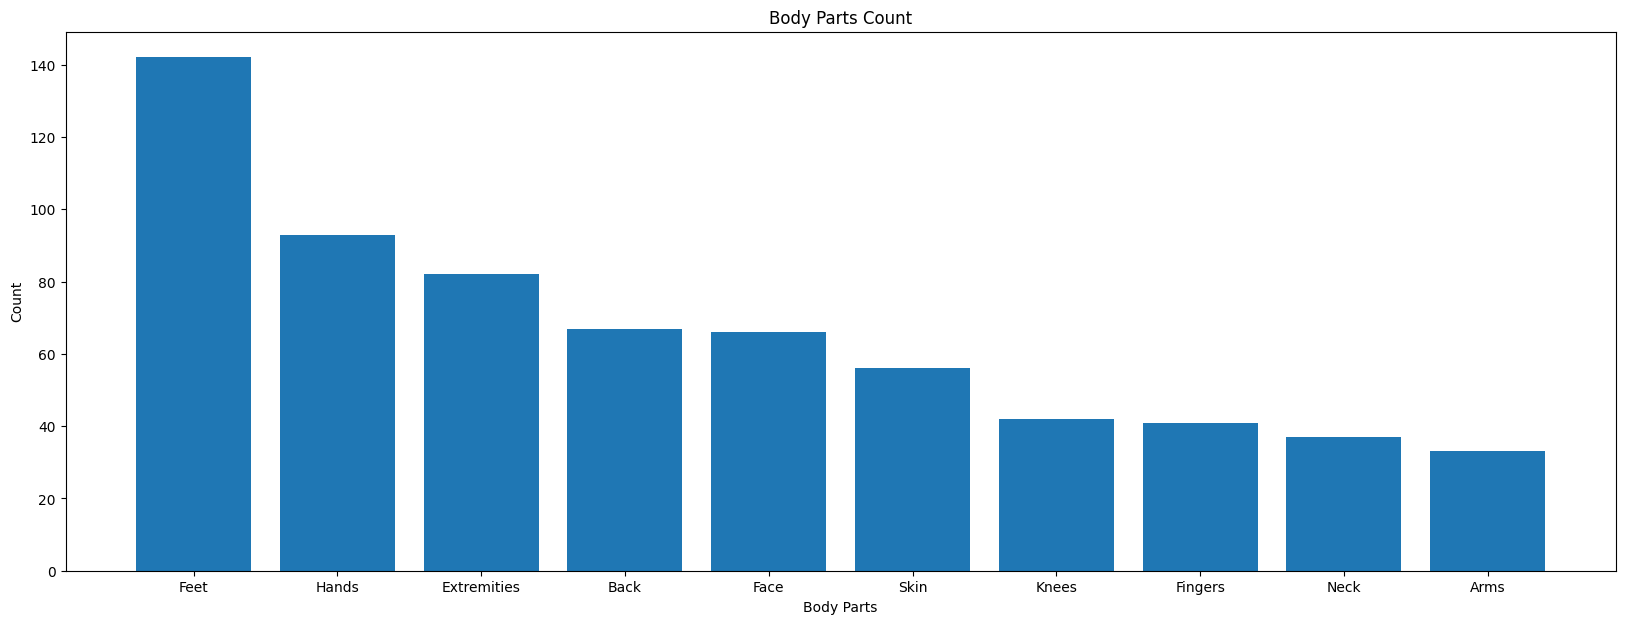

In [77]:
# Mengambil 5 kategori teratas
top_categories = sorted(body_part_counts_2.items(), key=lambda x: x[1], reverse=True)[:best_cound_data]

# Mendapatkan nilai dan label dari 5 kategori teratas
labels = [item[0].capitalize() for item in top_categories]
y = [item[1] for item in top_categories]

# Plot
fig = plt.figure(figsize=(20, 7))
plt.xlabel('Body Parts')
plt.ylabel('Count')
plt.title('Body Parts Count')
plt.bar(labels, y)
plt.show()

## Age

In [78]:
df['Age'].unique()

array(['36 y', '28 y', '21 y', '18 y', '13 y', '14 y', '15 y', '33 y',
       '22 y', '10 y', '61 y', '35 y', '54 y', '16 y', '25 y', '0',
       '48 y', '26 y', '20 y', '17 y', '49 y', '30 y', '39 y', '8 m',
       '65 y', '2 y', '0-28 d', '41 y', '53 y', '44 y', '3 y', '7 y',
       '4 y', '8 y', '9 y', '3 m', '6 y', '2 m', '5 y', '5 m', '4 m',
       'newborn ', '56 y ', '45 y', '12 y', '57 y', '58 y', '46 y',
       '64 y', '31 y', '32 y', '50 y', '56 y', '51 y', '16 y ', '27 y',
       '9 w', '42 y', '38 y', 'neonate', '3-12 m', '52 y', '23 y', '37 y',
       '6 w', 'infant', '60 y', '34 y', '36 y ', '62 y', '43 y', '59 y',
       '69 y', '19 y', '71 y', '36 w', '78 y', '91 y', '51 d', '74 y',
       '63 y', '24 y', '39 y ', '11 y', '17 y ', '72 y', '10 m', '29 y',
       '67 y', '40 y', '2 w', '75 y', '0 y', '85 y', '68 y', '71y', '75y',
       '54y', '50y', '76y', '28y', '61y', '56y', '31y', '55y', '69y',
       '0.3 y', '2.5 y', '1.4 y', '1.7 y', '0.5 y', '5y', '37y', '73y',
  

In [79]:
def get_string_data(input_string):
  """
  Mengambil data string dari input string.

  Args:
    input_string: Input string.

  Returns:
    Data string.
  """

  # Cari posisi awal substring "(".
  start_position = input_string.find("(")

  # Jika substring "(" tidak ditemukan, return None.
  if start_position == -1:
    return None

  # Ambil substring dari posisi awal substring "(" hingga akhir string.
  substring = input_string[start_position+1:]
  # Cari posisi akhir substring ")".
  end_position = substring.find(")")

  # Jika substring ")" tidak ditemukan, return None.
  if end_position == -1:
    return None

  # Ambil substring dari awal hingga posisi akhir substring ")".
  data_string = substring[:end_position]

  return data_string


In [80]:
df['Age'] = [str(df['Age'][i]).replace('children', '10y') for i in range(len(df))]
df['Age'] = [str(df['Age'][i]).replace('neonate','00') for i in range(len(df))]
df['Age'] = [str(df['Age'][i]).replace('infant','00') for i in range(len(df))]
df['Age'] = [str(df['Age'][i]).replace('born at 36 weeks gestation','36w') for i in range(len(df))]
df['Age'] = [str(df['Age'][i]).replace('24 hours after brith','1d') for i in range(len(df))]
df['Age'] = [str(df['Age'][i]).replace('mean age: 35.2 y','0') for i in range(len(df))]
df['Age'] = [str(df['Age'][i]).replace('3-12 m','1y') for i in range(len(df))]
df['Age'] = [str(df['Age'][i]).replace('since born','00') for i in range(len(df))]
df['Age'] = [str(df['Age'][i]).replace(' ','') for i in range(len(df))]
df['Age'] = [str(df['Age'][i]).replace('y','') for i in range(len(df))]
df['Age'] = [str(df['Age'][i]).replace('0-28d','28d') for i in range(len(df))]
df['Age'] = [str(df['Age'][i]).replace('newborn','00') for i in range(len(df))]
df['Age'] = [str(df['Age'][i]).replace('-', '0') for i in range(len(df))]
df['Age'] = df['Age'].apply(lambda x: -1 if str(x) == 0 or str(x) == '0' else x)
df['Age Category2'] = ""

for i in range(len(df)):
    if('m' in str(df['Age'][i])):
        age_m = str(df['Age'][i]).replace('m','')
        age_mr = age_m.replace(' ','')
        age_m = get_string_data(str(age_mr))
        if(age_m == None):
          age_m = str(df['Age'][i]).replace('m','')
          age_m = age_m.replace(' ','')
          age_m = float(age_m) / 12
          df['Age'][i] = age_m
        else:
          age_m = float(age_m) / 12
          df['Age'][i] = age_m

    if('d' in str(df['Age'][i])):
        age_d = str(df['Age'][i]).replace('d','')
        age_d = age_d.replace(' ','')
        age_d = get_string_data(str(age_d))
        if(age_d == None):
          age_d = str(df['Age'][i]).replace('d','')
          age_d = age_d.replace(' ','')
          age_d = float(age_d) / 12
          df['Age'][i] = age_d
        else:
          age_d = float(age_d) / 12
          df['Age'][i] = age_d

    if('w' in str(df['Age'][i])):
        age_w = str(df['Age'][i]).replace('w','')
        age_w = age_w.replace(' ','')
        age_w = float(age_w) / 52
        df['Age'][i] = age_w

    if('h' in str(df['Age'][i])):
        age_h = str(df['Age'][i]).replace('h','')
        age_h = age_h.replace(' ','')
        age_h = float(age_h) / 8760
        df['Age'][i] = age_h

    if('mean' in str(df['Age'][i])):
        continue

df['Age'] = [str(df['Age'][i]).replace('00s','00') for i in range(len(df))]
df['Age'] = [float(df['Age'][i]) for i in range(len(df))]

In [81]:
max(df['Age'])

91.0

In [82]:
len(df[df['Age'] >= 0]['Age'].unique())

128

In [83]:
df[df['Age'] >= 0]['Age'].describe()

count    866.000000
mean      24.129948
std       20.814550
min        0.000000
25%        7.000000
50%       18.000000
75%       37.000000
max       91.000000
Name: Age, dtype: float64

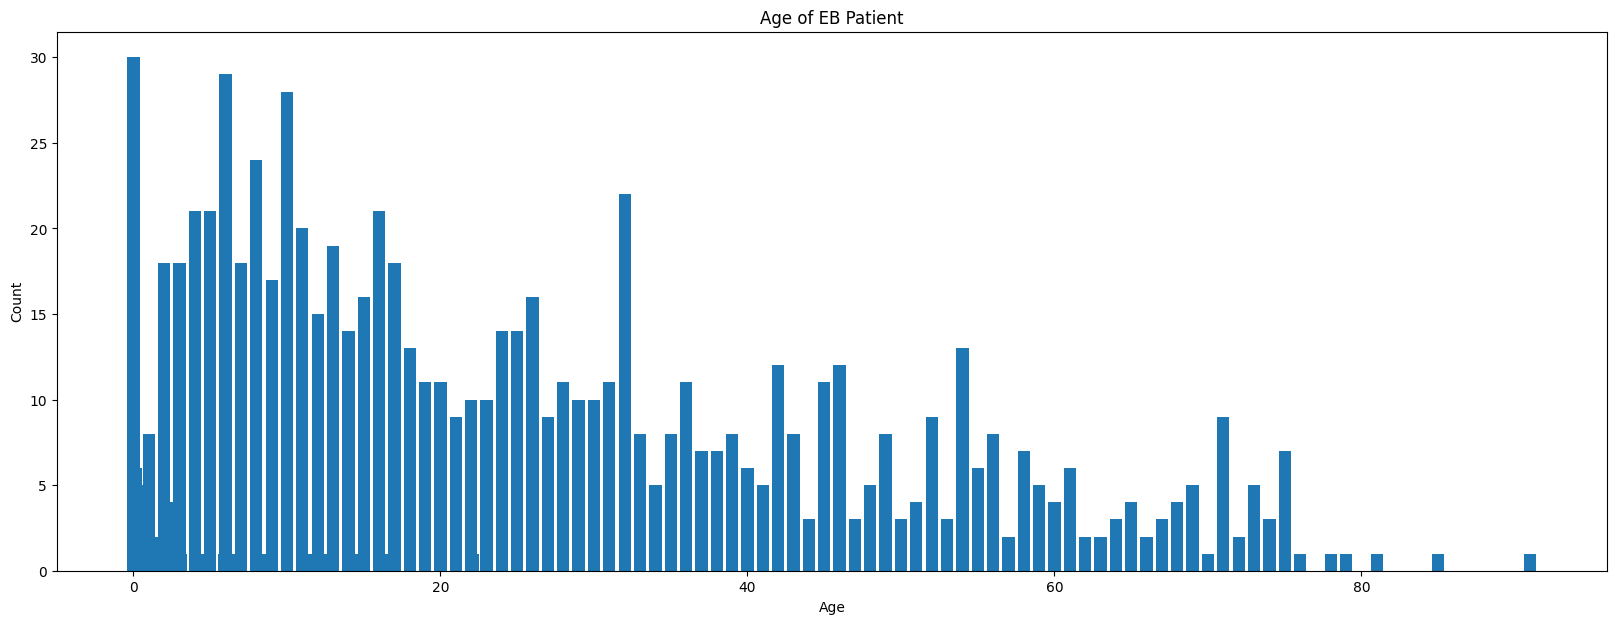

In [84]:
age = df[df['Age'] >= 0]['Age'].value_counts()
y = []
labels = df[df['Age'] >= 0]['Age'].unique()
for i in labels:
    y.append(age[i])

fig = plt.figure(figsize =(20, 7))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age of EB Patient')
plt.bar(labels, y)
plt.show()

In [85]:
1 / 12

0.08333333333333333

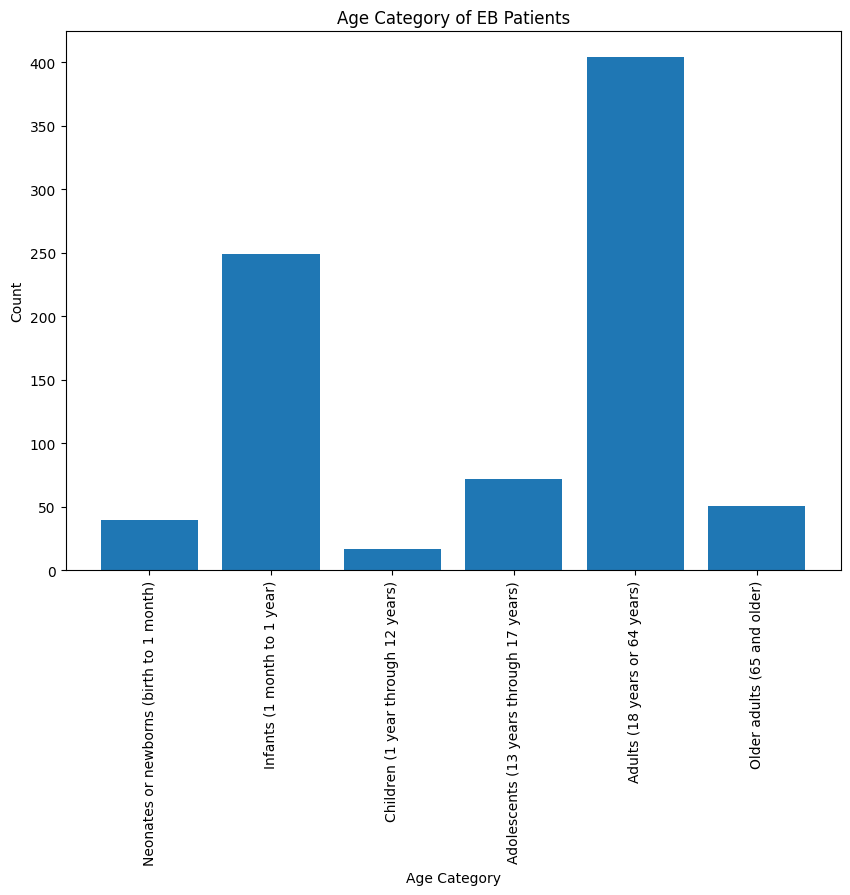

In [86]:
# Inisialisasi kategori usia
age_categories = {
    '0-1m': 'Neonates or newborns (birth to 1 month)',
    '1m-1y': 'Infants (1 month to 1 year)',
    '1y-12y': 'Children (1 year through 12 years)',
    '13y-17y': 'Adolescents (13 years through 17 years)',
    '18y+': 'Adults (18 years or 64 years)',
    '65y+': 'Older adults (65 and older)'
}

# age_categories = reverse_dict(age_categories)

# Mengelompokkan usia ke dalam kategori yang sesuai
df['Age Category'] = pd.cut(
    df['Age'],
    bins=[float('-inf'), 1/12, 1, 12, 13, 17, 65, float('inf')],
    labels=['unknown','0-1m', '1m-1y', '1y-12y', '13y-17y', '18y+', '65y+'],
    right=False
)

# Mendapatkan jumlah kategori
age_label2 = ["0-1m", "1m-1y", "1y-12y", "13y-17y", "18y+", "65y+"]
age_category_counts = df['Age Category'].value_counts()

# Menyiapkan data untuk plotting
# labels = [age_categories[key] for key in age_category_counts.index]
labels = [age_categories[age_] for age_ in age_label2]
# y = age_category_counts.values
y = [age_category_counts[age_] for age_ in age_label2]

# Plot
fig = plt.figure(figsize=(10, 7))
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Age Category of EB Patients')
plt.bar(labels, y)
plt.xticks(rotation=90)
plt.show()


## Therapy Strategy

In [87]:
df['Therapy Strategy (gene/drug/skin/...)']

0                gene
1                gene
2                gene
3                gene
4                gene
            ...      
903    dilation, drug
904    dilation, drug
905          dilation
906          dilation
907              drug
Name: Therapy Strategy (gene/drug/skin/...), Length: 908, dtype: object

In [88]:
ass = "asssa"
ass[1:]

'sssa'

In [89]:
def sort_dict_by_values(dicti):
  """
  Mengurutkan dictionary berdasarkan values-nya dari terbesar ke terkecil

  Args:
    dict: Dictionary yang akan diurutkan

  Returns:
    Dictionary yang sudah diurutkan
  """

  # Urutkan dictionary berdasarkan values
  sorted_dict = sorted(dicti.items(), key=lambda x: x[1], reverse=True)

  # Kembalikan dictionary yang sudah diurutkan
  return dict(sorted_dict)

In [90]:
df['Therapy Strategy (gene/drug/skin/...)'] = df['Therapy Strategy (gene/drug/skin/...)'].str.replace("-","0").replace("unknown", "0").replace("blood transplant/therapy", "cell").replace("operation", "surgical").replace(" therapy", "").replace("/therapy","").replace("medical surgery", "surgical").replace("operation","surgical").replace("wound ","").replace(" treatment", "").replace(" and ", ",").replace("unknown", "0").replace(" (infus)","")
all_therapy_strategy = list(df['Therapy Strategy (gene/drug/skin/...)'].unique())
all_therapy_strategy = [therapy.replace("-","0").replace("unknown", "0").replace("blood transplant/therapy", "cell").replace("operation", "surgical").replace(" therapy", "").replace("/therapy","").replace("medical surgery", "surgical").replace("operation","surgical").replace("wound ","").replace(" treatment", "").replace(" and ", ",").replace("unknown", "0").replace(" (infus)","") for therapy in all_therapy_strategy]
all_therapy_strategy = [therapy.replace("0 ", "0").split(",") for therapy in all_therapy_strategy]
all_therapy_strategy = flatten(all_therapy_strategy)
all_therapy_strategy = [therapy[1:] if therapy[0] == " " else therapy  for therapy in all_therapy_strategy]
all_therapy_strategy = [therapy[:-1] if therapy[-1] == " " else therapy  for therapy in all_therapy_strategy]
all_therapy_strategy = list(set(all_therapy_strategy))
therapy_count = {}
for therapy in all_therapy_strategy:
  therapy_count[therapy] = len([df['Therapy Strategy (gene/drug/skin/...)'][i] for i in range(len(df)) if therapy in df['Therapy Strategy (gene/drug/skin/...)'][i]])

therapy_count = sort_dict_by_values(therapy_count)

In [91]:
list(therapy_count.keys())[:5]

['drug', '0', 'skin', 'cell', 'surgical']

In [92]:
df['Therapy Strategy (gene/drug/skin/...)'].value_counts()

Therapy Strategy (gene/drug/skin/...)
drug                            482
0                               120
skin                             87
cell                             76
gene                             21
surgical                         19
unknown                          16
treatment                        13
drug, skin                        7
treatment, drug                   7
drug, cell                        5
dilation                          4
dilation, drug                    4
both                              3
skin, drug                        3
dental                            3
drug                              2
radiation therapy                 2
surgical, drug                    2
sis                               2
drug, surgical                    2
drug, operation, skin             2
drug, operation                   2
skin, cell                        2
hormon                            1
drug (infus)                      1
plasmapheresis, drug      

In [93]:
list(therapy_count.values())[1]

120

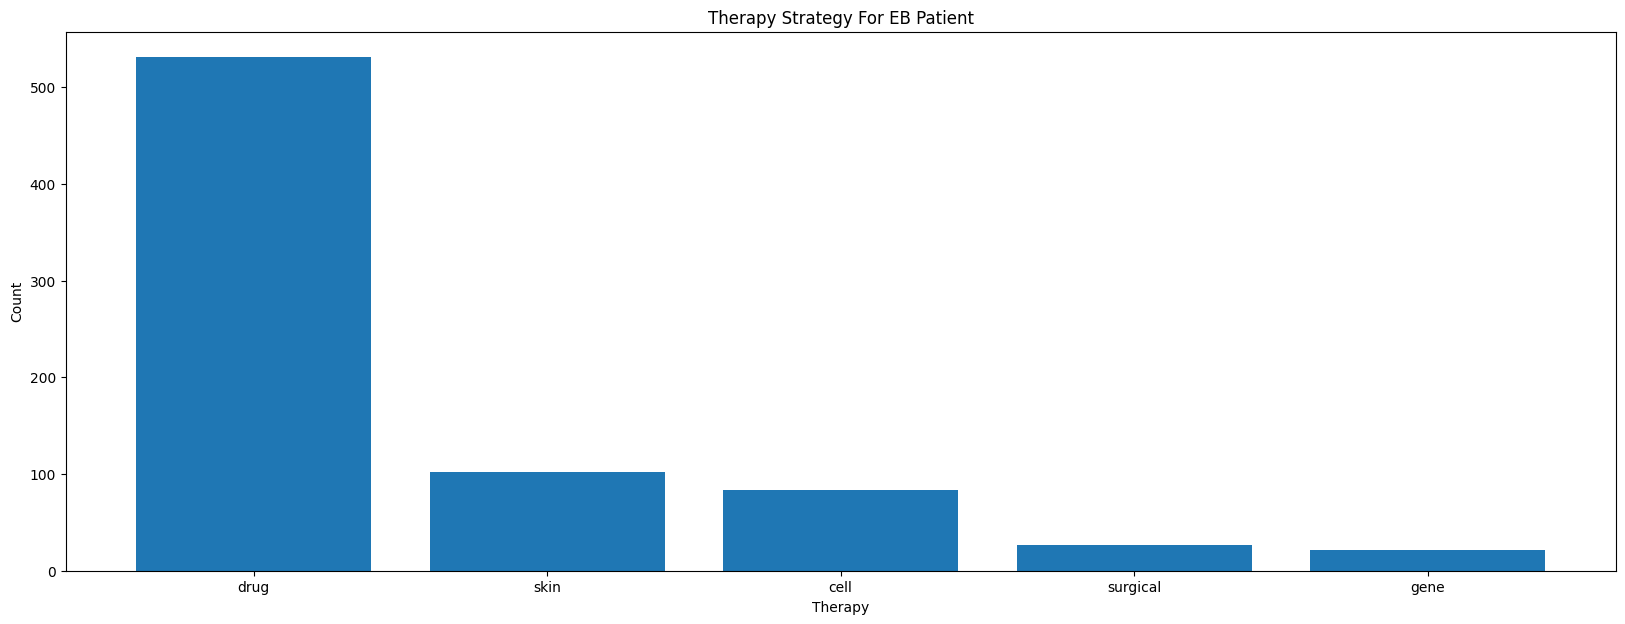

In [94]:
therapy = df['Therapy Strategy (gene/drug/skin/...)'].value_counts()
# Mengambil 5 kategori teratas
top_categories = therapy.nlargest(best_cound_data)
# Mendapatkan nilai dan label dari 5 kategori teratas
labels = list(therapy_count.keys())[:6]
labels.pop(1)
y = list(therapy_count.values())[:6]
y.pop(1)

fig = plt.figure(figsize =(20, 7))
plt.xlabel('Therapy')
plt.ylabel('Count')
plt.title('Therapy Strategy For EB Patient')
plt.bar(labels, y)
plt.show()

### Drug Analysis

In [95]:
df['Outcome'] = [outcome_preprocessing(str(df['Outcome'][i])) for i in range(len(df))]

#### Outcome

In [96]:
singkatan_obat = df_list_drug_fix[df_list_drug_fix['Singkatan'] != 'nan']
singkatan_obat = singkatan_obat.reset_index(drop=True)

In [97]:
singkatan_obat

,Nama Obat,Singkatan,Frekuensi,Note
0,azathioprine,aza,nan,nan
1,care-sensitive adverse events,cbd,nan,nan
2,cefmetazole,csae,nan,nan
3,congenital pyloric atresia,cpa,nan,nan
4,cyclosporine,csa,nan,nan
5,diaphenylsulfone,dds,nan,nan
6,doxycycline,dox,nan,nan
7,extracorporeal photochemotherapy,ecp,nan,nan
8,immunoadsorption,ia,nan,nan
9,intravenous immunoglobulin,ivig,nan,nan


In [98]:
for singkatan in range(len(singkatan_obat)):
  df['Drug'] = [str(df['Drug'][i]).replace(singkatan_obat['Singkatan'][singkatan], singkatan_obat['Nama Obat'][singkatan]) for i in range(len(df))]

In [99]:
# df['Drug'] = [str(df['Drug'][i]).replace('intravenous immunoglobulin', 'ivig') for i in range(len(df))]
# df['Drug'] = [str(df['Drug'][i]).replace('azathioprine', 'aza') for i in range(len(df))]
# df['Drug'] = [str(df['Drug'][i]).replace('mycophenolate mofetil', 'mmf') for i in range(len(df))]
# df['Drug'] = [str(df['Drug'][i]).replace('cyclosporine ', 'csa') for i in range(len(df))]
# df['Drug'] = [str(df['Drug'][i]).replace('extracorporeal photochemotherapy', 'ecp') for i in range(len(df))]
# # df['Drug'] = [str(df['Drug'][i]).replace('extracorporeal photopheresis', 'ecp') for i in range(len(df))]
# df['Drug'] = [str(df['Drug'][i]).replace('methotrexate', 'mtx') for i in range(len(df))]
# df['Drug'] = [str(df['Drug'][i]).replace('rituximab', 'rtx') for i in range(len(df))]
# # df['Drug'] = [str(df['Drug'][i]).replace('cyclosporine', 'csa') for i in range(len(df))]
# df['Drug'] = [str(df['Drug'][i]).replace('cyclosporineph', 'csa') for i in range(len(df))]
# df['Drug'] = [str(df['Drug'][i]).replace('steroids', 'steroid') for i in range(len(df))]
df['Drug'] = [str(df['Drug'][i]).replace(' ia', '####').replace('ia;', '####').replace(';ia', '####').replace('ia,', '####').replace('ia ', '####').replace('####', 'immunoadsorption ') for i in range(len(df))]

In [100]:
delimiter = [',', '.', ';']
for deli in range(len(delimiter)):
  for i in range(len(df)):
    drug_res = []
    drug = str(df['Drug'][i]).split(delimiter[deli])
    for j in range(len(drug)):
      try:
        drug[j] = checker.check(str(drug[j]))[0][0]
      except:
        drug[j] = drug[j]

    df['Drug'][i] = join_list_of_strings(drug, delimiter[deli])

C:\Users\herutriana44\AppData\Local\Temp\ipykernel_15436\3709320969.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Drug'][i] = join_list_of_strings(drug, delimiter[deli])


In [101]:
from collections import Counter

# Membuat set unik dari obat-obatan
# all_drug = set()
# for drug_list in df['Drug']:
#     drugs = drug_list.replace(',', ';').replace(' and ', ';').split(';')
#     drugs = drug_list.replace('+', ';').split(';')
#     all_drug.update(drugs)
all_drug = df_list_drug_fix['Nama Obat'].tolist()

# all_drug = list(all_drug)
# all_drug = [string.strip() for string in all_drug]
# remove_list = ['\n', '', ' ']
# for i in remove_list:
#   try:
#     all_drug.remove(i)
#   except:
#     continue

# res_all_drug = []
# generalizing_list = ['lymphoma', 'dapsone', 'topical', 'colchicine', 'prednisone', 'azathioprine', 'intravenous immunoglobulin', 'mycophenolate mofetil', 'steroid',
#                      'prednisolon', 'ivig', 'mmf', 'steroids']
# for i in generalizing_list:
#   drugs_tes = generalizing_function(all_drug, i, i)
#   if i == 'intravenous immunoglobulin':
#     drugs_tes = generalizing_function(all_drug, i, 'ivig')
#   if i == 'mmf':
#     drugs_tes = generalizing_function(all_drug, i, 'mycophenolate mofetil')
#   if i == 'steroids':
#     drugs_tes = generalizing_function(all_drug, i, 'steroid')
#   res_all_drug.append(drugs_tes)

# res_all_drug = list(set(flatten(res_all_drug)))
# # res_all_drug = list(set([str(res_all_drug[i]).replace('nan', '0').replace('-', '0').replace('0', 'Unknown') for i in range(len(res_all_drug))]))
# res_all_drug = list(set([res_all_drug[i] for i in range(len(res_all_drug)) if res_all_drug[i] != 'no' and res_all_drug[i] != 'nan' and res_all_drug[i] != '-']))

# all_drug = res_all_drug

# for i in range(len(all_drug)):
#   if all_drug[i] == 'steroid,':
#     all_drug[i] = 'steroid'

all_drug = list(set(all_drug))
# Menghitung jumlah kemunculan masing-masing obat
count_drugs = Counter()
outcome_drugs = {}

for drug in all_drug:
    # if drug != '0' and ',' not in drug:
    #   count = sum(df['Drug'].apply(lambda x: drug in x))
    #   count_drugs[drug] = count
    #   outcome_counts = df[df['Drug'].apply(lambda x: drug in x)]['Outcome'].value_counts()
    #   outcome_drugs[drug] = outcome_counts.to_dict()

    count = sum(df['Drug'].apply(lambda x: drug in x))
    count_drugs[drug] = count
    outcome_counts = df[df['Drug'].apply(lambda x: drug in x)]['Outcome'].value_counts()
    outcome_drugs[drug] = outcome_counts.to_dict()

# Menyimpan hasil dalam list
drugs = list(count_drugs.keys())
val_drugs = list(count_drugs.values())
outcome_per_drug = [outcome_drugs[drug] for drug in drugs]

In [102]:
drugs_dff = pd.DataFrame({
    'drug name' : drugs,
    'frequently' : val_drugs
})

drugs_dff.to_excel('drugs_list.xlsx', index=False)

In [103]:
len(drugs)

96

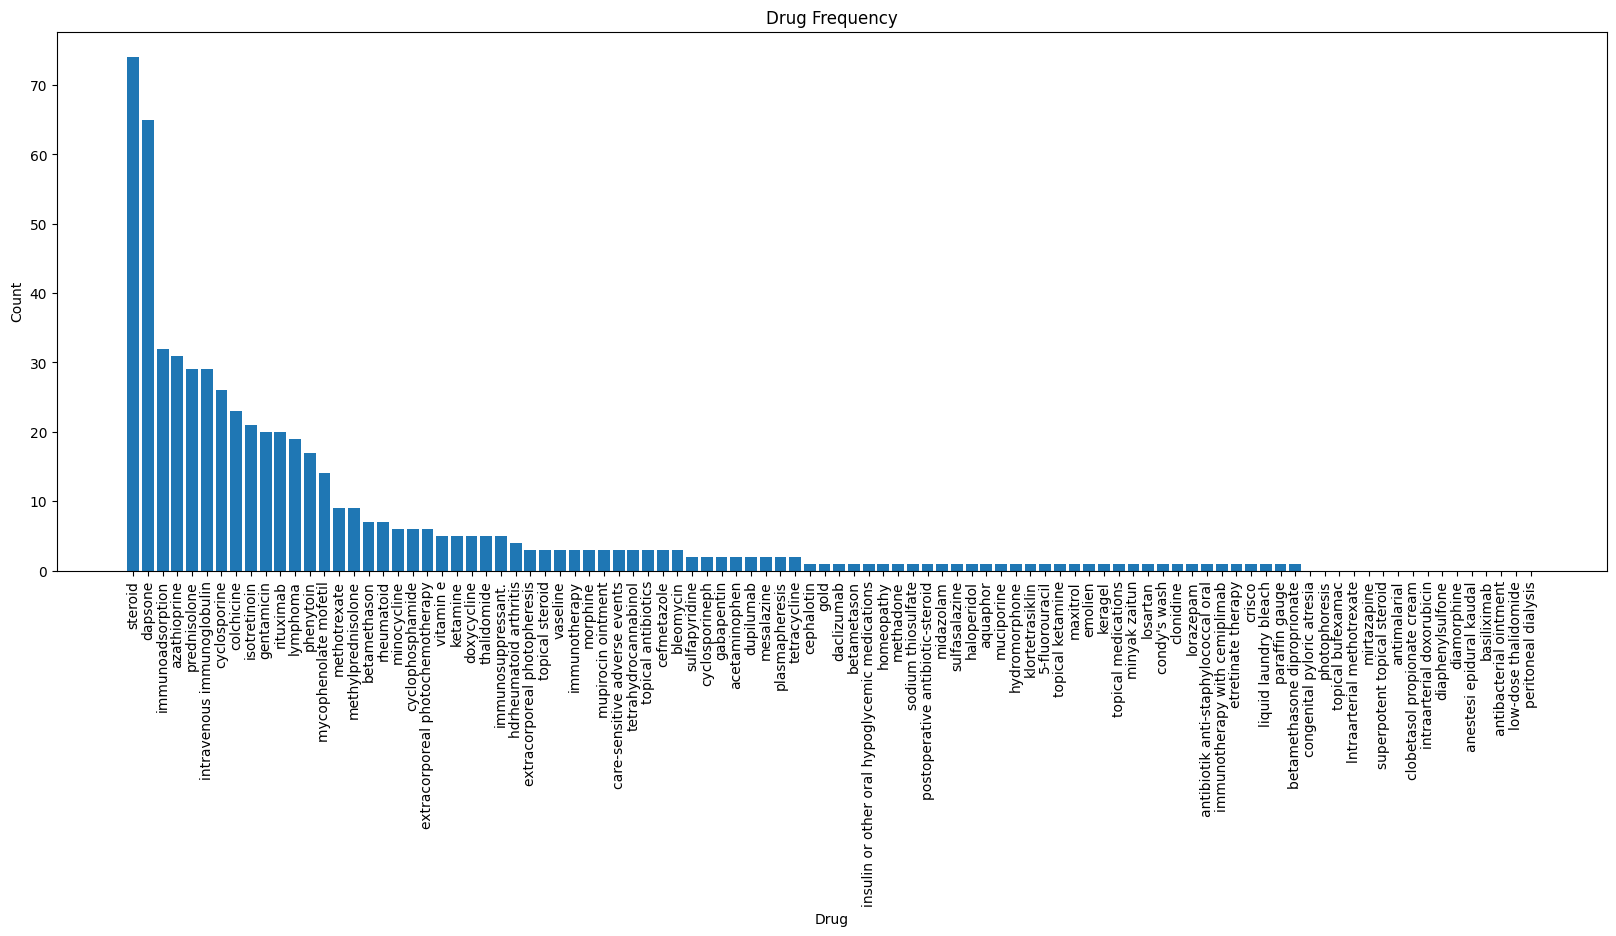

In [104]:
# Mengambil 5 kategori teratas berdasarkan jumlah kemunculan
top_5_labels = []
top_5_y = []

sorted_counts = dict(sorted(count_drugs.items(), key=lambda item: item[1], reverse=True))
top_5_counts = dict(list(sorted_counts.items()))

for label, count in top_5_counts.items():
    top_5_labels.append(label)
    top_5_y.append(count)

# Plot
fig = plt.figure(figsize=(20, 7))
plt.xlabel('Drug')
plt.ylabel('Count')
plt.title('Drug Frequency')
plt.bar(top_5_labels, top_5_y)
plt.xticks(range(len(top_5_labels)), top_5_labels, rotation='vertical')
plt.show()

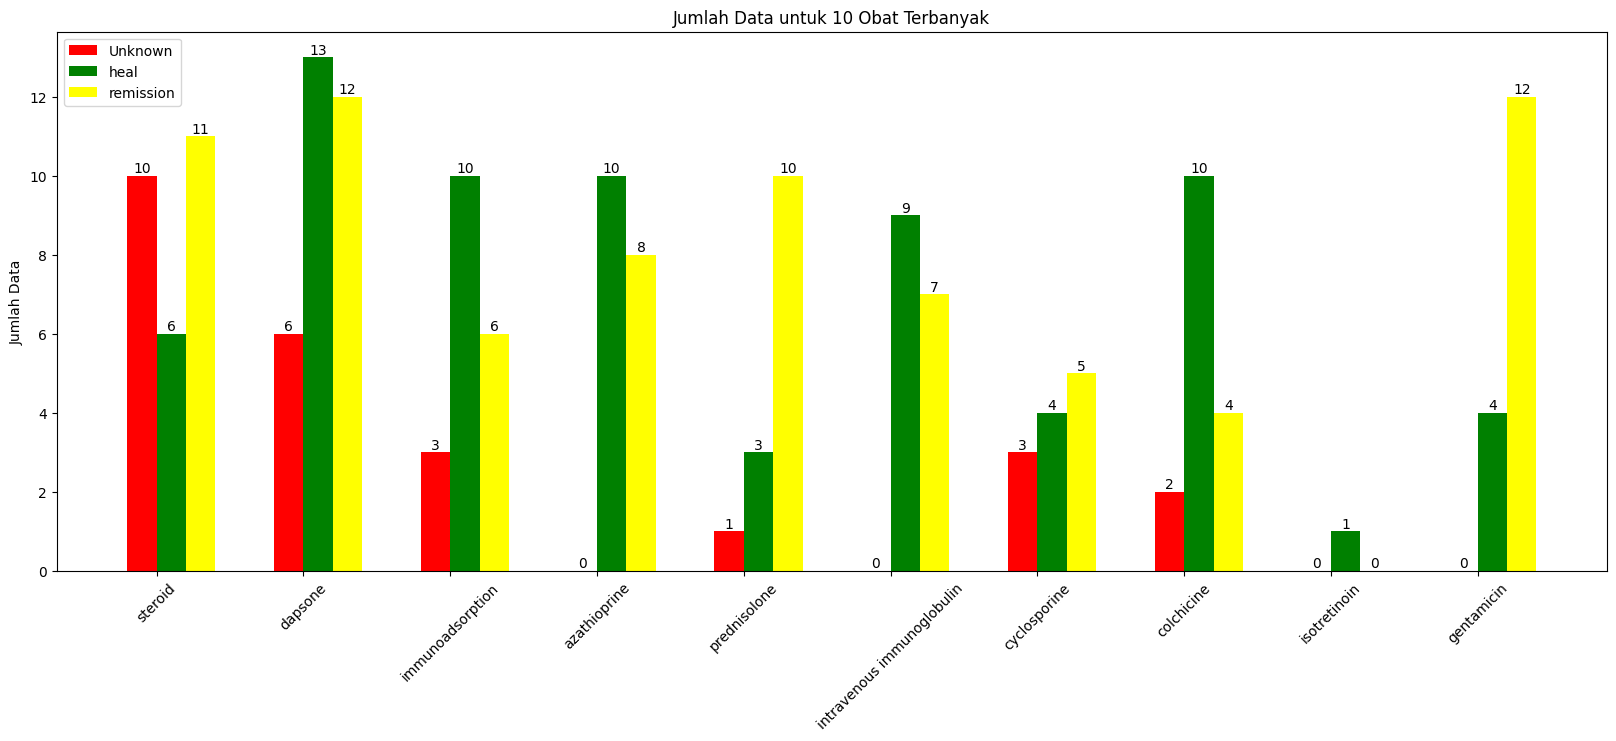

In [105]:
import numpy as np
# Mengambil 5 obat terbanyak
top_5_drugs = [drug for drug, count in count_drugs.most_common(best_cound_data)]
top_5_val_drugs = [count for drug, count in count_drugs.most_common(best_cound_data)]
top_5_outcome_per_drug = [outcome_drugs[drug] for drug in top_5_drugs]

# Mengambil outcome yang ingin ditampilkan
outcomes_of_interest = ['Unknown', 'heal', 'remission']

outcome_counts = {
    'Unknown' : [],
    'heal' : [],
    'remission' : []
}
for i in range(len(top_5_drugs)):
  try:
    outcome_counts['Unknown'].append(top_5_outcome_per_drug[i]['Unknown'])
  except:
    outcome_counts['Unknown'].append(0)

  try:
    outcome_counts['heal'].append(top_5_outcome_per_drug[i]['heal'])
  except:
    outcome_counts['heal'].append(0)

  try:
    outcome_counts['remission'].append(top_5_outcome_per_drug[i]['remission'])
  except:
    outcome_counts['remission'].append(0)

# Mengatur lebar batang
bar_width = 0.2

# Menghasilkan posisi batang untuk setiap obat
r1 = np.arange(len(top_5_drugs))
r2 = [r + bar_width for r in r1]
r3 = [r + bar_width for r in r2]
r4 = [r + bar_width for r in r3]

# Plot
fig, ax = plt.subplots(figsize=(20, 7))
# bar1 = ax.bar(r1, top_5_val_drugs, width=bar_width, label='Jumlah Data', color='blue')
bar2 = ax.bar(r2, outcome_counts['Unknown'], width=bar_width, label='Unknown', color='red')
bar3 = ax.bar(r3, outcome_counts['heal'], width=bar_width, label='heal', color='green')
bar4 = ax.bar(r4, outcome_counts['remission'], width=bar_width, label='remission', color='yellow')

# Menambahkan label pada sumbu x
ax.set_xticks([r + 1.5 * bar_width for r in range(len(top_5_drugs))])
ax.set_xticklabels(top_5_drugs, rotation=45)

# Menambahkan label pada sumbu y
ax.set_ylabel('Jumlah Data')

# Menambahkan judul
ax.set_title('Jumlah Data untuk 10 Obat Terbanyak')

# Menambahkan legend
ax.legend()

# Menambahkan nilai pada batang
for i in range(len(top_5_drugs)):
    # ax.text(bar1[i].get_x() + bar1[i].get_width() / 2.0, bar1[i].get_height(), top_5_val_drugs[i], ha='center', va='bottom')
    ax.text(bar2[i].get_x() + bar2[i].get_width() / 2.0, bar2[i].get_height(), outcome_counts['Unknown'][i], ha='center', va='bottom')
    ax.text(bar3[i].get_x() + bar3[i].get_width() / 2.0, bar3[i].get_height(), outcome_counts['heal'][i], ha='center', va='bottom')
    ax.text(bar4[i].get_x() + bar4[i].get_width() / 2.0, bar4[i].get_height(), outcome_counts['remission'][i], ha='center', va='bottom')

plt.show()


In [106]:
outcome_counts

{'Unknown': [10, 6, 3, 0, 1, 0, 3, 2, 0, 0],
 'heal': [6, 13, 10, 10, 3, 9, 4, 10, 1, 4],
 'remission': [11, 12, 6, 8, 10, 7, 5, 4, 0, 12]}

In [107]:
import numpy as np
import matplotlib.pyplot as plt

# Mengambil 5 obat terbanyak
top_5_drugs = [drug for drug, count in count_drugs.most_common(best_cound_data)]

# Mengambil outcome yang ingin ditampilkan
outcomes_of_interest = ['Unknown', 'heal', 'remission']

# Mengubah format outcome_counts menjadi dataframe
outcome_counts_df = pd.DataFrame(outcome_counts, index=top_5_drugs)

# # Membuat pie chart per data obatnya
# for drug, outcome_counts_per_drug in outcome_counts_df.iterrows():
#     outcome_counts_per_drug_list = outcome_counts_per_drug.to_list()

#     plt.pie(outcome_counts_per_drug_list, labels=outcomes_of_interest, autopct="%1.1f%%")
#     plt.title(f'Pie Chart Jumlah Outcome untuk Obat {drug}')
#     plt.show()

In [108]:
len(all_drug)

96

In [109]:
median_of_age = df['Age'].median()

In [110]:
drug_analysis = {
    'Drug' : top_5_drugs,
    'All Cases' : top_5_val_drugs,
    'DEB type' : [0 for i in range(len(top_5_drugs))],
    'EBA type' : [0 for i in range(len(top_5_drugs))],
    f'Age =< Median({median_of_age}y)' : [0 for i in range(len(top_5_drugs))],
    f'Age > Median({median_of_age}y)' : [0 for i in range(len(top_5_drugs))],
    'Male' : [0 for i in range(len(top_5_drugs))],
    'Female' : [0 for i in range(len(top_5_drugs))],
    'Mild' : [0 for i in range(len(top_5_drugs))],
    'Moderate' : [0 for i in range(len(top_5_drugs))],
    'Chronic' : [0 for i in range(len(top_5_drugs))],
    'Unknown' : [outcome_counts['Unknown'][i] for i in range(len(top_5_outcome_per_drug))],
    'Heal' : [outcome_counts['heal'][i] for i in range(len(top_5_outcome_per_drug))],
    'Remission' : [outcome_counts['remission'][i] for i in range(len(top_5_outcome_per_drug))]
}

In [111]:
deb_cases = df[(df['EB Type 2'] == 'DEB')]
deb_cases = deb_cases.reset_index(drop=True)
for i in range(len(deb_cases)):
  for j in range(len(top_5_drugs)):
    if top_5_drugs[j] in deb_cases['Drug'][i]:
      drug_analysis['DEB type'][j] += 1

deb_cases = df[(df['EB Type 2'] == 'EBA')]
deb_cases = deb_cases.reset_index(drop=True)
for i in range(len(deb_cases)):
  for j in range(len(top_5_drugs)):
    if top_5_drugs[j] in deb_cases['Drug'][i]:
      drug_analysis['EBA type'][j] += 1

In [112]:
df['Severity'].unique()

array(['chronic', '0', 'mild', 'moderate'], dtype=object)

In [113]:

for i in range(len(df)):
  for j in range(len(top_5_drugs)):
    if top_5_drugs[j] in df['Drug'][i]:
      if df['Age'][i] <= median_of_age:
        drug_analysis[f'Age =< Median({median_of_age}y)'][j] += 1

      if df['Age'][i] > median_of_age:
        drug_analysis[f'Age > Median({median_of_age}y)'][j] += 1

      if df['Gender (M/F)'][i] == 'm':
        drug_analysis['Male'][j] += 1
      if df['Gender (M/F)'][i] == 'f':
        drug_analysis['Female'][j] += 1

      if df['Severity'][i] == 'mild':
        drug_analysis['Mild'][j] += 1
      if df['Severity'][i] == 'moderate':
        drug_analysis['Moderate'][j] += 1
      if df['Severity'][i] == 'chronic':
        drug_analysis['Chronic'][j] += 1

In [114]:
drug_analysis = pd.DataFrame(drug_analysis)

In [115]:
drug_analysis

,Drug,All Cases,DEB type,EBA type,Age =< Median(17.0y),Age > Median(17.0y),Male,Female,Mild,Moderate,Chronic,Unknown,Heal,Remission
0,steroid,74,14,52,32,42,36,38,1,1,3,10,6,11
1,dapsone,65,0,63,22,43,32,33,1,0,3,6,13,12
2,immunoadsorption,32,10,6,18,14,10,22,1,1,5,3,10,6
3,azathioprine,31,0,29,2,29,16,15,0,1,1,0,10,8
4,prednisolone,29,1,24,4,25,17,12,1,2,2,1,3,10
5,intravenous immunoglobulin,29,1,28,3,25,20,9,0,0,3,0,9,7
6,cyclosporine,26,7,19,2,24,11,15,0,1,3,3,4,5
7,colchicine,23,1,21,2,21,12,11,0,0,2,2,10,4
8,isotretinoin,21,20,0,2,19,0,1,0,0,0,0,1,0
9,gentamicin,20,8,0,15,5,8,11,0,2,4,0,4,12


In [116]:
drug_analysis.to_excel('drug_analysis.xlsx', index=False)

#### worsened/no respond/partial remission/complete remission

In [117]:
from collections import Counter

# Membuat set unik dari obat-obatan
# all_drug = set()
# for drug_list in df['Drug']:
#     drugs = drug_list.replace(',', ';').replace(' and ', ';').split(';')
#     drugs = drug_list.replace('+', ';').split(';')
#     all_drug.update(drugs)
all_drug = df_list_drug_fix['Nama Obat'].tolist()

# all_drug = list(all_drug)
# all_drug = [string.strip() for string in all_drug]
# remove_list = ['\n', '', ' ']
# for i in remove_list:
#   try:
#     all_drug.remove(i)
#   except:
#     continue

# res_all_drug = []
# generalizing_list = ['lymphoma', 'dapsone', 'topical', 'colchicine', 'prednisone', 'azathioprine', 'intravenous immunoglobulin', 'mycophenolate mofetil', 'steroid',
#                      'prednisolon', 'ivig', 'mmf', 'steroids']
# for i in generalizing_list:
#   drugs_tes = generalizing_function(all_drug, i, i)
#   if i == 'intravenous immunoglobulin':
#     drugs_tes = generalizing_function(all_drug, i, 'ivig')
#   if i == 'mmf':
#     drugs_tes = generalizing_function(all_drug, i, 'mycophenolate mofetil')
#   if i == 'steroids':
#     drugs_tes = generalizing_function(all_drug, i, 'steroid')
#   res_all_drug.append(drugs_tes)

# res_all_drug = list(set(flatten(res_all_drug)))
# # res_all_drug = list(set([str(res_all_drug[i]).replace('nan', '0').replace('-', '0').replace('0', 'Unknown') for i in range(len(res_all_drug))]))
# res_all_drug = list(set([res_all_drug[i] for i in range(len(res_all_drug)) if res_all_drug[i] != 'no' and res_all_drug[i] != 'nan' and res_all_drug[i] != '-']))

# all_drug = res_all_drug

# for i in range(len(all_drug)):
#   if all_drug[i] == 'steroid,':
#     all_drug[i] = 'steroid'

all_drug = list(set(all_drug))
# Menghitung jumlah kemunculan masing-masing obat
count_drugs = Counter()
outcome_drugs = {}

for drug in all_drug:
    # if drug != '0' and ',' not in drug:
    #   count = sum(df['Drug'].apply(lambda x: drug in x))
    #   count_drugs[drug] = count
    #   outcome_counts = df[df['Drug'].apply(lambda x: drug in x)]['Outcome'].value_counts()
    #   outcome_drugs[drug] = outcome_counts.to_dict()

    count = sum(df['Drug'].apply(lambda x: drug in x))
    count_drugs[drug] = count
    outcome_counts = df[df['Drug'].apply(lambda x: drug in x)]['worsened/no respond/partial remission/complete remission'].value_counts()
    outcome_drugs[drug] = outcome_counts.to_dict()

# Menyimpan hasil dalam list
drugs = list(count_drugs.keys())
val_drugs = list(count_drugs.values())
outcome_per_drug = [outcome_drugs[drug] for drug in drugs]

In [118]:
drugs_dff = pd.DataFrame({
    'drug name' : drugs,
    'frequently' : val_drugs
})

drugs_dff.to_excel('drugs_list.xlsx', index=False)

In [119]:
outcome_per_drug

[{'partial remission': 1},
 {'complete remission': 1},
 {},
 {'partial remission': 5, 'complete remission': 1},
 {},
 {'partial remission': 4, 'complete remission': 2},
 {'complete remission': 10,
  'partial remission': 6,
  'no respond': 2,
  'worsened': 1},
 {'partial remission': 1, 'complete remission': 1},
 {'worsened': 4, 'complete remission': 3, 'partial remission': 2},
 {'complete remission': 1},
 {'partial remission': 1},
 {'partial remission': 17,
  'complete remission': 5,
  'unknown ': 2,
  'unknown': 1,
  'worsened': 1},
 {'unknown ': 1},
 {'complete remission': 2},
 {'partial remission': 1},
 {'partial remission': 3},
 {'partial remission': 1},
 {'partial remission': 1},
 {'partial remission': 1},
 {'partial remission': 20,
  'complete remission': 5,
  'worsened': 2,
  'unknown ': 1,
  'partial remission ': 1},
 {},
 {'partial remission': 1, 'unknown ': 1},
 {'partial remission': 1},
 {'complete remission': 1},
 {'partial remission': 1, 'no respond': 1},
 {'partial remissi

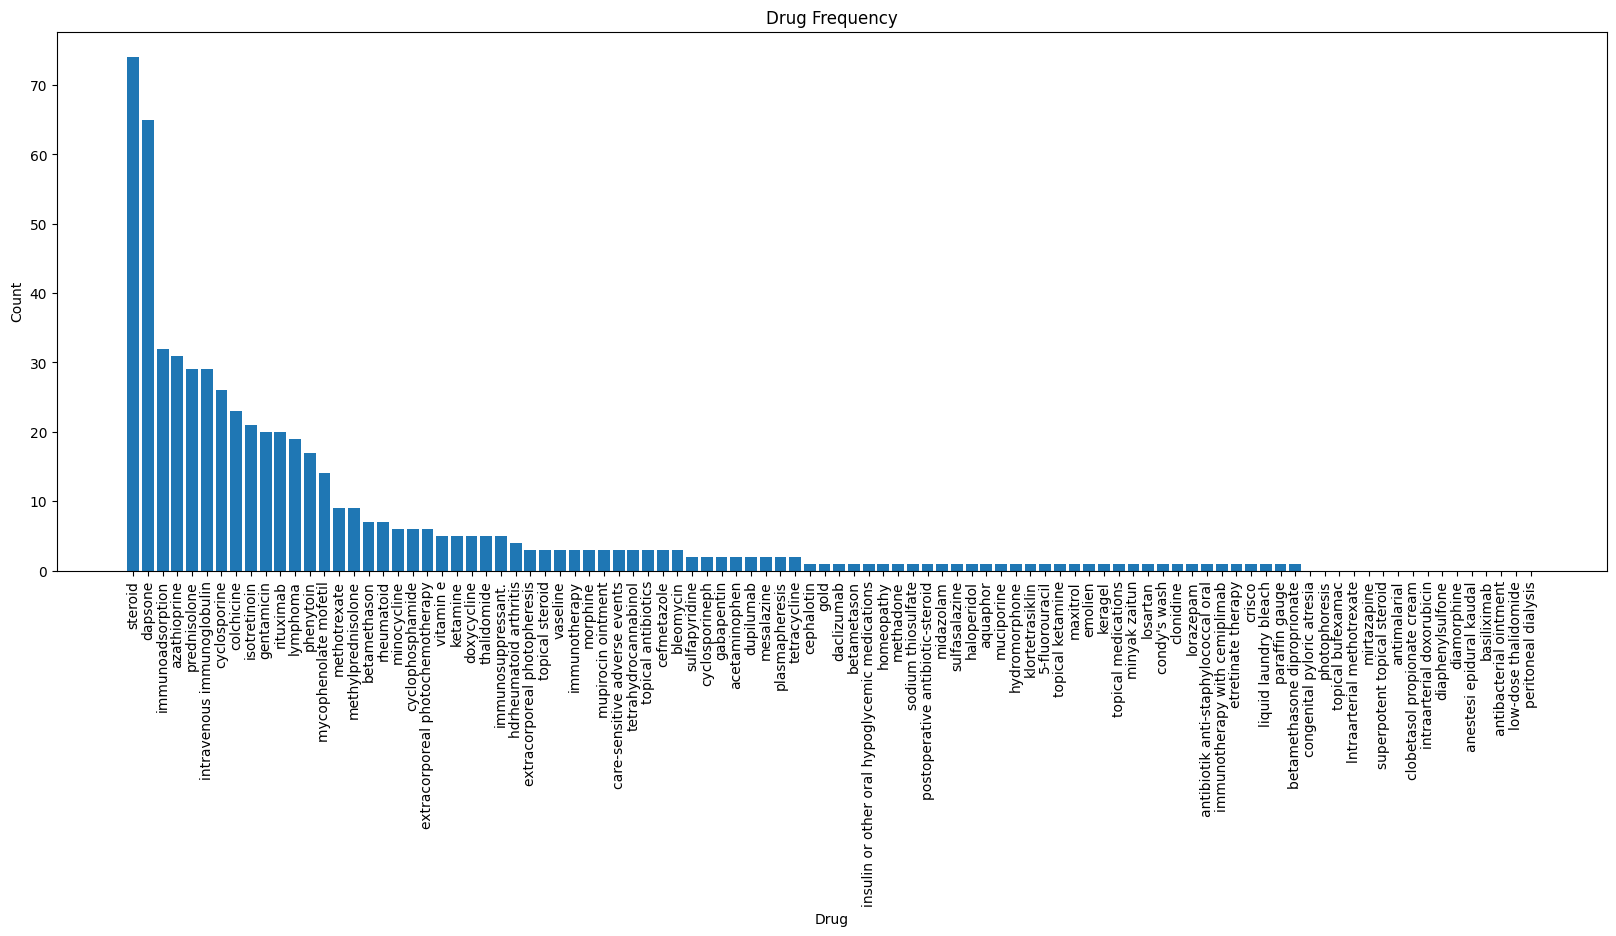

In [120]:
# Mengambil 5 kategori teratas berdasarkan jumlah kemunculan
top_5_labels = []
top_5_y = []

sorted_counts = dict(sorted(count_drugs.items(), key=lambda item: item[1], reverse=True))
top_5_counts = dict(list(sorted_counts.items()))

for label, count in top_5_counts.items():
    top_5_labels.append(label)
    top_5_y.append(count)

# Plot
fig = plt.figure(figsize=(20, 7))
plt.xlabel('Drug')
plt.ylabel('Count')
plt.title('Drug Frequency')
plt.bar(top_5_labels, top_5_y)
plt.xticks(range(len(top_5_labels)), top_5_labels, rotation='vertical')
plt.show()

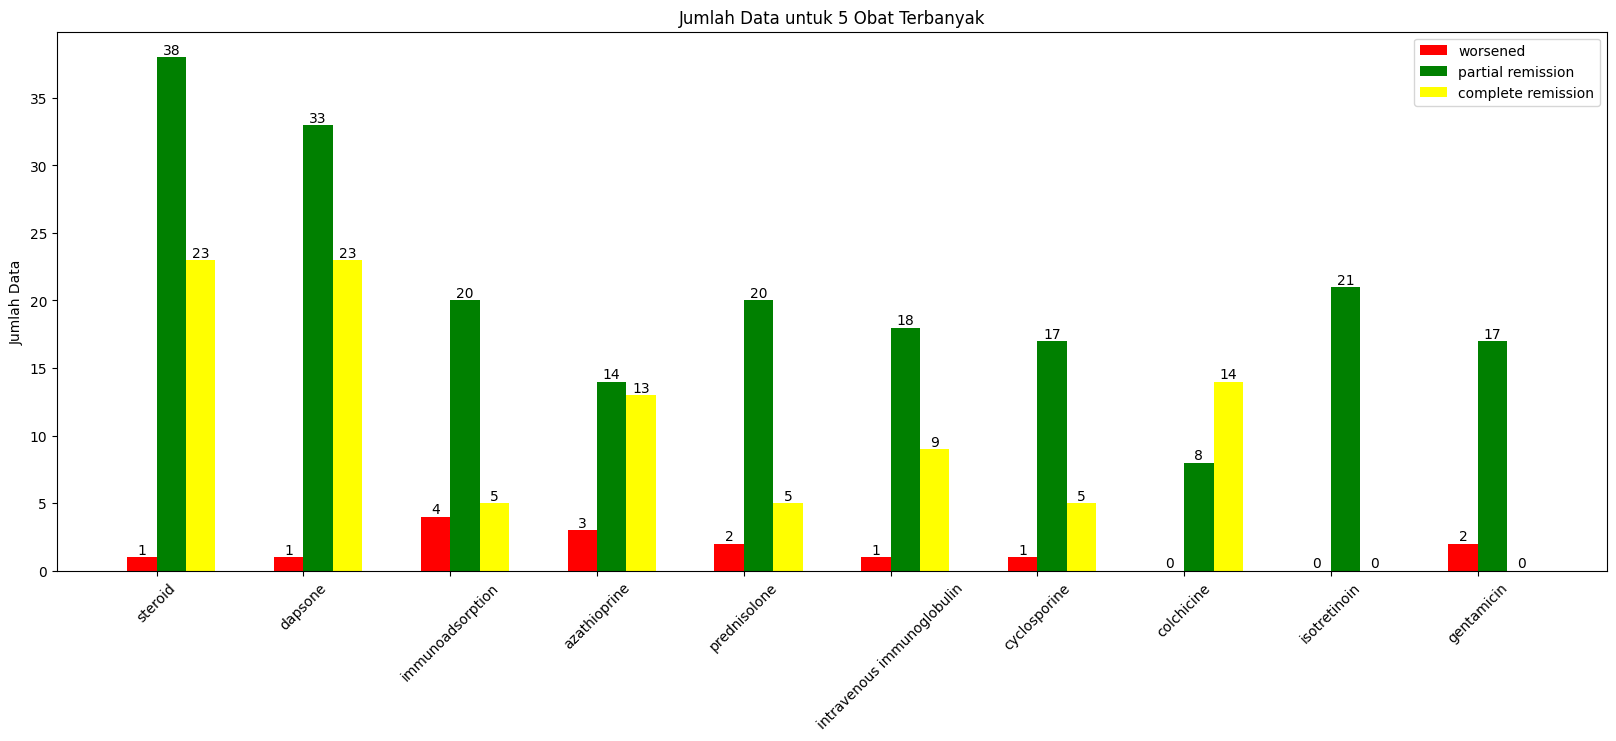

In [121]:
import numpy as np
# Mengambil 5 obat terbanyak
top_5_drugs = [drug for drug, count in count_drugs.most_common(best_cound_data)]
top_5_val_drugs = [count for drug, count in count_drugs.most_common(best_cound_data)]
top_5_outcome_per_drug = [outcome_drugs[drug] for drug in top_5_drugs]

# Mengambil outcome yang ingin ditampilkan
outcomes_of_interest = ['worsened', 'partial remission', 'complete remission']

outcome_counts = {}
for i in outcomes_of_interest:
  outcome_counts[i] = []

for i in range(len(top_5_drugs)):
  for j in outcomes_of_interest:
    try:
      outcome_counts[j].append(top_5_outcome_per_drug[i][j])
    except:
      outcome_counts[j].append(0)

# Mengatur lebar batang
bar_width = 0.2

# Menghasilkan posisi batang untuk setiap obat
r1 = np.arange(len(top_5_drugs))
r2 = [r + bar_width for r in r1]
r3 = [r + bar_width for r in r2]
r4 = [r + bar_width for r in r3]
r5 = [r + bar_width for r in r4]

# Plot
fig, ax = plt.subplots(figsize=(20, 7))
# bar1 = ax.bar(r1, top_5_val_drugs, width=bar_width, label='Jumlah Data', color='blue')
bar2 = ax.bar(r2, outcome_counts[outcomes_of_interest[0]], width=bar_width, label=outcomes_of_interest[0], color='red')
bar3 = ax.bar(r3, outcome_counts[outcomes_of_interest[1]], width=bar_width, label=outcomes_of_interest[1], color='green')
bar4 = ax.bar(r4, outcome_counts[outcomes_of_interest[2]], width=bar_width, label=outcomes_of_interest[2], color='yellow')
# bar5 = ax.bar(r5, outcome_counts[outcomes_of_interest[3]], width=bar_width, label=outcomes_of_interest[3], color='orange')

# Menambahkan label pada sumbu x
ax.set_xticks([r + 1.5 * bar_width for r in range(len(top_5_drugs))])
ax.set_xticklabels(top_5_drugs, rotation=45)

# Menambahkan label pada sumbu y
ax.set_ylabel('Jumlah Data')

# Menambahkan judul
ax.set_title('Jumlah Data untuk 5 Obat Terbanyak')

# Menambahkan legend
ax.legend()

# Menambahkan nilai pada batang
for i in range(len(top_5_drugs)):
    # ax.text(bar1[i].get_x() + bar1[i].get_width() / 2.0, bar1[i].get_height(), top_5_val_drugs[i], ha='center', va='bottom')
    ax.text(bar2[i].get_x() + bar2[i].get_width() / 2.0, bar2[i].get_height(), outcome_counts[outcomes_of_interest[0]][i], ha='center', va='bottom')
    ax.text(bar3[i].get_x() + bar3[i].get_width() / 2.0, bar3[i].get_height(), outcome_counts[outcomes_of_interest[1]][i], ha='center', va='bottom')
    ax.text(bar4[i].get_x() + bar4[i].get_width() / 2.0, bar4[i].get_height(), outcome_counts[outcomes_of_interest[2]][i], ha='center', va='bottom')
    # ax.text(bar5[i].get_x() + bar4[i].get_width() / 2.0, bar5[i].get_height(), outcome_counts[outcomes_of_interest[3]][i], ha='center', va='bottom')

plt.show()


In [122]:
outcome_counts

{'worsened': [1, 1, 4, 3, 2, 1, 1, 0, 0, 2],
 'partial remission': [38, 33, 20, 14, 20, 18, 17, 8, 21, 17],
 'complete remission': [23, 23, 5, 13, 5, 9, 5, 14, 0, 0]}

In [123]:
import numpy as np
import matplotlib.pyplot as plt

# Mengambil 5 obat terbanyak
top_5_drugs = [drug for drug, count in count_drugs.most_common(best_cound_data)]

# Mengambil outcome yang ingin ditampilkan
outcomes_of_interest = outcomes_of_interest

# Mengubah format outcome_counts menjadi dataframe
outcome_counts_df = pd.DataFrame(outcome_counts, index=top_5_drugs)

# # Membuat pie chart per data obatnya
# for drug, outcome_counts_per_drug in outcome_counts_df.iterrows():
#     outcome_counts_per_drug_list = outcome_counts_per_drug.to_list()

#     plt.pie(outcome_counts_per_drug_list, labels=outcomes_of_interest, autopct="%1.1f%%")
#     plt.title(f'Pie Chart Jumlah Outcome untuk Obat {drug}')
#     plt.show()

In [124]:
len(all_drug)

96

In [125]:
median_of_age = df['Age'].median()

In [126]:
drug_analysis = {
    'Drug' : top_5_drugs,
    'All Cases' : top_5_val_drugs,
    'DEB type' : [0 for i in range(len(top_5_drugs))],
    'EBS type' : [0 for i in range(len(top_5_drugs))],
    'JEB type' : [0 for i in range(len(top_5_drugs))],
    'KS type' : [0 for i in range(len(top_5_drugs))],
    'EBA type' : [0 for i in range(len(top_5_drugs))],
    f'Age =< Median({median_of_age}y)' : [0 for i in range(len(top_5_drugs))],
    f'Age > Median({median_of_age}y)' : [0 for i in range(len(top_5_drugs))],
    'Male' : [0 for i in range(len(top_5_drugs))],
    'Female' : [0 for i in range(len(top_5_drugs))],
    'Unknown[Gender]' : [0 for i in range(len(top_5_drugs))],
    'Mild' : [0 for i in range(len(top_5_drugs))],
    'Moderate' : [0 for i in range(len(top_5_drugs))],
    'Chronic' : [0 for i in range(len(top_5_drugs))],
    outcomes_of_interest[0] : [outcome_counts[outcomes_of_interest[0]][i] for i in range(len(top_5_outcome_per_drug))],
    outcomes_of_interest[1] : [outcome_counts[outcomes_of_interest[1]][i] for i in range(len(top_5_outcome_per_drug))],
    outcomes_of_interest[2] : [outcome_counts[outcomes_of_interest[2]][i] for i in range(len(top_5_outcome_per_drug))],
    # outcomes_of_interest[3] : [outcome_counts[outcomes_of_interest[3]][i] for i in range(len(top_5_outcome_per_drug))]
}

In [127]:
all_eb_type_val2 = ["DEB", "JEB", "EBS","KS", "EBA"]
for EB_type_ in all_eb_type_val2:
  eb_type_val2 = EB_type_
  deb_cases = df[(df['EB Type 2'] == eb_type_val2)]
  deb_cases = deb_cases.reset_index(drop=True)
  for i in range(len(deb_cases)):
    for j in range(len(top_5_drugs)):
      if top_5_drugs[j] in deb_cases['Drug'][i]:
        drug_analysis[f'{eb_type_val2} type'][j] += 1

# deb_cases = df[(df['EB Type 2'] == 'EBA')]
# deb_cases = deb_cases.reset_index(drop=True)
# for i in range(len(deb_cases)):
#   for j in range(len(top_5_drugs)):
#     if top_5_drugs[j] in deb_cases['Drug'][i]:
#       drug_analysis['EBA type'][j] += 1

In [128]:
df['Severity'].unique()

array(['chronic', '0', 'mild', 'moderate'], dtype=object)

In [129]:
df['Gender (M/F)'].unique()

array(['m', 'f', '0'], dtype=object)

In [130]:

for i in range(len(df)):
  for j in range(len(top_5_drugs)):
    if top_5_drugs[j] in df['Drug'][i]:
      if df['Age'][i] <= median_of_age:
        drug_analysis[f'Age =< Median({median_of_age}y)'][j] += 1

      if df['Age'][i] > median_of_age:
        drug_analysis[f'Age > Median({median_of_age}y)'][j] += 1

      if df['Gender (M/F)'][i] == 'm':
        drug_analysis['Male'][j] += 1
      if df['Gender (M/F)'][i] == 'f':
        drug_analysis['Female'][j] += 1
      if df['Gender (M/F)'][i] == '0':
        drug_analysis['Unknown[Gender]'][j] += 1

      if df['Severity'][i] == 'mild':
        drug_analysis['Mild'][j] += 1
      if df['Severity'][i] == 'moderate':
        drug_analysis['Moderate'][j] += 1
      if df['Severity'][i] == 'chronic':
        drug_analysis['Chronic'][j] += 1

In [131]:
drug_analysis = pd.DataFrame(drug_analysis)

In [132]:
drug_analysis

,Drug,All Cases,DEB type,EBS type,JEB type,KS type,EBA type,Age =< Median(17.0y),Age > Median(17.0y),Male,Female,Unknown[Gender],Mild,Moderate,Chronic,worsened,partial remission,complete remission
0,steroid,74,14,0,6,1,52,32,42,36,38,0,1,1,3,1,38,23
1,dapsone,65,0,1,1,0,63,22,43,32,33,0,1,0,3,1,33,23
2,immunoadsorption,32,10,3,7,1,6,18,14,10,22,0,1,1,5,4,20,5
3,azathioprine,31,0,0,0,1,29,2,29,16,15,0,0,1,1,3,14,13
4,prednisolone,29,1,0,3,1,24,4,25,17,12,0,1,2,2,2,20,5
5,intravenous immunoglobulin,29,1,0,0,0,28,3,25,20,9,0,0,0,3,1,18,9
6,cyclosporine,26,7,0,0,0,19,2,24,11,15,0,0,1,3,1,17,5
7,colchicine,23,1,0,1,0,21,2,21,12,11,0,0,0,2,0,8,14
8,isotretinoin,21,20,1,0,0,0,2,19,0,1,20,0,0,0,0,21,0
9,gentamicin,20,8,1,10,0,0,15,5,8,11,1,0,2,4,2,17,0


In [133]:
drug_analysis.to_excel('drug_analysis_vers2.xlsx', index=False)

## Keterlibatan Mucosa

In [134]:
def mucosa_processing(txt):
  replace_text = ['>20% percentage body surface area involved (cutaneous)', ' was\nscarred', ' >50% percentage body surface area involved (cutaneous)',
                  ' >30% percentage body surface area involved (cutaneous)']
  for i in replace_text:
    txt = txt.replace(i, '')
  return txt

def mucosa_generalizing(txt):
  replace_text = ['mucosa', 'mocosal', 'mucous', 'mucousal']
  for i in replace_text:
    txt = txt.replace(i, 'mucous')

  replace_text2 = ['esofagus', 'esophageal', 'esophagus', 'oesophageal']
  for i in replace_text2:
    txt = txt.replace(i, 'esophagus ')

  replace_text2 = ['including the ', 'leading to ']
  for i in replace_text2:
    txt = txt.replace(i, '')
  return txt

In [135]:
df['Keterlibatan Mucosa'] = [str(df['Keterlibatan Mucosa'][i]).replace('mulut', 'oral') for i in range(len(df))]
df['Keterlibatan Mucosa'] = [str(df['Keterlibatan Mucosa'][i]).replace('-', '0') for i in range(len(df))]
df['Keterlibatan Mucosa'] = [str(df['Keterlibatan Mucosa'][i]).replace('+', 'mucosa') for i in range(len(df))]
df['Keterlibatan Mucosa'] = [str(df['Keterlibatan Mucosa'][i]).replace('membranes', 'membrane').replace('conjunctivae', 'conjunctival') for i in range(len(df))]
df['Keterlibatan Mucosa'] = [mucosa_generalizing(str(df['Keterlibatan Mucosa'][i])) for i in range(len(df))]

In [136]:
all_mucosa = [str(df['Keterlibatan Mucosa'][i]).replace('-', '0').split(';') for i in range(len(df))]
all_mucosa = list(set(flatten(all_mucosa)))
all_mucosa = [all_mucosa[i].replace('+', 'mucosa') for i in range(len(all_mucosa))]
all_mucosa = [all_mucosa[i].split(',') for i in range(len(all_mucosa))]
all_mucosa = list(set(flatten(all_mucosa)))
all_mucosa = [all_mucosa[i].split(' and ') for i in range(len(all_mucosa))]
all_mucosa = list(set(flatten(all_mucosa)))
all_mucosa = [all_mucosa[i].split(' or ') for i in range(len(all_mucosa))]
all_mucosa = list(set(flatten(all_mucosa)))
all_mucosa = [string.strip() for string in all_mucosa]
all_mucosa = [mucosa_processing(string) for string in all_mucosa]
all_mucosa = list(set(flatten(all_mucosa)))
all_mucosa = [all_mucosa[i].replace('mulut', 'oral') for i in range(len(all_mucosa))]
all_mucosa = list(set(flatten(all_mucosa)))
all_mucosa = [all_mucosa[i].replace(' mucous', '') for i in range(len(all_mucosa))]
all_mucosa = list(set(flatten(all_mucosa)))
all_mucosa = [all_mucosa[i].replace(' lesions', '') for i in range(len(all_mucosa))]
all_mucosa = list(set(flatten(all_mucosa)))
all_mucosa = [all_mucosa[i].replace(' involvement', '').replace(' membrane', '').replace(' stricture', '') for i in range(len(all_mucosa))]
all_mucosa = [all_mucosa[i].replace('orall', 'oral').replace('oralc', 'oral').replace('conjunctivae', 'conjunctival') for i in range(len(all_mucosa))]
all_mucosa = list(set(flatten(all_mucosa)))
all_mucosa = [string.strip() for string in all_mucosa]

In [137]:
remove_list = ['\n', '']
for i in remove_list:
  try:
    all_mucosa.remove(i)
  except:
    continue

In [138]:
all_mucosa = list(set(all_mucosa))
# Menghitung jumlah kemunculan masing-masing obat
count_mucosa = Counter()

for drug in all_mucosa:
    count = sum(df['Keterlibatan Mucosa'].apply(lambda x: drug in x))
    count_mucosa[drug] = count

# Menyimpan hasil dalam list
mucosa = list(count_mucosa.keys())
val_mucosa = list(count_mucosa.values())

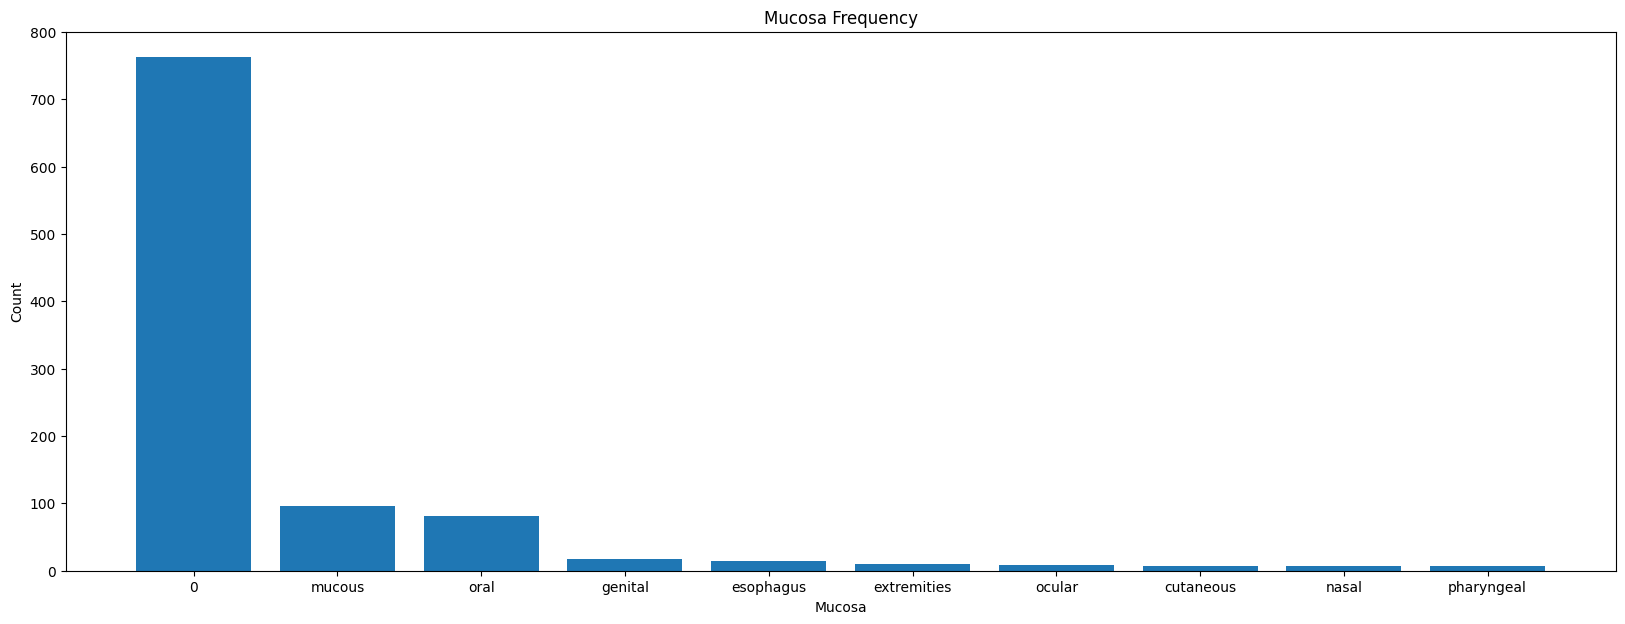

In [139]:
# Mengambil 5 kategori teratas berdasarkan jumlah kemunculan
top_5_labels = []
top_5_y = []

sorted_counts = dict(sorted(count_mucosa.items(), key=lambda item: item[1], reverse=True))
top_5_counts = dict(list(sorted_counts.items())[:best_cound_data])

for label, count in top_5_counts.items():
    top_5_labels.append(label)
    top_5_y.append(count)

# Plot
fig = plt.figure(figsize=(20, 7))
plt.xlabel('Mucosa')
plt.ylabel('Count')
plt.title('Mucosa Frequency')
plt.bar(top_5_labels, top_5_y)
plt.show()

## Outcome

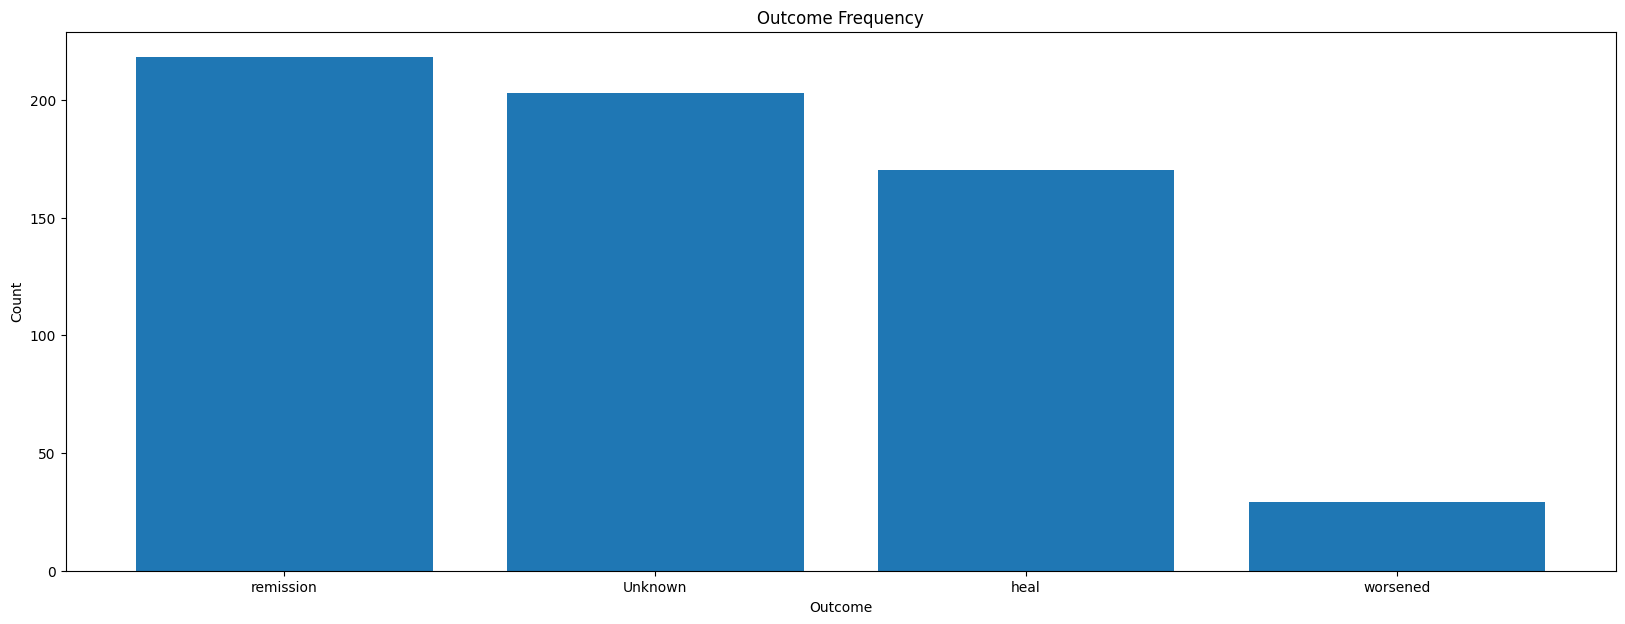

In [140]:
# Mendapatkan nilai counts untuk setiap kategori
outcome = df['Outcome'].value_counts()

# Mengambil 5 kategori teratas
top_categories = outcome.nlargest(best_cound_data)

# Mendapatkan nilai dan label dari 5 kategori teratas
labels = top_categories.index
y = top_categories.values

# Plot
fig = plt.figure(figsize=(20, 7))
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Outcome Frequency')
plt.bar(labels, y)
plt.show()

## worsened/no respond/partial remission/complete remission

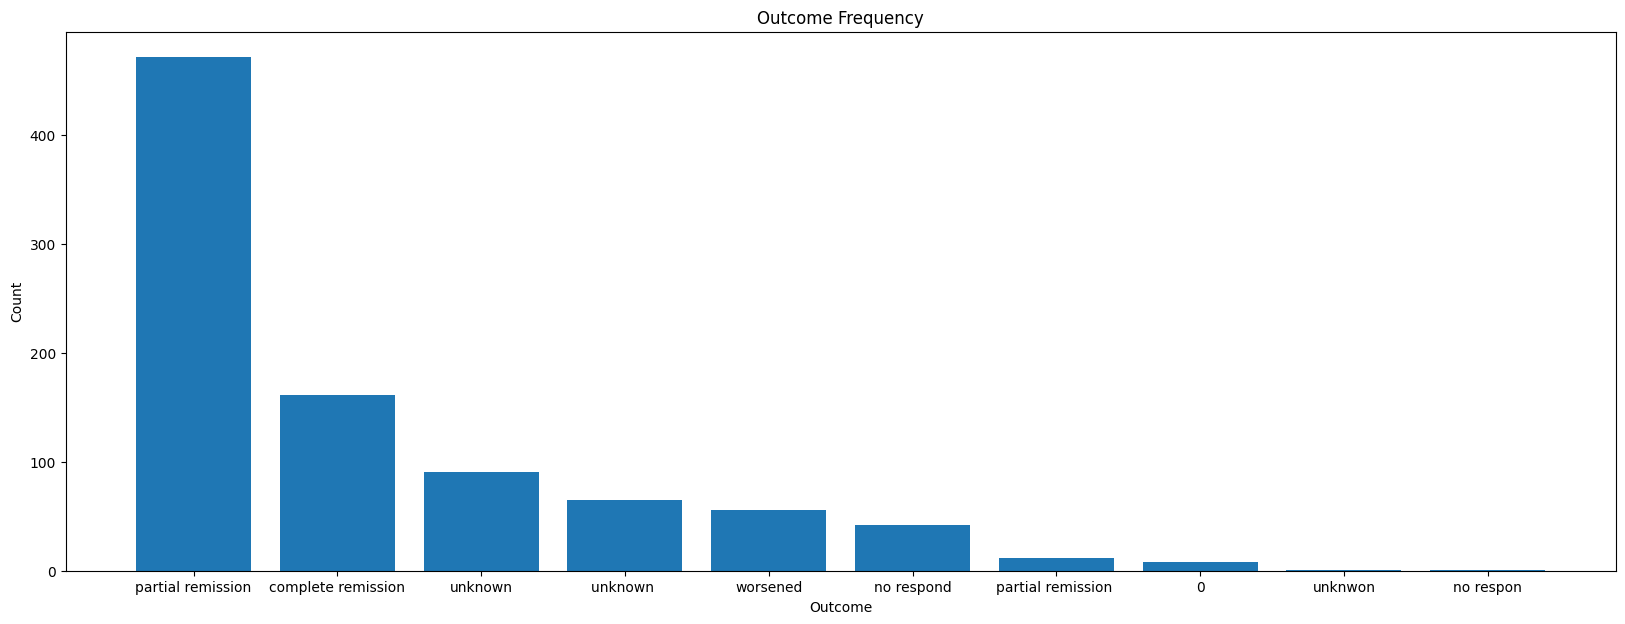

In [141]:
# Mendapatkan nilai counts untuk setiap kategori
outcome = df['worsened/no respond/partial remission/complete remission'].value_counts()

# Mengambil 5 kategori teratas
top_categories = outcome.nlargest(best_cound_data)

# Mendapatkan nilai dan label dari 5 kategori teratas
labels = top_categories.index
y = top_categories.values

# Plot
fig = plt.figure(figsize=(20, 7))
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Outcome Frequency')
plt.bar(labels, y)
plt.show()

## Penyakit Terkait

In [142]:
df['Penyakit lain'] = df['Penyakit lain'].str.replace("squamous cell carcinomas", "scc").replace("scc", "scc").replace("(scc)","").replace(" and ", ",")
df['Penyakit lain'] = df['Penyakit lain'].str.replace("squamous cell carcinoma", "scc")
df['Penyakit lain'] = ["scc" if "scc" in df['Penyakit lain'][i] else df['Penyakit lain'][i] for i in range(len(df))]
df['Penyakit lain'] = df['Penyakit lain'].str.replace("squamous cell carcinoma", "scc").replace(" dan ",",")
df['Penyakit lain'] = df['Penyakit lain'].str.replace(" and ", "").replace("anemic", "anemia").replace("anaemic", "anemia").replace("anemic", "anemia")
df['Penyakit lain'] = ["cancer" if "cancer" in df['Penyakit lain'][i] else df['Penyakit lain'][i] for i in range(len(df))]
df['Penyakit lain'] = ["diabetes" if "diabetes" in df['Penyakit lain'][i] else df['Penyakit lain'][i] for i in range(len(df))]
df['Penyakit lain'] = ["ginjal" if "ginjal" in df['Penyakit lain'][i] else df['Penyakit lain'][i] for i in range(len(df))]
df['Penyakit lain'] = ["anemia" if "anemia" in df['Penyakit lain'][i] else df['Penyakit lain'][i] for i in range(len(df))]
df['Penyakit lain'] = ["renal" if "renal" in df['Penyakit lain'][i] else df['Penyakit lain'][i] for i in range(len(df))]
df['Penyakit lain'] = ["renal" if "ginjal" in df['Penyakit lain'][i] else df['Penyakit lain'][i] for i in range(len(df))]
df['Penyakit lain'] = ["cancer" if "carcinoma" in df['Penyakit lain'][i] else df['Penyakit lain'][i] for i in range(len(df))]
df['Penyakit lain'] = ["cancer" if "kanker" in df['Penyakit lain'][i] else df['Penyakit lain'][i] for i in range(len(df))]
df['Penyakit lain'] = df['Penyakit lain'].str.replace(" and ", "").replace("kecenderungan", "")
df['Penyakit lain'] = ["sepsis" if "sepsis" in df['Penyakit lain'][i] else df['Penyakit lain'][i] for i in range(len(df))]
df['Penyakit lain'] = ["tumor" if "tumor" in df['Penyakit lain'][i] else df['Penyakit lain'][i] for i in range(len(df))]
df['Penyakit lain'] = ["pseudosyndactyly" if "pseudosyndactyly" in df['Penyakit lain'][i] else df['Penyakit lain'][i] for i in range(len(df))]
df['Penyakit lain'] = df['Penyakit lain'].str.replace("0", "none").replace("-", "none")

In [143]:
# df['Penyakit lain'].unique()

In [144]:
len(df[(df['Penyakit lain'] == '0') | (df['Penyakit lain'] == '-')])

0

In [145]:
other_disease = list(set(flatten([str(df['Penyakit lain'][i]).replace('\n', ' ').split(',') for i in range(len(df))])))
other_disease = list(set(flatten([str(other_disease[i]).replace('\t', ' ').split(';') for i in range(len(other_disease))])))
other_disease = [dis.split("(")[0] for dis in other_disease]
other_disease = [dis[1:] if dis[0] == " " else dis for dis in other_disease]
other_disease.remove("")
other_disease = [dis[1:] if dis[0] == " " else dis for dis in other_disease]
other_disease = [dis[:-1] if dis[-1] == " " else dis for dis in other_disease]
other_disease = [dis for dis in other_disease if len(dis.split(" ")) <= 3]
other_disease = [dis for dis in other_disease if ")" not in dis]
other_disease = list(set(other_disease))

In [146]:
other_disease

['coagulopathy',
 'retardasi pertumbuhan awal',
 'disfungsi sumsum tulang',
 'sle',
 'arthalgia',
 'congenital myasthenic syndrome',
 'dyspnea',
 'chronically anaemic',
 'penyempitan esofagus',
 'cd',
 'granulomas',
 'hbv-hdv',
 'gastric outlet obstruction',
 'arthralgia',
 'psoriasis vulgaris',
 'crohn’s disease',
 'sakit pada perut',
 'autoimmune thrombocytopeniahypothyroidism',
 'muscular dystrophy',
 'ulserasi mulut',
 'generalized swellingfever',
 'dan kelainan tulang',
 'malnutrisi',
 'hemofilia a',
 'microcytic anaemia',
 'hypothyroidism',
 'malaise',
 'dan gastric infarct',
 'acrodermatitis enteropathica',
 'kelelahan',
 'bart’s syndrome',
 'trichiasis sikatrik',
 'aibd',
 'nyeri rahang bilateral',
 'diabetes',
 'poor appetite',
 'pseudosyndactyly',
 'tumor',
 'amiloidosis',
 'diare',
 'sepsis',
 'hepatitis b',
 'interposisi usus besar',
 'none',
 'renal',
 'escherichia coli septicaemia',
 'striktur esofagus',
 'ketidakstabilan epitel kornea',
 'kecenderungan leukemia',
 'infla

In [147]:
other_disease = list(set(other_disease))
# Menghitung jumlah kemunculan masing-masing obat
count_other_disease = Counter()

for drug in other_disease:
    count = sum(df['Penyakit lain'].apply(lambda x: drug in x))
    count_other_disease[drug] = count

# Menyimpan hasil dalam list
mucosa = list(count_other_disease.keys())
val_mucosa = list(count_other_disease.values())

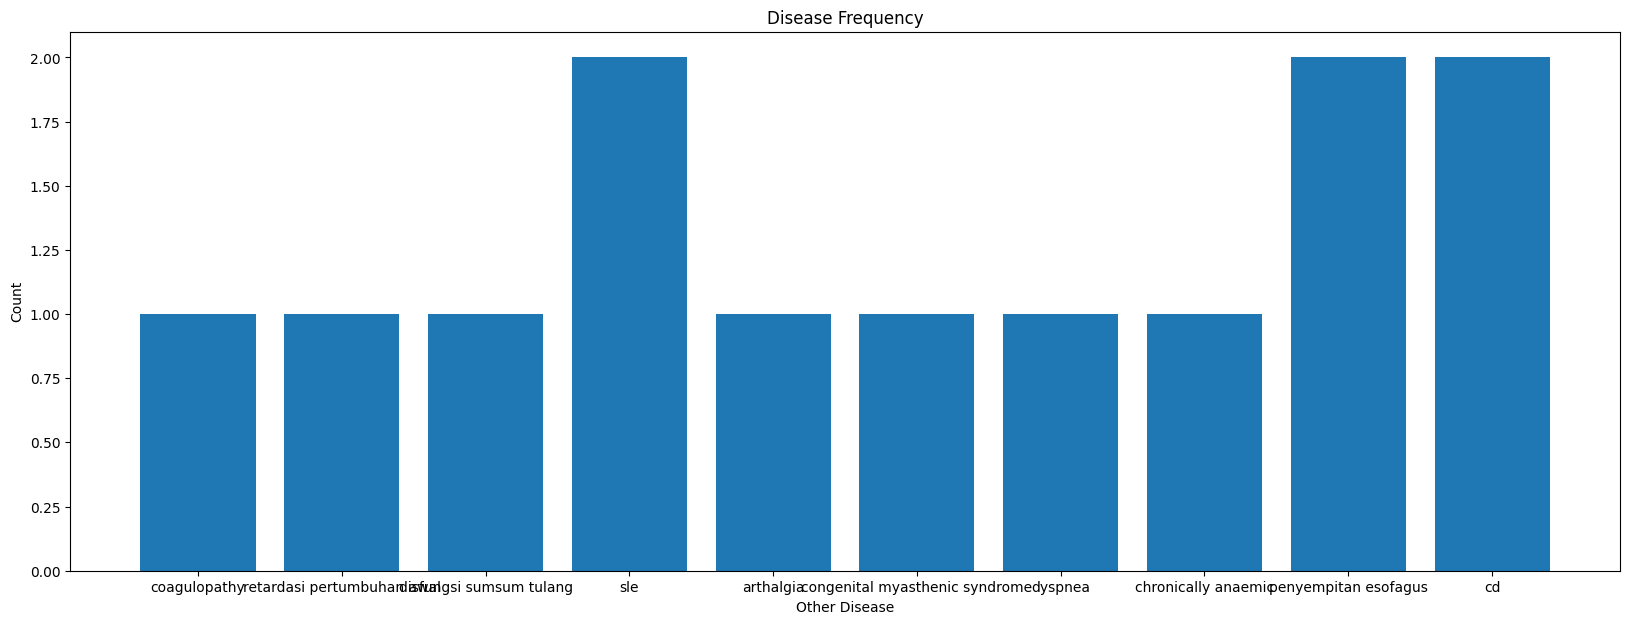

In [148]:
# Mengambil 5 kategori teratas berdasarkan jumlah kemunculan
top_5_labels = []
top_5_y = []

sorted_counts = dict(sorted(count_other_disease.items(), key=lambda item: item[1], reverse=True))
top_5_counts = dict(list(count_other_disease.items())[:best_cound_data])

for label, count in top_5_counts.items():
    top_5_labels.append(label)
    top_5_y.append(count)

# Plot
fig = plt.figure(figsize=(20, 7))
plt.xlabel('Other Disease')
plt.ylabel('Count')
plt.title('Disease Frequency')
plt.bar(top_5_labels, top_5_y)
plt.show()

## Ukuran luka

In [149]:
df['Ukuran luka'] = [ukuran_luka_process(str(df['Ukuran luka'][i])) for i in range(len(df))]
df['Ukuran luka'] = [str(df['Ukuran luka'][i]).replace('a)','').replace('b)','')  for i in range(len(df))]
df['Ukuran luka'] = [str(df['Ukuran luka'][i]).replace('1-4cm','1') for i in range(len(df))]
df['Ukuran luka'] = [str(df['Ukuran luka'][i]).replace('1-2cm','1') for i in range(len(df))]
df['Ukuran luka'] = [str(df['Ukuran luka'][i]).replace('height, 1.30 cm; weight, 12 kg','1') for i in range(len(df))]
wound = flatten([str(df['Ukuran luka'][i]).split('cm2') for i in range(len(df))])
wound = flatten([str(df['Ukuran luka'][i]).split(',') for i in range(len(df))])
wound = [str(diameter_to_wide(wound[i])) if 'in diameter' in str(wound[i]) else str(wound[i]) for i in range(len(wound))]
wound = flatten([str(wound[i]).split(' mm ') for i in range(len(df))])
wound = flatten([str(wound[i]).replace('1 to 3', '3') for i in range(len(df))])
wound = flatten([str(wound[i]).split(';') for i in range(len(df))])
wound = [str(mm_to_wide(wound[i])) if 'x' in str(wound[i]) and 'mm' in str(wound[i]) else str(wound[i]) for i in range(len(wound))]
wound = flatten([str(wound[i]).replace(' ', '') for i in range(len(df))])
wound = flatten([str(wound[i]).replace('-', '0') for i in range(len(df))])
wound_res = []
for i in range(len(wound)):
  try:
    wound_res.append(float(wound[i]))
  except:
    wound_res.append(0.0)

all_wound = list(set(wound_res))

In [150]:
wound_df2 = pd.DataFrame({
    'wound size(cm2)' : wound_res
})

In [152]:
wound_df2 = wound_df2.dropna(subset="wound size(cm2)")

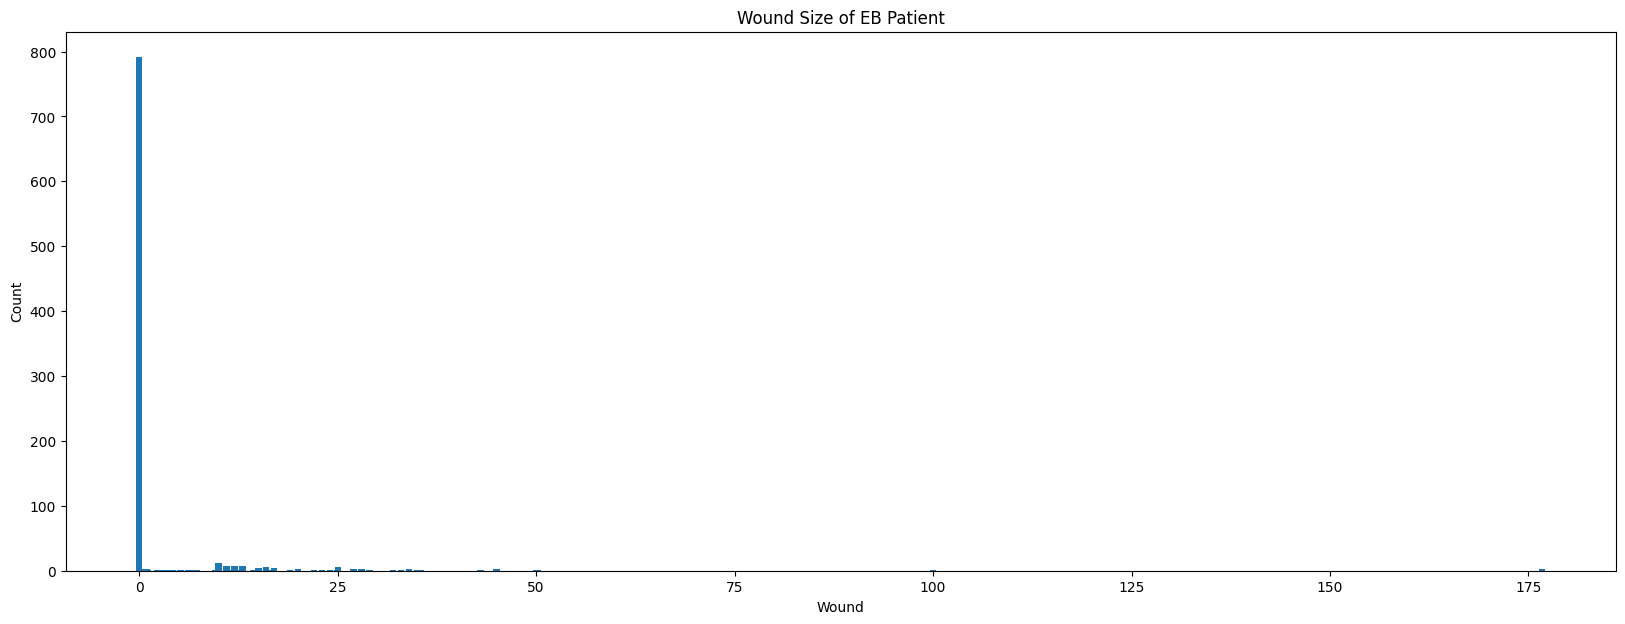

In [153]:
age = wound_df2['wound size(cm2)'].value_counts()
y = []
labels = wound_df2['wound size(cm2)'].unique()
for i in labels:
    y.append(age[i])

fig = plt.figure(figsize =(20, 7))
plt.xlabel('Wound')
plt.ylabel('Count')
plt.title('Wound Size of EB Patient')
plt.bar(labels, y)
plt.show()

mean wound : 2.3043681254303134 cm2


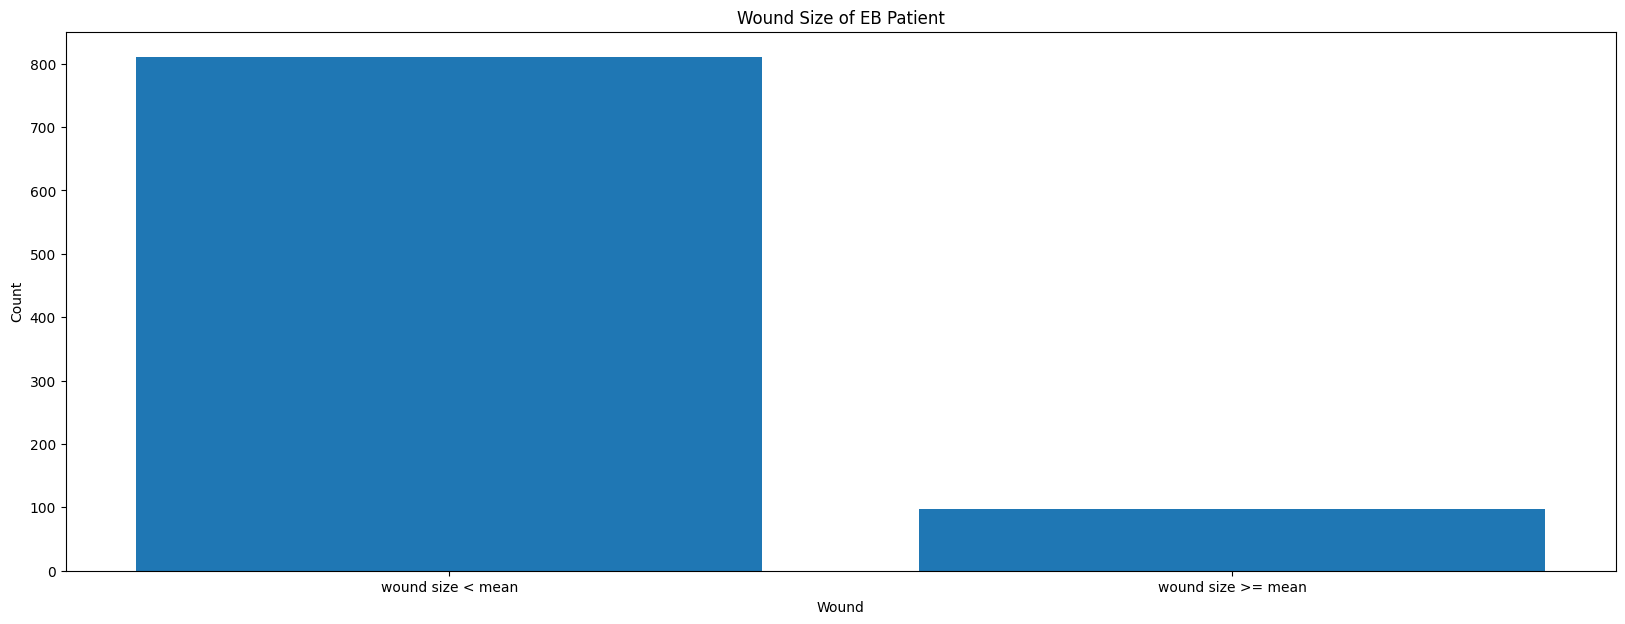

In [154]:
mean_wound = wound_df2['wound size(cm2)'].mean()
print(f"mean wound : {mean_wound} cm2")
wound1 = len(wound_df2[wound_df2['wound size(cm2)'] < mean_wound])
wound2 = len(wound_df2[wound_df2['wound size(cm2)'] >= mean_wound])
labels = ['wound size < mean', 'wound size >= mean']
WoundS = [wound1, wound2]

fig = plt.figure(figsize =(20, 7))
plt.xlabel('Wound')
plt.ylabel('Count')
plt.title('Wound Size of EB Patient')
plt.bar(labels, WoundS)
plt.show()

### Ukuran Luka & worsened/no respond/partial remission/complete remission Correlation

In [155]:
wound_df = pd.DataFrame({
    'wound size(cm2)' : wound_res,
    'outcome' : df['worsened/no respond/partial remission/complete remission'].tolist()
})

In [156]:
wound_df.head()

,wound size(cm2),outcome
0,0.0,partial remission
1,0.0,partial remission
2,0.0,partial remission
3,0.0,partial remission
4,0.0,partial remission


In [157]:
# not null
wound_df2 = wound_df[wound_df['wound size(cm2)'] != 0][wound_df['outcome'] != '0']
wound_df2 = wound_df2.reset_index(drop=True)
wound_df2 = wound_df2.sort_values(by='wound size(cm2)')
wound_df2 = wound_df2.reset_index(drop=True)

C:\Users\herutriana44\AppData\Local\Temp\ipykernel_15436\570611723.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wound_df2 = wound_df[wound_df['wound size(cm2)'] != 0][wound_df['outcome'] != '0']


In [158]:
# Mendapatkan nilai maksimum dan minimum
max_value = wound_df2['wound size(cm2)'].max()
min_value = wound_df2['wound size(cm2)'].min()

# Menghitung rentang nilai
range_value = (max_value - min_value) // 3

# Membuat interval
intervals = [
    (min_value - 0.1, range_value ),
    (min_value + range_value , min_value + 2 * range_value),
    (min_value + 2 * range_value, float('inf'))
]

wound_df2['interval'] = pd.cut(wound_df2['wound size(cm2)'], bins=[interval[0] for interval in intervals] + [float('inf')], labels=range(1, len(intervals) + 1))

In [159]:
range_value

58.0

In [160]:
wound_df2

,wound size(cm2),outcome,interval
0,0.007854,partial remission,1
1,0.120000,unknown,1
2,0.120000,unknown,1
3,0.120000,unknown,1
4,0.200000,unknown,1
...,...,...,...
110,50.265482,complete remission,1
111,100.000000,unknown,2
112,176.714587,complete remission,3
113,176.714587,partial remission,3


In [161]:
wound_df2.describe()

,wound size(cm2)
count,114.000000
mean,18.070718
std,25.441260
min,0.007854
25%,7.113938
50%,12.000000
75%,21.500000
max,176.714587


In [162]:
(wound_df2['wound size(cm2)'].max() - wound_df2['wound size(cm2)'].min()) // 3

58.0

In [163]:
import matplotlib.pyplot as plt

interval_list = [1, 2, 3]
wound_cluster = [len(wound_df2[wound_df2['interval'] == i]['wound size(cm2)'].tolist()) for i in interval_list]
wound_outcome_cluster = [wound_df2[wound_df2['interval'] == i]['outcome'].tolist() for i in interval_list]

wound_cluster_dict = {
    'interval' : interval_list,
    'wound size(cm2)' : wound_cluster,
    'outcome' : wound_outcome_cluster
}

wound_cluster_dict

# fig = plt.figure(figsize = (10, 5))

# # creating the bar plot
# plt.bar(wound_cluster_1['wound'], values, color ='maroon',  width = 0.4)

# plt.xlabel("Courses offered")
# plt.ylabel("No. of students enrolled")
# plt.title("Students enrolled in different courses")
# plt.show()

{'interval': [1, 2, 3],
 'wound size(cm2)': [111, 1, 2],
 'outcome': [['partial remission',
   'unknown',
   'unknown',
   'unknown',
   'unknown',
   'partial remission',
   'partial remission',
   'partial remission',
   'partial remission',
   'partial remission',
   'partial remission',
   'partial remission',
   'unknown',
   'complete remission',
   'complete remission',
   'partial remission',
   'complete remission',
   'partial remission',
   'partial remission',
   'partial remission',
   'partial remission',
   'complete remission',
   'partial remission',
   'unknown',
   'unknown',
   'partial remission',
   'partial remission',
   'partial remission',
   'complete remission',
   'partial remission',
   'worsened',
   'partial remission',
   'partial remission',
   'partial remission',
   'partial remission',
   'complete remission',
   'worsened',
   'partial remission',
   'partial remission',
   'partial remission',
   'partial remission',
   'partial remission',
   'pa

In [164]:
from collections import Counter

all_drug = wound_df2['interval'].tolist()
all_drug = list(set(all_drug))
# Menghitung jumlah kemunculan masing-masing obat
count_drugs = Counter()
outcome_drugs = {}

for drug in all_drug:
    # if drug != '0' and ',' not in drug:
    #   count = sum(df['Drug'].apply(lambda x: drug in x))
    #   count_drugs[drug] = count
    #   outcome_counts = df[df['Drug'].apply(lambda x: drug in x)]['Outcome'].value_counts()
    #   outcome_drugsDrug[drug] = outcome_counts.to_dict()

    # count = sum(wound_df2['interval'].apply(lambda x: drug in x))
    # count_drugs[drug] = count
    outcome_counts = wound_df2[wound_df2['interval'] == drug]['outcome'].value_counts()
    outcome_drugs[drug] = outcome_counts.to_dict()


In [165]:
outcome_drugs[2] = {}

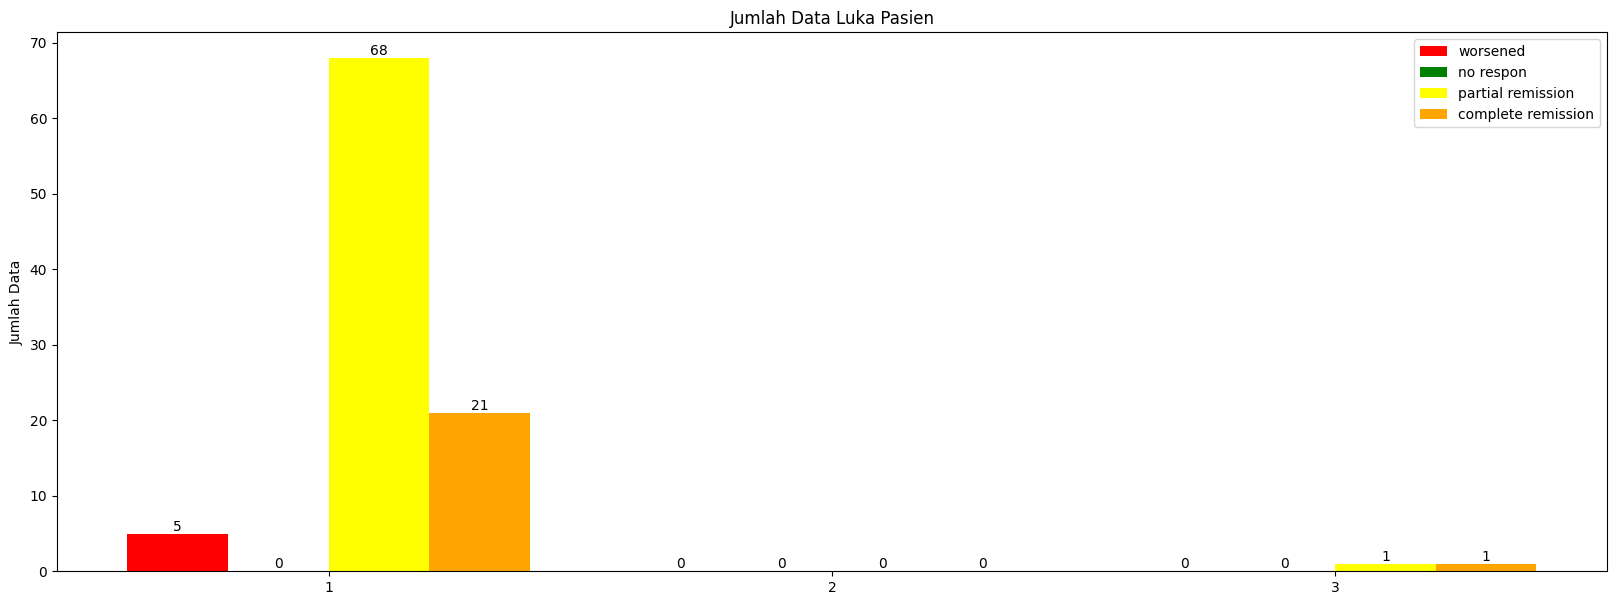

In [166]:
import numpy as np
# Mengambil 5 obat terbanyak
top_5_drugs = [1, 2, 3]
top_5_val_drugs = [len(wound_df2[wound_df2['interval'] == i]['wound size(cm2)'].tolist()) for i in interval_list]
top_5_outcome_per_drug = [outcome_drugs[drug] for drug in top_5_drugs]

# Mengambil outcome yang ingin ditampilkan
outcomes_of_interest = ['worsened', 'no respon', 'partial remission', 'complete remission']

outcome_counts = {}
for i in outcomes_of_interest:
  outcome_counts[i] = []

for i in range(len(top_5_drugs)):
  for j in outcomes_of_interest:
    try:
      outcome_counts[j].append(top_5_outcome_per_drug[i][j])
    except:
      outcome_counts[j].append(0)

# Mengatur lebar batang
bar_width = 0.2

# Menghasilkan posisi batang untuk setiap obat
r1 = np.arange(len(top_5_drugs))
r2 = [r + bar_width for r in r1]
r3 = [r + bar_width for r in r2]
r4 = [r + bar_width for r in r3]
r5 = [r + bar_width for r in r4]

# Plot
fig, ax = plt.subplots(figsize=(20, 7))
# bar1 = ax.bar(r1, top_5_val_drugs, width=bar_width, label='Jumlah Data', color='blue')
bar2 = ax.bar(r2, outcome_counts[outcomes_of_interest[0]], width=bar_width, label=outcomes_of_interest[0], color='red')
bar3 = ax.bar(r3, outcome_counts[outcomes_of_interest[1]], width=bar_width, label=outcomes_of_interest[1], color='green')
bar4 = ax.bar(r4, outcome_counts[outcomes_of_interest[2]], width=bar_width, label=outcomes_of_interest[2], color='yellow')
bar5 = ax.bar(r5, outcome_counts[outcomes_of_interest[3]], width=bar_width, label=outcomes_of_interest[3], color='orange')

# Menambahkan label pada sumbu x
ax.set_xticks([r + 2.5 * bar_width for r in range(len(top_5_drugs))])
ax.set_xticklabels(top_5_drugs)

# Menambahkan label pada sumbu y
ax.set_ylabel('Jumlah Data')

# Menambahkan judul
ax.set_title('Jumlah Data Luka Pasien')

# Menambahkan legend
ax.legend()

# Menambahkan nilai pada batang
for i in range(len(top_5_drugs)):
    # ax.text(bar1[i].get_x() + bar1[i].get_width() / 2.0, bar1[i].get_height(), top_5_val_drugs[i], ha='center', va='bottom')
    ax.text(bar2[i].get_x() + bar2[i].get_width() / 2.0, bar2[i].get_height(), outcome_counts[outcomes_of_interest[0]][i], ha='center', va='bottom')
    ax.text(bar3[i].get_x() + bar3[i].get_width() / 2.0, bar3[i].get_height(), outcome_counts[outcomes_of_interest[1]][i], ha='center', va='bottom')
    ax.text(bar4[i].get_x() + bar4[i].get_width() / 2.0, bar4[i].get_height(), outcome_counts[outcomes_of_interest[2]][i], ha='center', va='bottom')
    ax.text(bar5[i].get_x() + bar4[i].get_width() / 2.0, bar5[i].get_height(), outcome_counts[outcomes_of_interest[3]][i], ha='center', va='bottom')

plt.show()


In [167]:
import math

math.sqrt(175)

13.228756555322953

In [168]:
wound_df2['outcome'].value_counts()

outcome
partial remission     70
complete remission    22
unknown                9
no respond             6
worsened               5
unknown                3
Name: count, dtype: int64

# CHI-Square Analysis

## Severity and Outcome Correlation

In [169]:
import scipy.stats as stats

# Membuat tabel kontingensi (cross-tabulation) antara Severity dan Outcome
sev_outcome = pd.crosstab(df['Severity'], df['Outcome'])

# Melakukan uji CHI-SQUARE
chi2, p_sev_outcome, _, _ = stats.chi2_contingency(sev_outcome)

# Hasil uji
print("Chi-Square Value:", chi2)
print("p-value:", p_sev_outcome)

# Menafsirkan hasil uji
alpha = np.float64(0.05)  # Tingkat signifikansi
if round(float(p_sev_outcome), 10) < alpha:
    print("Terdapat hubungan yang signifikan antara Severity dan Outcome")
else:
    print("Tidak terdapat hubungan yang signifikan antara Severity dan Outcome")

Chi-Square Value: 62.811138427461074
p-value: 3.83814405501167e-10
Terdapat hubungan yang signifikan antara Severity dan Outcome


# Conclusion

In [170]:
drug_analysis['All Cases'].sum()

350

In [171]:
drug_analysis.to_excel("drug_analysis_EB.xlsx", index=False)

In [172]:
import matplotlib.pyplot as plt

def buat_grafik(x, y, x_label, y_label, title):
 """
  Fungsi untuk membuat grafik batang dengan library matplotlib.

  Args:
    x (list): Daftar label untuk sumbu X.
    y (list): Daftar nilai untuk sumbu Y.

  Returns:
    None.
  """
 plt.figure(figsize=(25, 6))
 # Buat plot batang
 plt.bar(x, y)

 # Tambahkan label sumbu
 plt.xlabel(x_label)
 plt.ylabel(y_label)

 # Tampilkan judul grafik
 plt.title(title)

 # Tampilkan grid
 plt.grid(True)

 # Dapatkan nilai maksimum dari y
 max_y = max(y)

 # Atur batas limit sumbu Y
 if max_y < 5:
  plt.ylim(0, 7)

 # Tampilkan grafik
 plt.show()


In [173]:
drug_analysis

,Drug,All Cases,DEB type,EBS type,JEB type,KS type,EBA type,Age =< Median(17.0y),Age > Median(17.0y),Male,Female,Unknown[Gender],Mild,Moderate,Chronic,worsened,partial remission,complete remission
0,steroid,74,14,0,6,1,52,32,42,36,38,0,1,1,3,1,38,23
1,dapsone,65,0,1,1,0,63,22,43,32,33,0,1,0,3,1,33,23
2,immunoadsorption,32,10,3,7,1,6,18,14,10,22,0,1,1,5,4,20,5
3,azathioprine,31,0,0,0,1,29,2,29,16,15,0,0,1,1,3,14,13
4,prednisolone,29,1,0,3,1,24,4,25,17,12,0,1,2,2,2,20,5
5,intravenous immunoglobulin,29,1,0,0,0,28,3,25,20,9,0,0,0,3,1,18,9
6,cyclosporine,26,7,0,0,0,19,2,24,11,15,0,0,1,3,1,17,5
7,colchicine,23,1,0,1,0,21,2,21,12,11,0,0,0,2,0,8,14
8,isotretinoin,21,20,1,0,0,0,2,19,0,1,20,0,0,0,0,21,0
9,gentamicin,20,8,1,10,0,0,15,5,8,11,1,0,2,4,2,17,0


Berdasarkan data tabel diatas, bahwa pada data lebih banyak data yang tidak diketahui/tidak terdefinisi/masih terlalu abstrak/masih terlalu kompleks untuk dianalisis menggunakan metode statistika atau dari segi ilmu data analisis atau sains data. Namun dari data diatas, menyatakan bahwa kebanyakan obat yang digunakan dapat menyembuhkan penyakit EB karena data `Outcome` diatas menunjukkan bahwa lebih banyak data Heal/Sembuh daripada Remission/berkurang luka nya.

In [174]:
list(drug_analysis.columns)[2:]

['DEB type',
 'EBS type',
 'JEB type',
 'KS type',
 'EBA type',
 'Age =< Median(17.0y)',
 'Age > Median(17.0y)',
 'Male',
 'Female',
 'Unknown[Gender]',
 'Mild',
 'Moderate',
 'Chronic',
 'worsened',
 'partial remission',
 'complete remission']

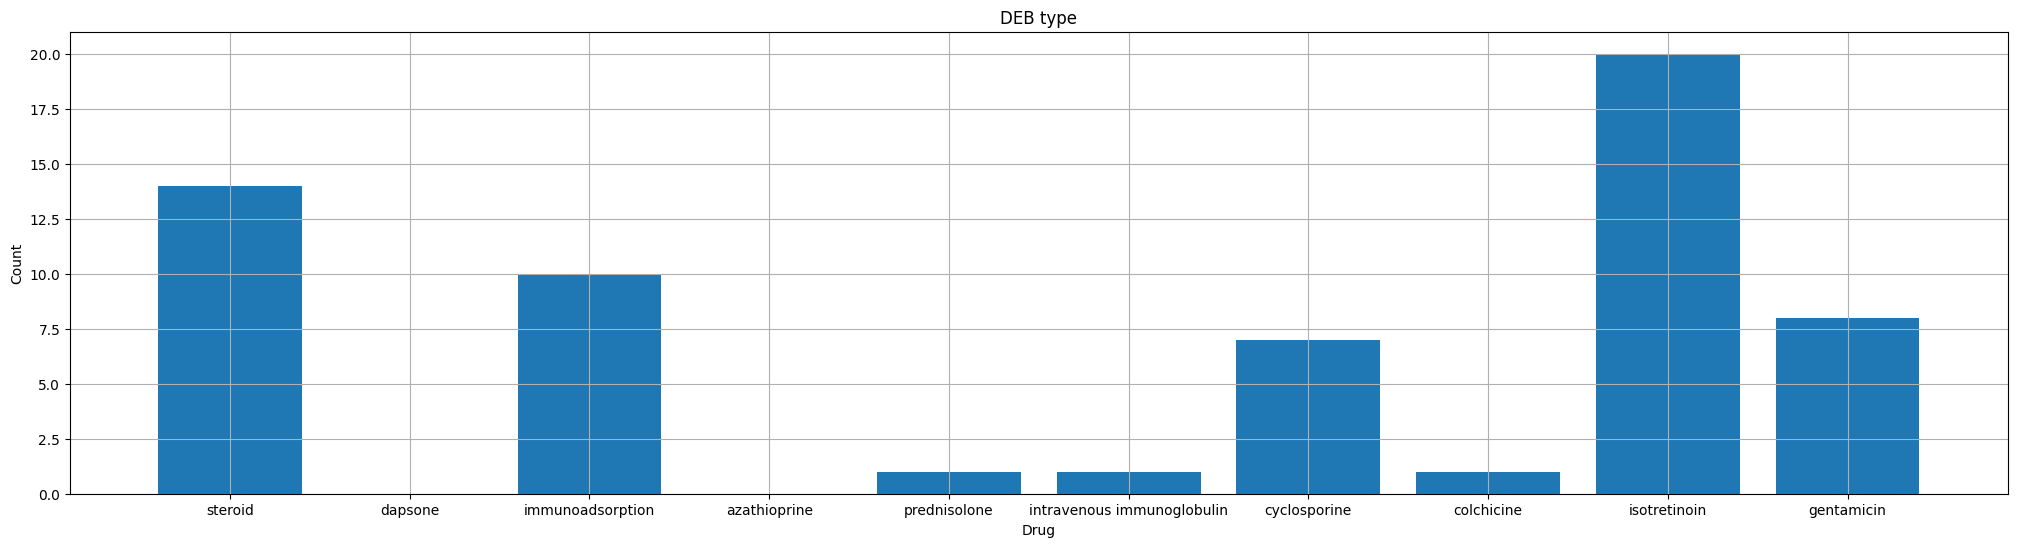

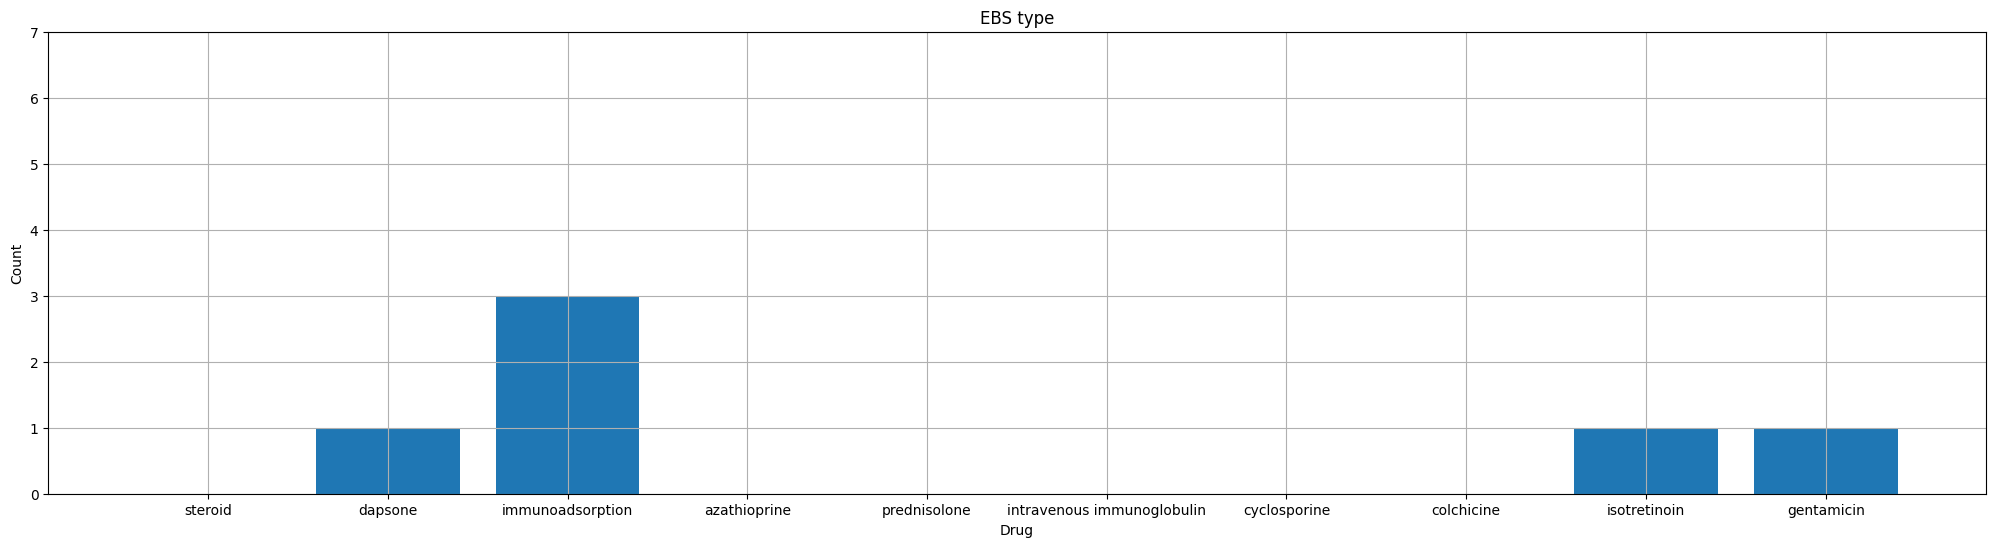

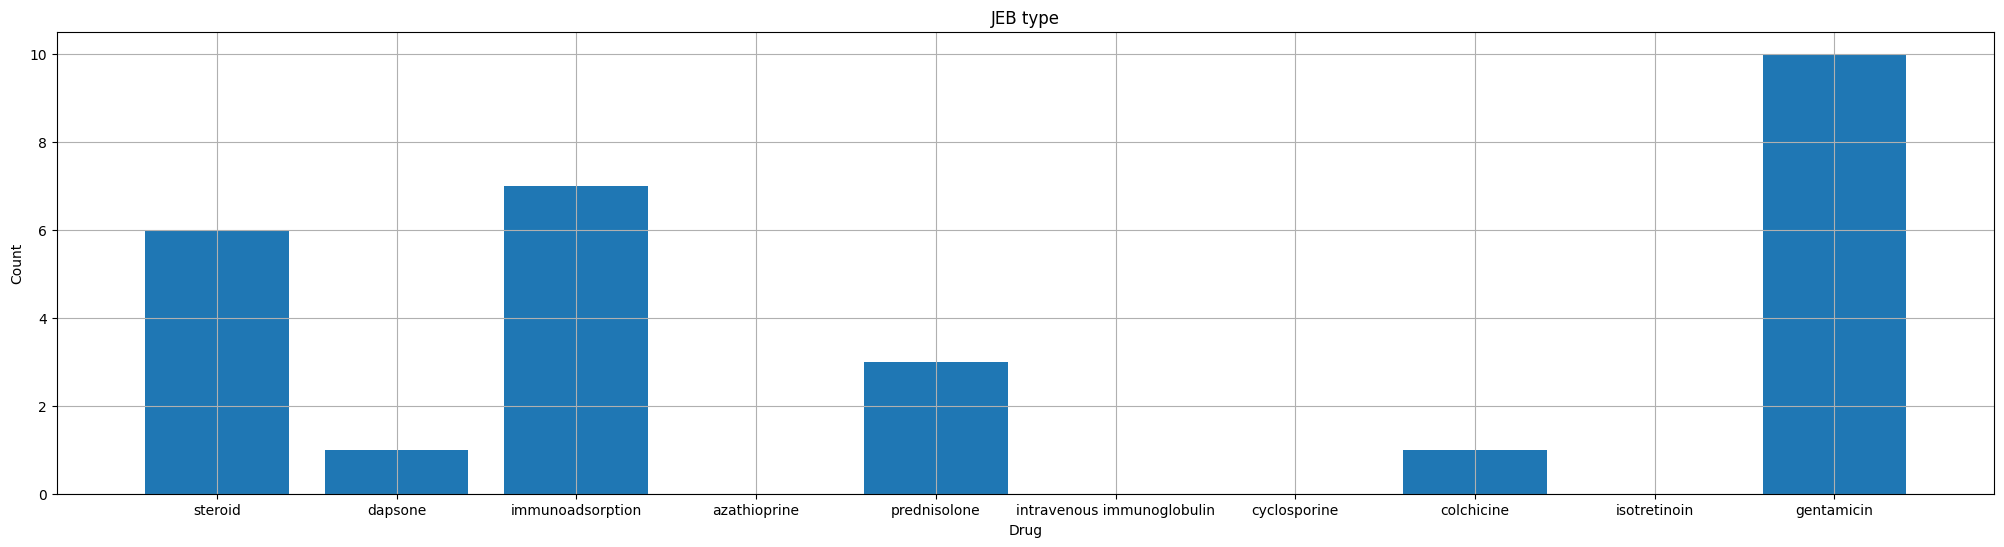

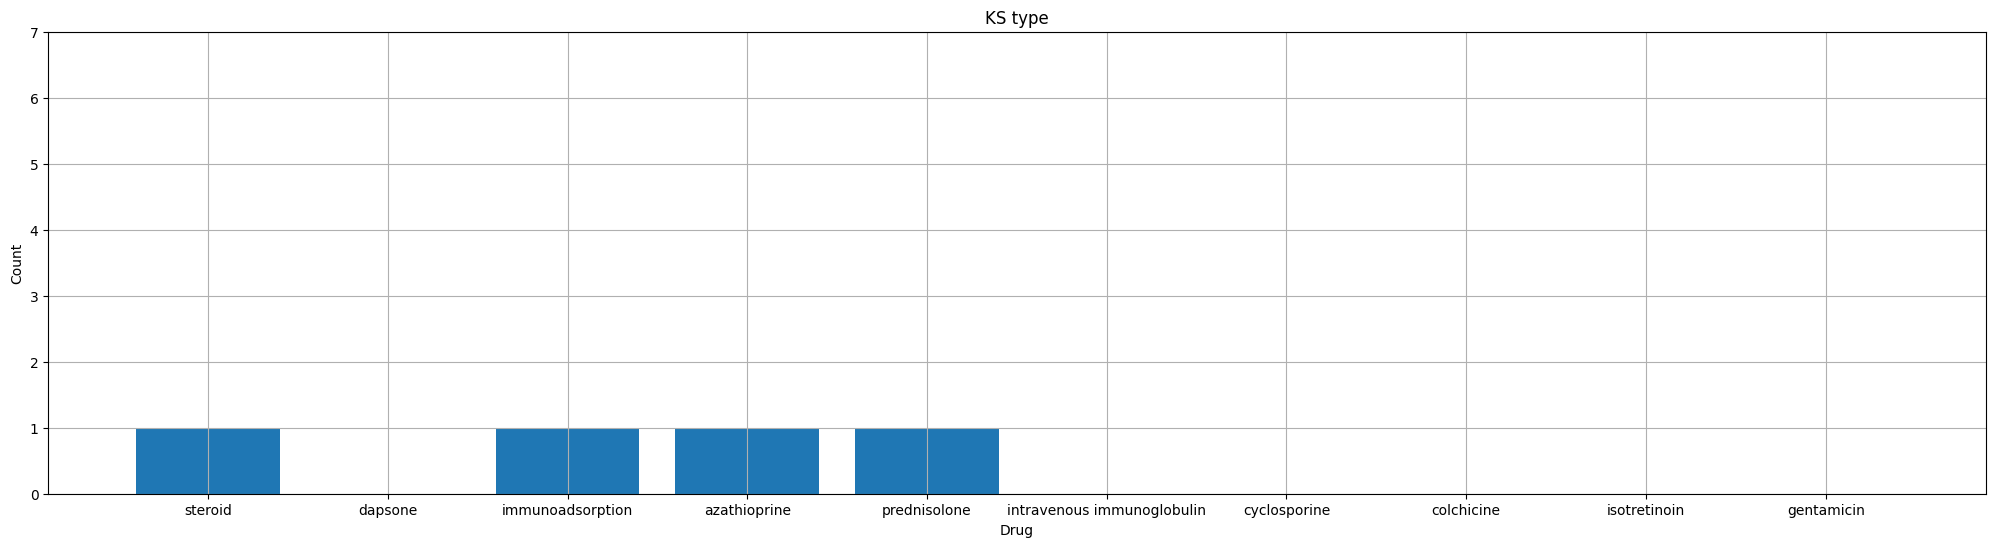

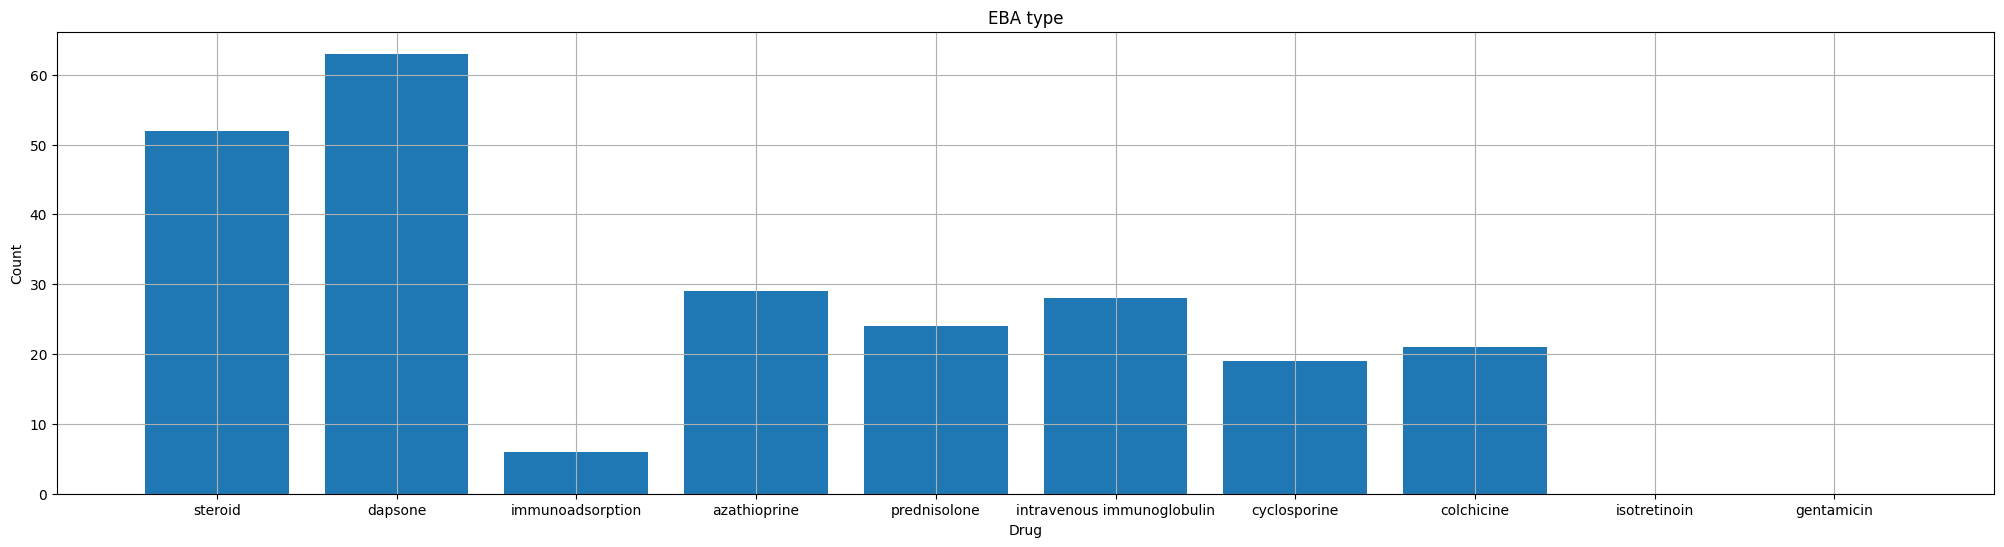

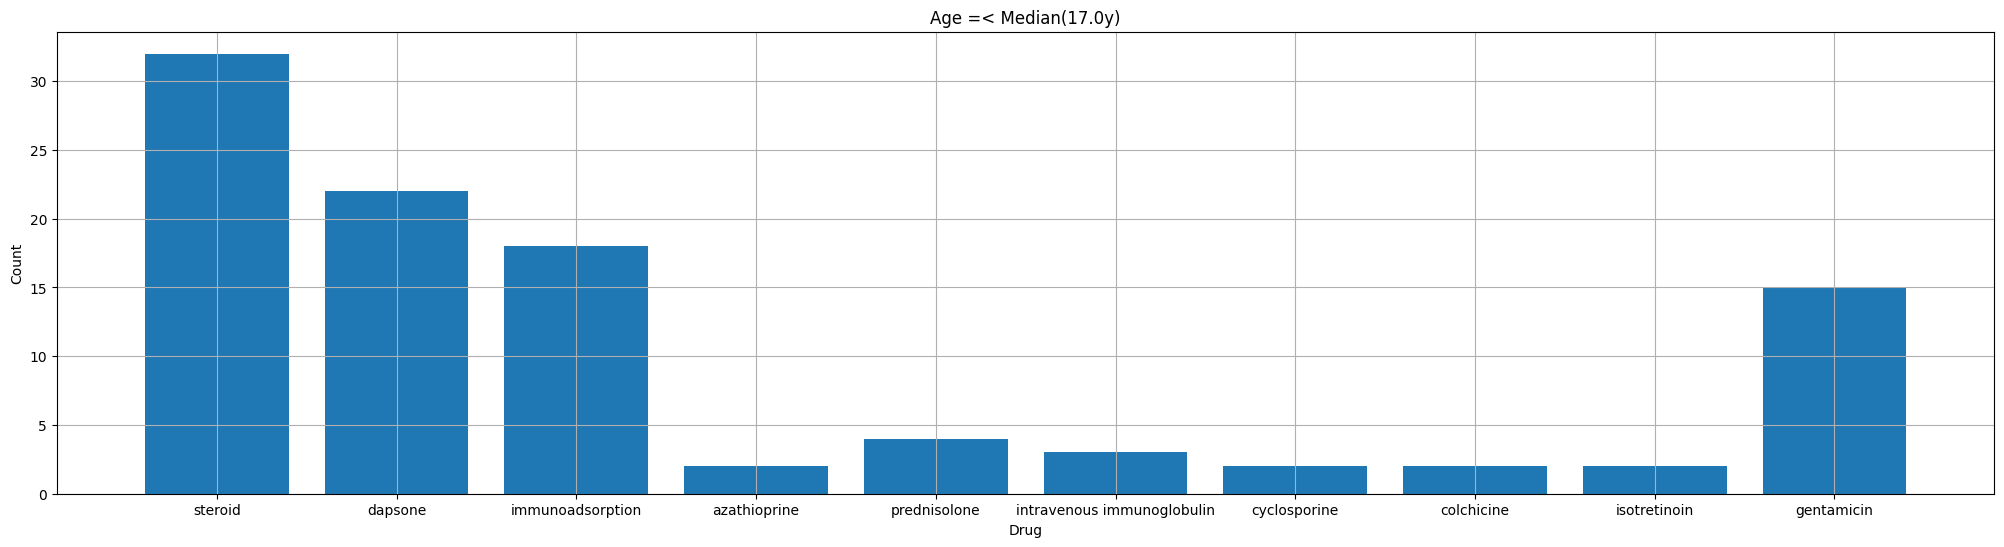

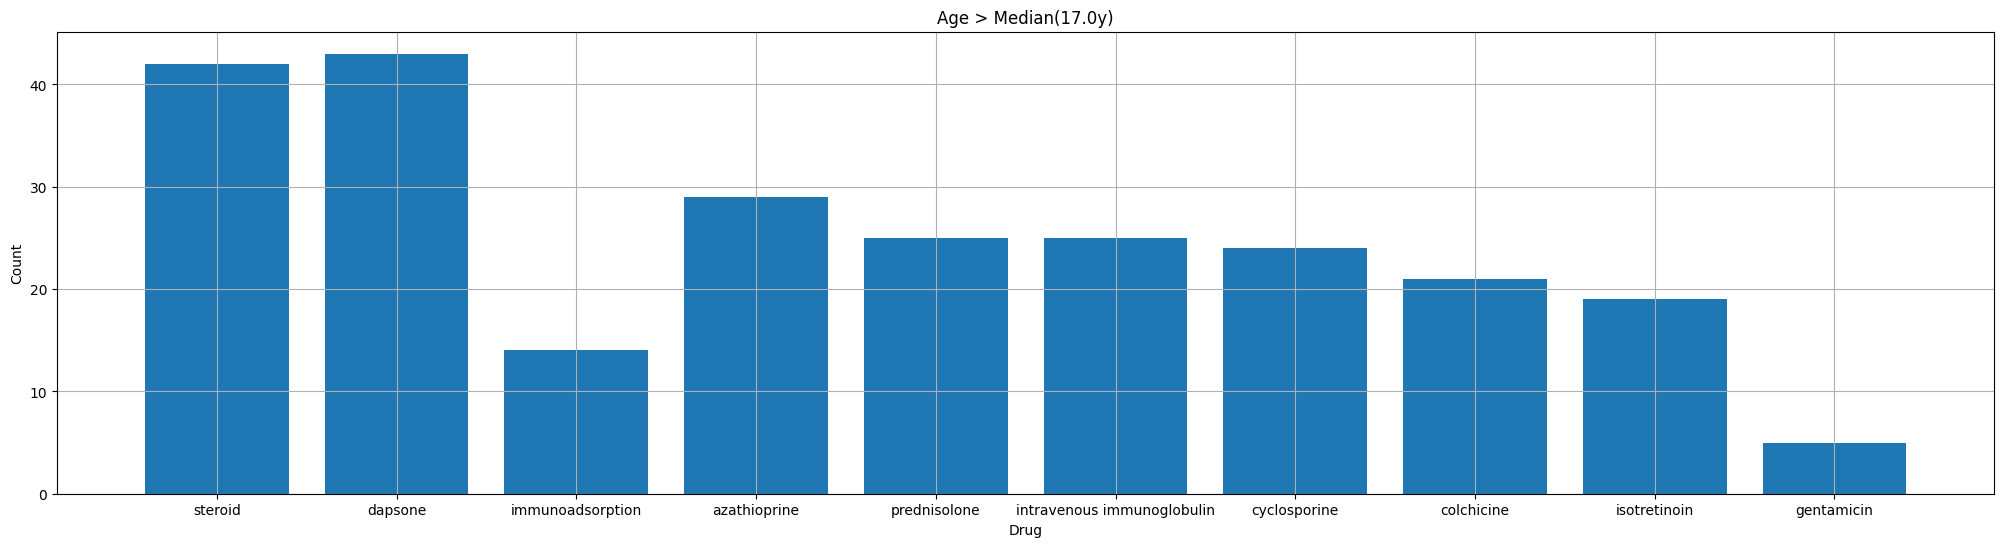

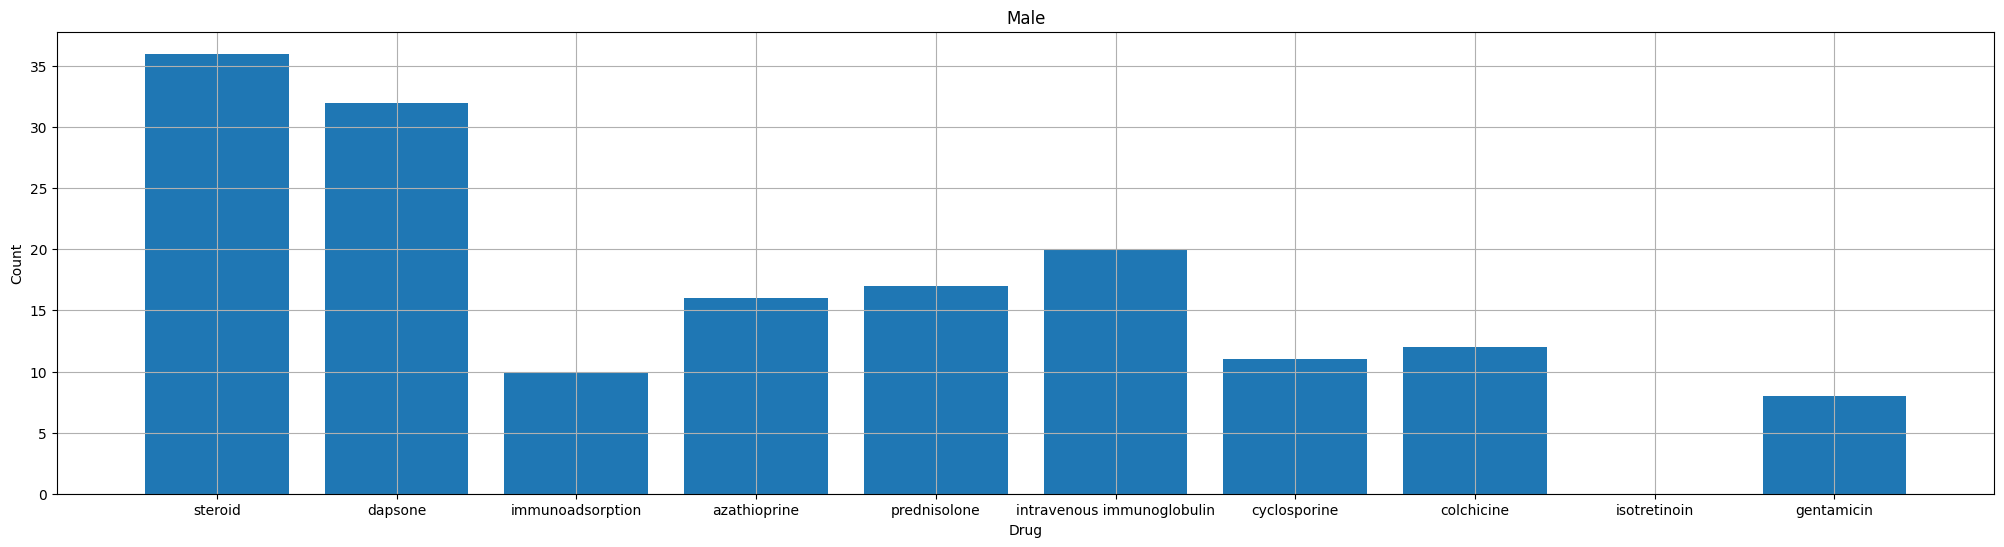

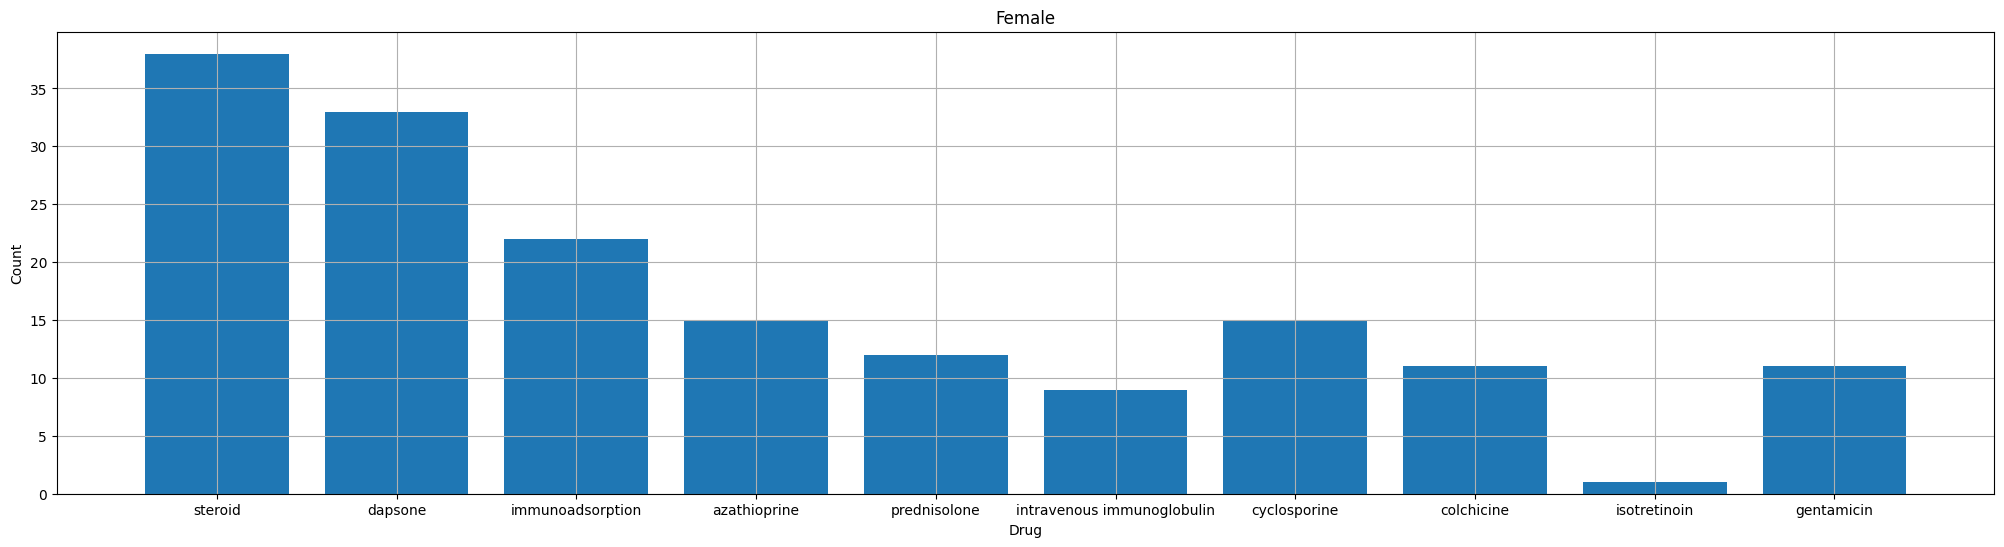

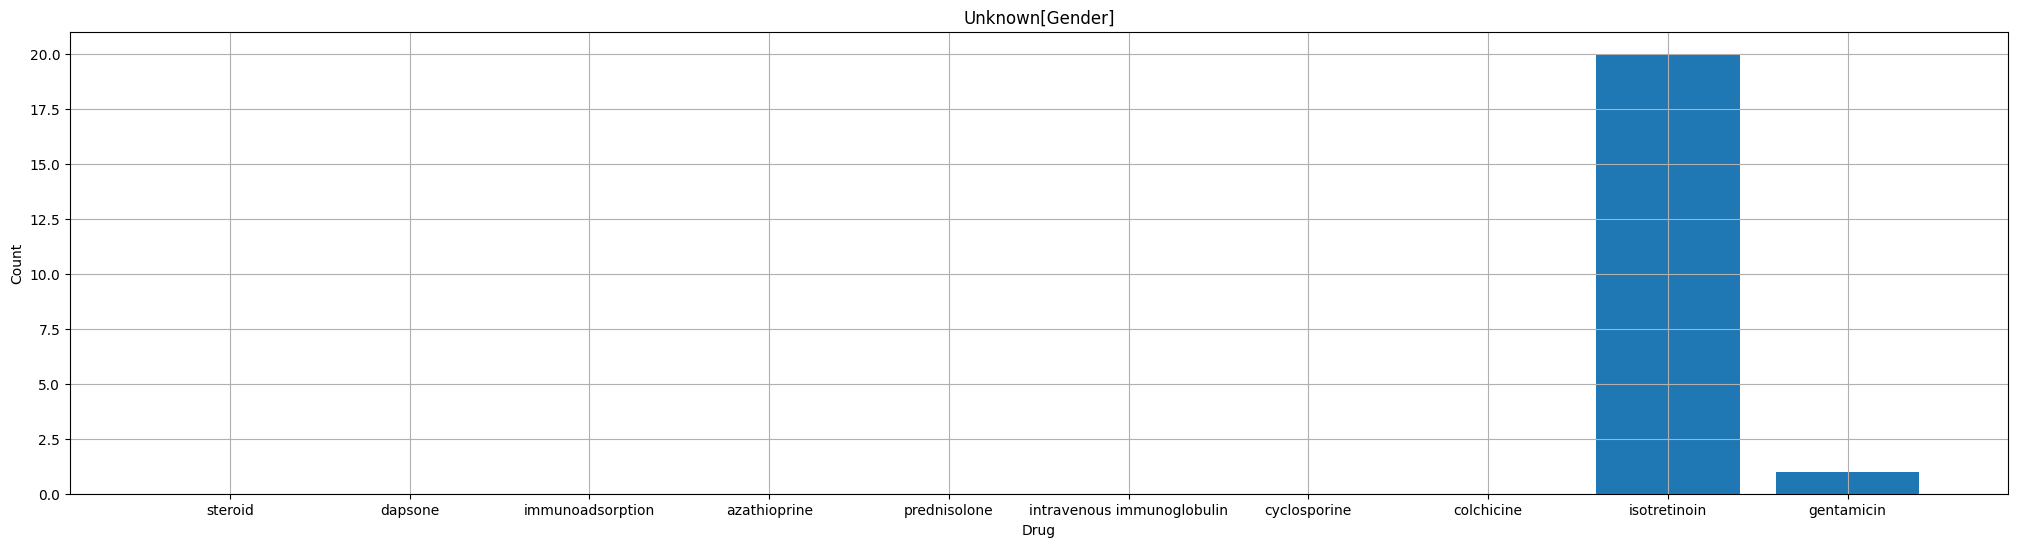

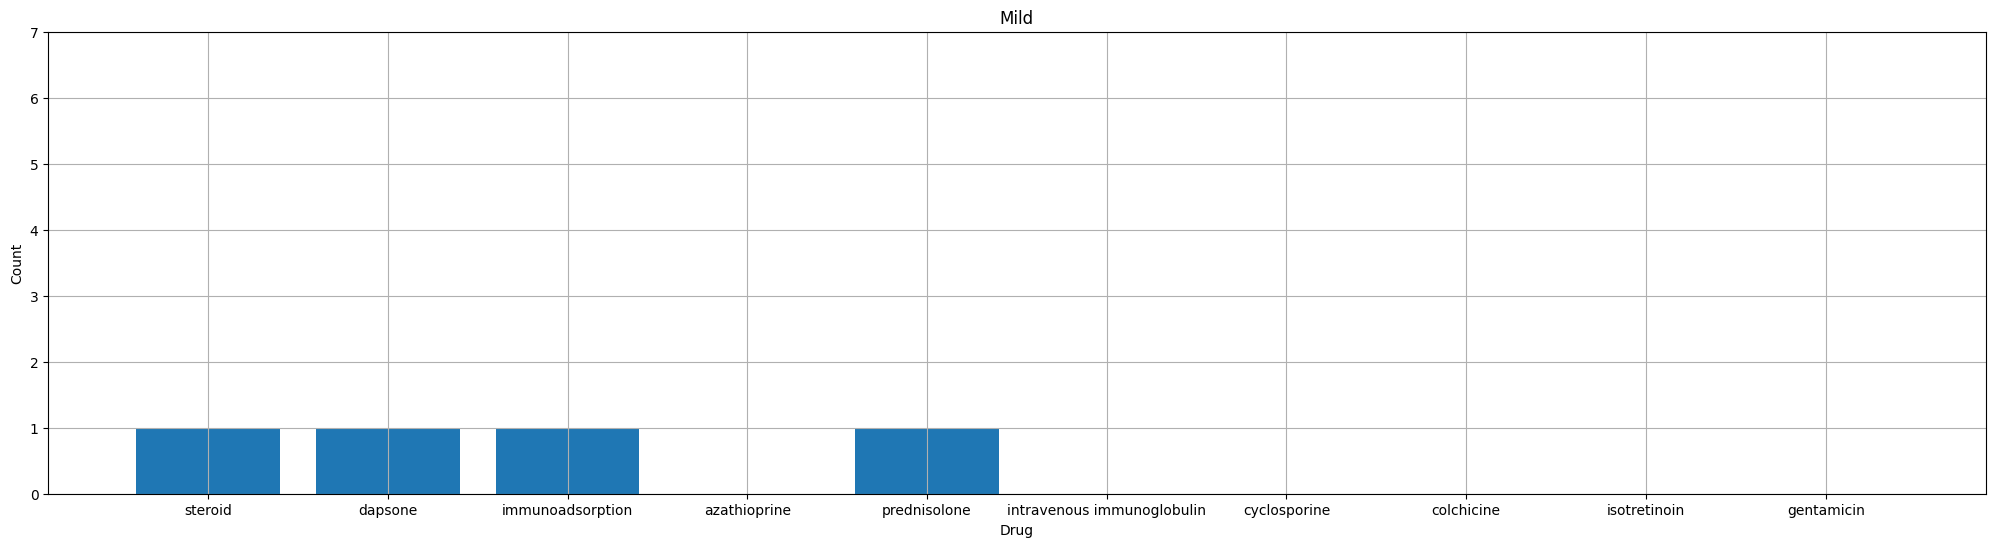

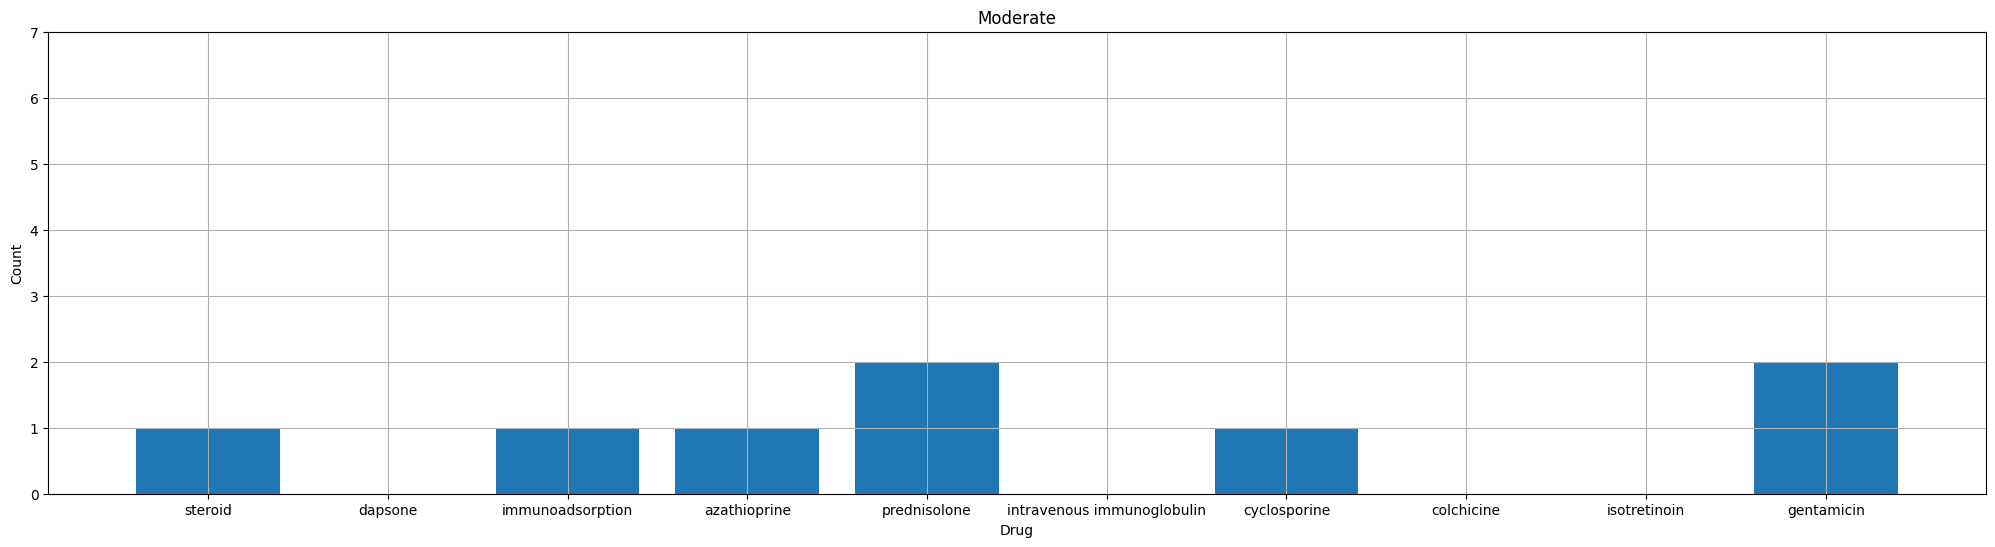

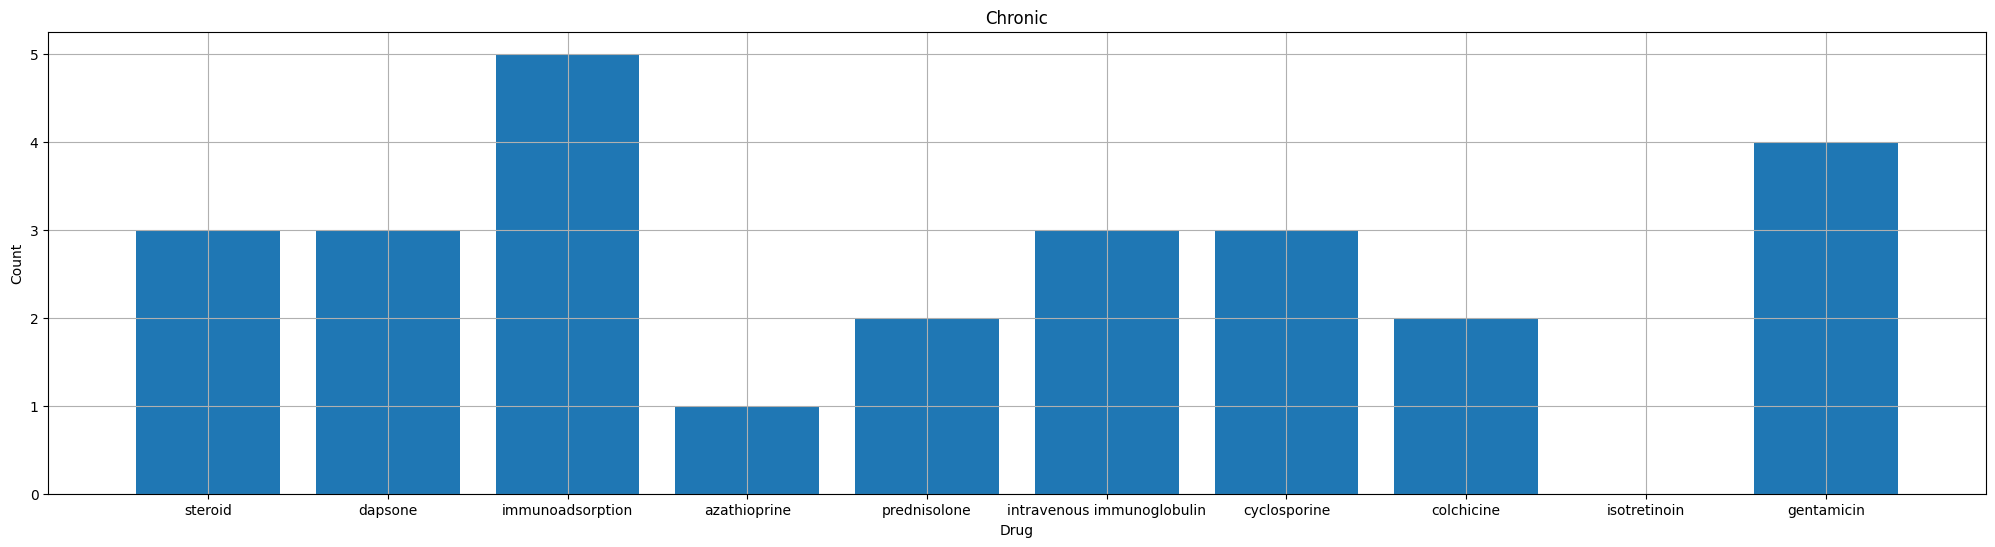

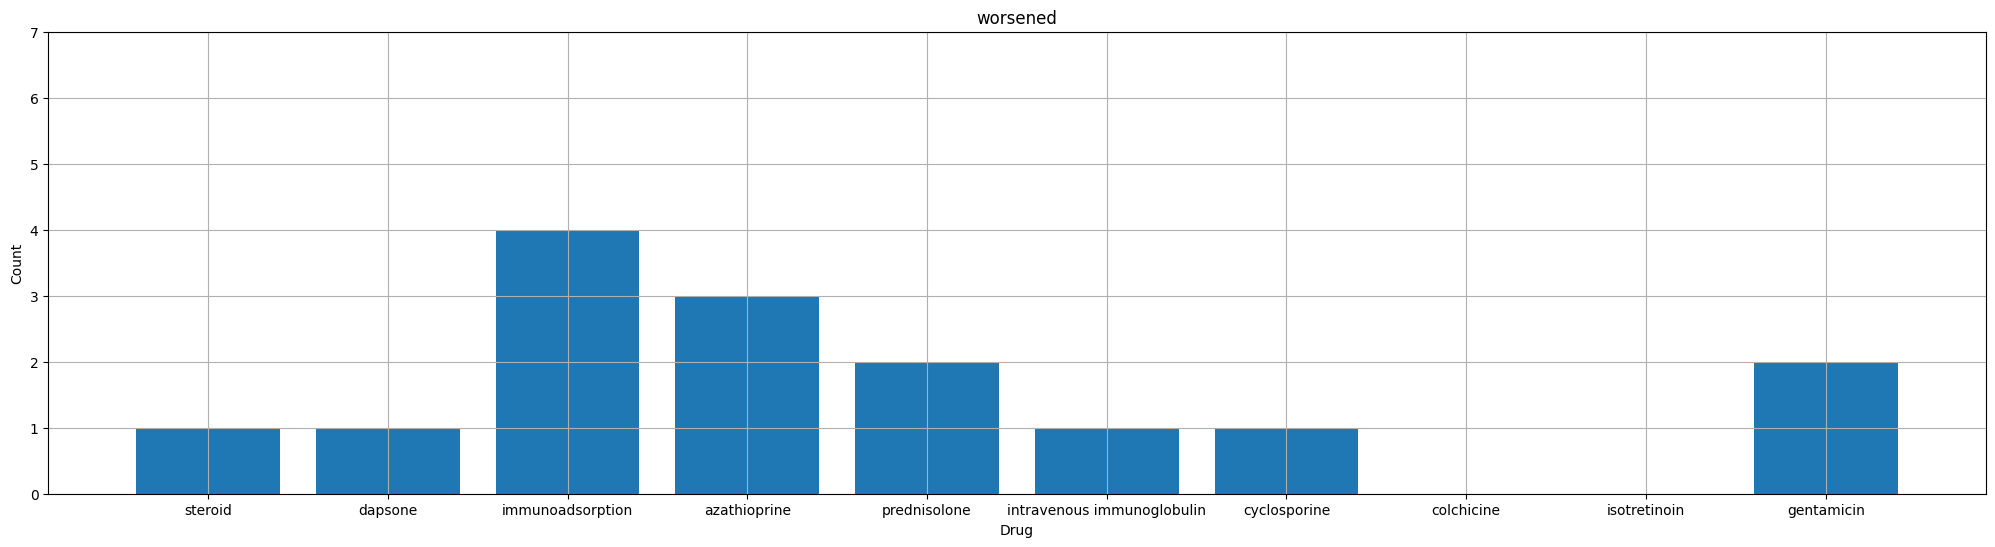

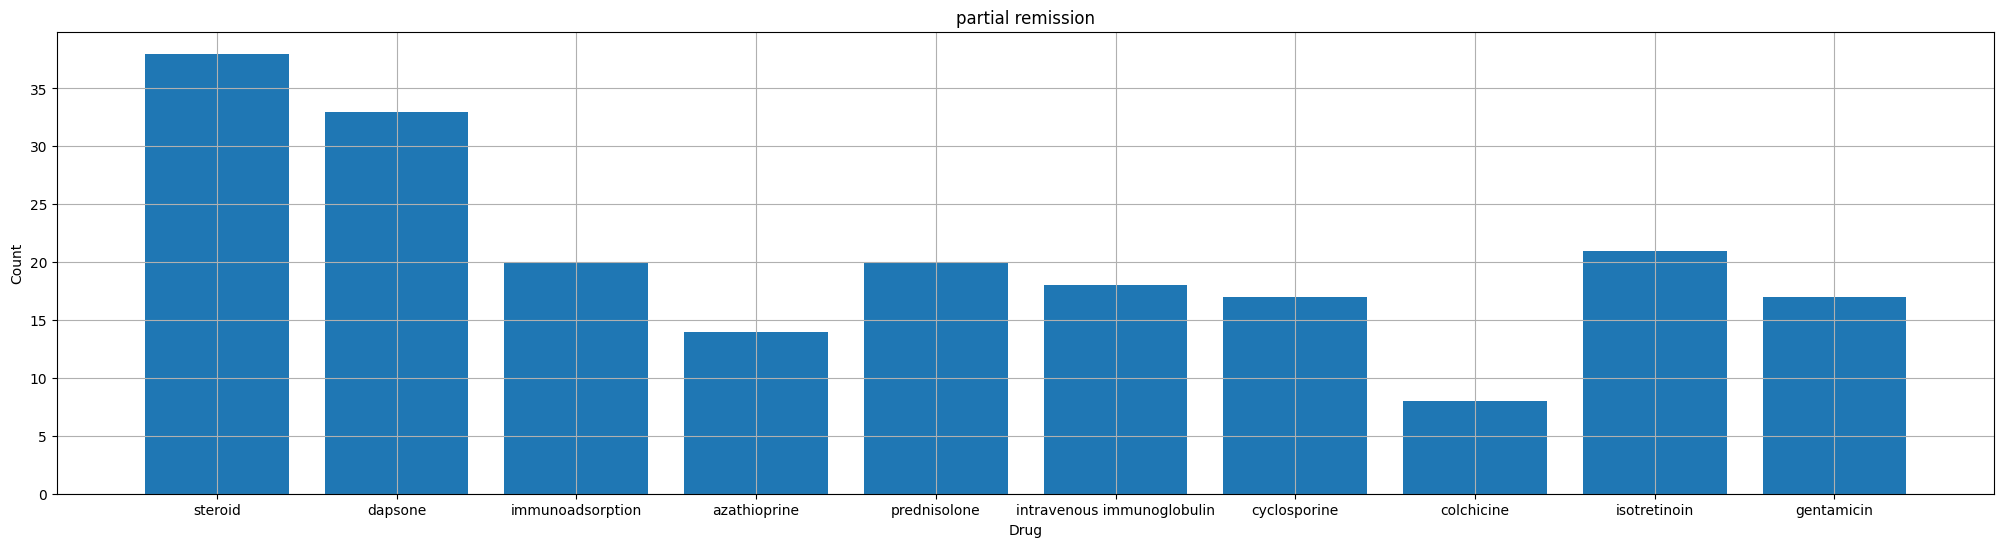

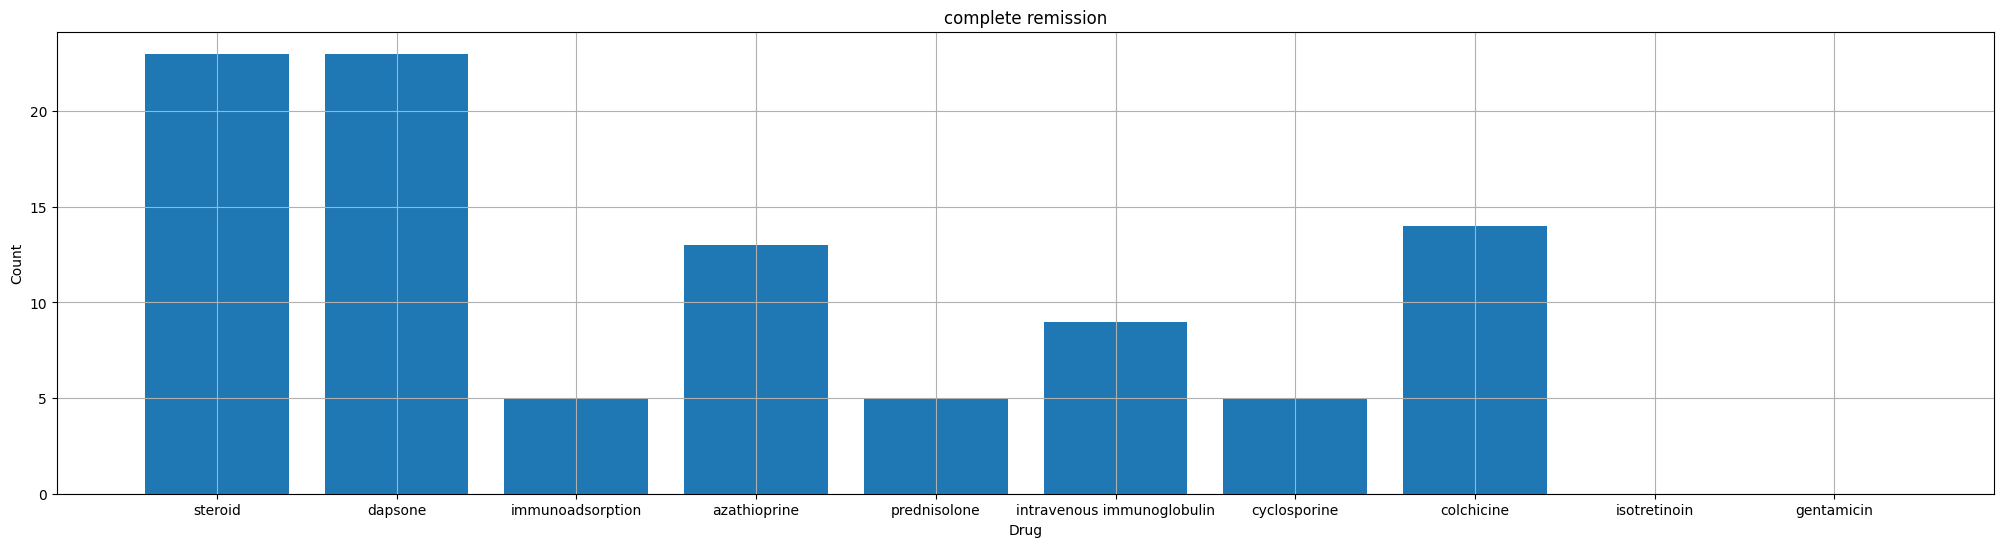

In [175]:
for col3 in list(drug_analysis.columns)[2:]:
  buat_grafik(drug_analysis['Drug'].tolist(), drug_analysis[col3].tolist(), "Drug", "Count", col3)

In [176]:
df['Severity'].unique()

array(['chronic', '0', 'mild', 'moderate'], dtype=object)

In [177]:
df['Outcome']

0         heal
1      Unknown
2      Unknown
3      Unknown
4      Unknown
        ...   
903       None
904       None
905       None
906       None
907       None
Name: Outcome, Length: 908, dtype: object

In [178]:
len(df[df['Severity'] == 'chronic'][df['Outcome'] == 'heal'])

C:\Users\herutriana44\AppData\Local\Temp\ipykernel_15436\1572267995.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df[df['Severity'] == 'chronic'][df['Outcome'] == 'heal'])


37

In [179]:
len(df[df['Severity'] == 'chronic'][df['Outcome'] == 'remission'])

C:\Users\herutriana44\AppData\Local\Temp\ipykernel_15436\934879084.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df[df['Severity'] == 'chronic'][df['Outcome'] == 'remission'])


8

In [180]:
len(df[df['Severity'] == 'moderate'][df['Outcome'] == 'heal'])

C:\Users\herutriana44\AppData\Local\Temp\ipykernel_15436\94054287.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df[df['Severity'] == 'moderate'][df['Outcome'] == 'heal'])


5

In [181]:
len(df[df['Severity'] == 'moderate'][df['Outcome'] == 'remission'])

C:\Users\herutriana44\AppData\Local\Temp\ipykernel_15436\151301575.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df[df['Severity'] == 'moderate'][df['Outcome'] == 'remission'])


2

In [182]:
len(df[df['Severity'] == 'mild'][df['Outcome'] == 'heal'])

C:\Users\herutriana44\AppData\Local\Temp\ipykernel_15436\4017271359.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df[df['Severity'] == 'mild'][df['Outcome'] == 'heal'])


0

In [183]:
len(df[df['Severity'] == 'mild'][df['Outcome'] == 'remission'])

C:\Users\herutriana44\AppData\Local\Temp\ipykernel_15436\4001515180.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df[df['Severity'] == 'mild'][df['Outcome'] == 'remission'])


1

In [184]:
# Menafsirkan hasil uji
alpha = np.float64(0.05)  # Tingkat signifikansi
if round(float(p_sev_outcome), 10) < alpha:
    print("Terdapat hubungan yang signifikan antara Severity dan Outcome")
else:
    print("Tidak terdapat hubungan yang signifikan antara Severity dan Outcome")

Terdapat hubungan yang signifikan antara Severity dan Outcome
